<a href="https://colab.research.google.com/github/007tickooayush/ML-Unsupervised-Netflix-Clustering-Recommendation-Project/blob/master/Ayush_Tickoo_ML_Capstone_Unsupervised_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Contributor/Team Member -** AYUSH TICKOO

# **Project Summary -**

**What Is Netflix?**

Netflix was founded by Marc Randolph and Reed Hastings on August 29, 1997, in Scotts Valley, California. Hastings, a computer scientist and mathematician, was a cofounder of Pure Software, which was acquired by Rational Software that year for 750  million dollars, the then biggest acquisition in Silicon Valley history.DVD players were a popular gift for holiday sales in late 2001, and demand for DVD subscription services were "growing like crazy", according to chief talent officer Patty McCord. The company went public on May 29, 2002, selling 5.5 million shares of common stock at US$15.00 per share.

Netflix started as a competitor to brick-and-mortar video rental stores, renting DVDs by mail, and expanded its business with the introduction of streaming video in 2007. Originally, Netflix was only available in the United States, but that changed when the service launched in Canada in 2010. By January 2016, Netflix was operating in over 190 countries. Today, we know Netflix as the world's leading internet entertainment service. As a Netflix subscriber, you can watch TV shows and movies when you want, where you want, and on whatever device you want. You can play, pause, and resume watching without commercials or commitments.

**Netflix Originals**
Netflix spends billions of dollars on original TV shows and movies annually with the aim of making 50% of its library to be original content. This strategy has been a profitable one and has led to Netflix boasting almost 200 million subscribers worldwide. Today, Netflix subscribers pay for the service in order to watch Netflix originals, such as hugely popular series Orange Is the New Black and Stranger Things. Netflix's original movies are succeeding as well, and its recent action movie, Bright, starring Will Smith, has already become one of the most watched Netflix originals ever.

In this project we have a database that contains the TV series and movies available on an OTT platform called Netflix, in since the year 2019. The database provided is collected by *Flixable*, a third-party Netflix search engine. As it basically contains the data extracted from the the internet containing rating, review, details, type, etc. sort of information regarding the content available in the mentioned year provided in the following dataset.

**What is Flixable?**

Flixable is a search engine for video streaming services that offers a complete list of all the movies and TV shows that are currently streaming on Netflix in the U.S.

In 2018, an interesting report was released regarding the content available on the platform depicting that the number of TV shows on Netflix has nearly tripled since 2010. The number of movies on the streaming service has dropped significantly to over 2,000 since 2010, whereas the number of TV shows available on the content providing platform has almost tripled according to the calculations. It will be interesting to discover what other insights can be drawn from the dataset present at hand.

Integrating this dataset with other external datasets such as from rating and reviewing websites which provide online ratings and reviews such IMDB ratings and Rotten Tomatoes can also provide many interesting findings regarding the content
Rotten Tomatoes can also present various findings by combining this data with other external data such as IMDB scores.





# **GitHub Link -**

[Github Project Link](https://github.com/007tickooayush/ML-Unsupervised-Netflix-Clustering-Recommendation-Project)

# **Problem Statement**


In this project we are required to do:-
- Exploratory Data Analysis (EDA) of the Netflix movies and TV shows dataset.
- Understanding what type of content is available in different countries.
- Test the hypothesis that if Netflix has been increasingly focusing on TV shows rather than movies in actuality over the recent years.
- Cluster the content which is proven to be similar based on text-based features


# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [291]:
# !pip install surprise

In [292]:
# Import Libraries
from numpy import math
import numpy as np
from numpy import nan
import pandas as pd
import missingno as msno
import itertools
import re

# from surprise import SVD
import gensim
import nltk
import spacy

from collections import Counter
from nltk.corpus import stopwords
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, TruncatedSVD, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [293]:
%matplotlib inline

### Dataset Loading

Mounting Drive

In [294]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fetching the dataset from drive

In [295]:
# Load Dataset
dataset = 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
dir_path = '/content/drive/MyDrive/Colab Notebooks/ALMABETTER_DSC/1_1.4_Unsupervised_Project/data/'
df = pd.read_csv(dir_path+dataset)

Create backup of the dataframe

In [296]:
df_bkup = df.copy()

### Dataset First View

In [297]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [298]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [299]:
df.describe(include=['object','int64','float64'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Dataset Information

In [300]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [301]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [302]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [303]:
df.isnull().sum()/len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

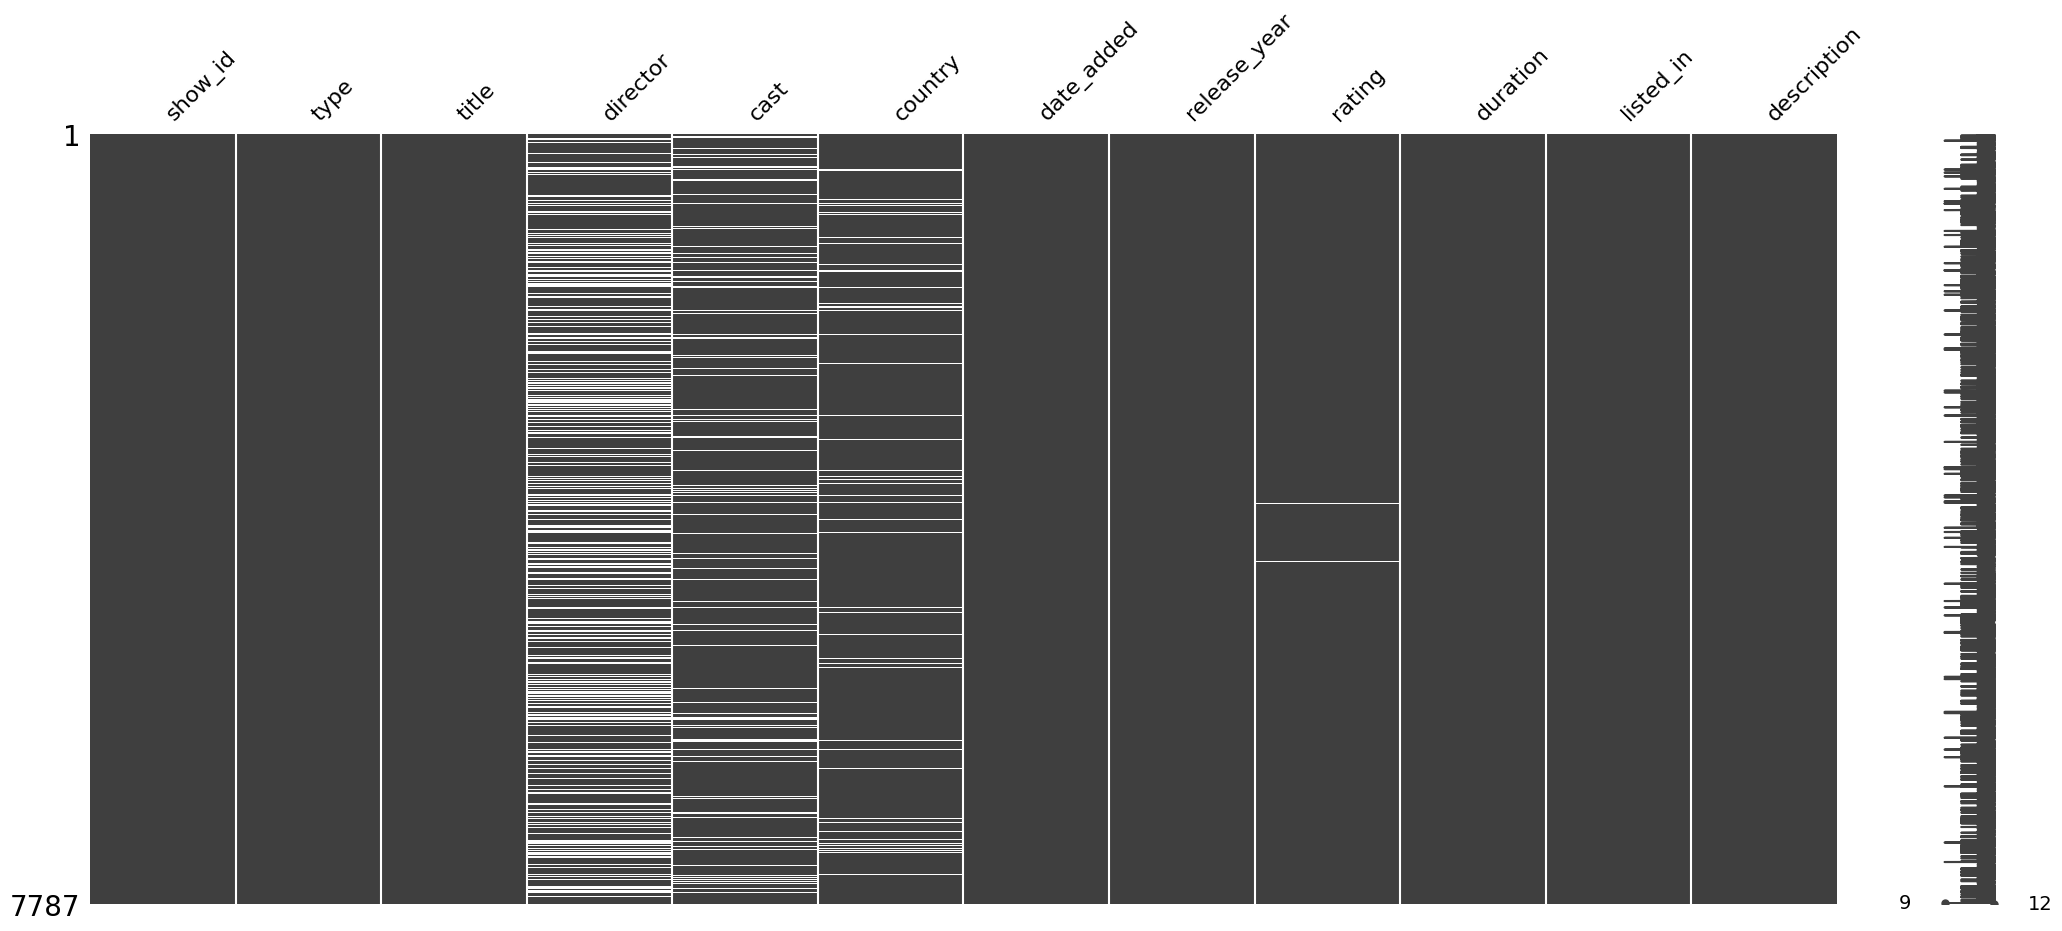

In [304]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

### What did you know about your dataset?

In the provided dataset we have a classification present for type of content already that whether it is a movie or a TV show, hence which can be later on used to verify the hypothesis that whether netflix has actually been focusing more on TV shows since the year 2010.

Along with that we also have other details about the content as well such as, name (`title`) of the content, the `country` it was actually released in, `year of release`, rating of the movie for specific age limits, total duration of the content, collective genres of the movies/TV shows mentioned in `listed_in` and brief about the content elaborated in `description`.

And since we are also required to textually process the data, so `description` being completely populated becomes an advantage. But at the same time we have some noticeable amount of absence of data in the country column, and the requirement also is to determine the sort of movies released with respect to countries.

Although there needs to be some work done in regards to visualize and analyze the data, and the genres also need to be processed and stored in a compatible format which would hence provide relative ease when accessing the content based on it.

## ***Understanding Your Variables***

In [305]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [306]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

- **`show_id`:** Unique idetification key for content (string)
- **`type`:** Type of content  whether a movie or a TV show (string)
- **`title`:** Title of the content (string)
- **`director`:** Director of the Movie (string)
- **`cast`:** Actors involved in the content (string)
- **`country`:** Country where the content was produced (list)
- **`date_added`:** Date it was added on Netflix (date)
- **`release_year`:** Actual Release year of the content (date)
- **`rating`:** Age and advisory Rating of the content (string)
- **`duration`:** Total Duration of the content provided in the form of minutes or number of seasons (string)
- **`listed_in`:** Genres of the content (list)
- **`description`:** A brief summary about the content (string)

### Check Unique Values for each variable.

In [307]:
# Check Unique Values for each variable.
for col in df.columns.to_list():
    vals = list(df[col].unique())
    if len(vals) > 10:
        vals = vals[:10]
        vals.append('...')
    print(col,':',vals)

show_id : ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', '...']
type : ['TV Show', 'Movie']
title : ['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '...']
director : [nan, 'Jorge Michel Grau', 'Gilbert Chan', 'Shane Acker', 'Robert Luketic', 'Serdar Akar', 'Yasir Al Yasiri', 'Kevin Reynolds', 'Shravan Kumar', 'Vikram Bhatt', '...']
cast : ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi', 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato', 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim', 'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane', 'Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishbu

##***Data Wrangling***

### Data Wrangling Code

In [308]:
# Write your code to make your dataset analysis ready.

### ***Handling Null Values***

In [309]:
# identify columns with numerical and object data types
int_cols = df.select_dtypes(include='integer').columns
obj_cols = df.select_dtypes(include='object').columns

# replace NaN values in numerical columns with 0
df[int_cols] = df[int_cols].fillna(0)

# replace NaN values in object columns with ' '
df[obj_cols] = df[obj_cols].fillna(' ')

In [310]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### ***Handling the empty ratings***

In [311]:
df.loc[df['rating'] == ' ','rating'] = 'NO DATA'

In [312]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'NO DATA', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'],
      dtype=object)

### ***Separating the genres***

In [313]:
def get_genre_list(genres_str):
    return genres_str.split(', ')

In [314]:
# creating a generic function applicable for all lists provided to help retreiving the actual frequency
def clean_words(sentence):
    # sentence = re.sub(r',\s|\s&\s',',',sentence)
    sentence = re.sub(r',\s',',',sentence)
    sentence = re.sub(r'-|\'\s|\s&\s','_',sentence)
    sentence = re.sub(r'\s','_',sentence)
    sentence = re.sub(r',',' ',sentence)
    return str(sentence)

In [315]:
clean_words(df.iloc[108]['listed_in'])

'Kids_TV TV_Action_Adventure TV_Sci_Fi_Fantasy'

In [316]:
# Getting the cleaned genres in a space separated format
genres_clean_list = df['listed_in'].apply(clean_words)

# Creating a completely populated matrix with the genres separated to get the actual frequency
genres_matrix = [genre for genre_content in genres_clean_list for genre in genre_content.split()]

# Storing the frequency in a dictionary
genres_freq_actual = Counter(genres_matrix)

In [317]:
genres_freq_actual = sorted(genres_freq_actual.items(), key = lambda x : x[1],reverse = True)

In [318]:
genres_freq_actual_df = pd.DataFrame(genres_freq_actual,columns = ['Genre','Frequency'])

In [319]:
genres_freq_actual_df.head(10)

,Genre,Frequency
0,International_Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International_TV_Shows,1199
4,Documentaries,786
5,Action_Adventure,721
6,TV_Dramas,704
7,Independent_Movies,673
8,Children_Family_Movies,532
9,Romantic_Movies,531


As it can be observed that `international tv shows` occur the most and `Classic cult tv` occurs the least

### ***Getting year_added from date_added***

In [320]:
year_added = df['date_added'].apply(lambda x : x.split(', ')[-1]).to_frame().rename(columns = { 'date_added' : 'year'})

In [321]:
year_added['year'].unique()

array(['2020', '2016', '2018', '2017', '2019', '2021', '2015', '2013',
       '2011', ' ', '2012', '2014', '2008', '2009', '2010'], dtype=object)

In [322]:
# replacing the empty value with some integer value
year_added[year_added['year'] == ' '] = '0'

In [323]:
# convert the year to integer for accessibility
year_added['year'] = year_added['year'].apply(lambda x : int(x))
year_added['year'].unique()

array([2020, 2016, 2018, 2017, 2019, 2021, 2015, 2013, 2011,    0, 2012,
       2014, 2008, 2009, 2010])

In [324]:
# checkig the statistics of the year content is added
year_added.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7787.0,2015.901246,72.305451,0.0,2018.0,2019.0,2020.0,2021.0


As we have a least number of values missing in the date_added column and hence in the year_added column so we can replace or remove the values which are associated with the rows containing the empty value of the specified column

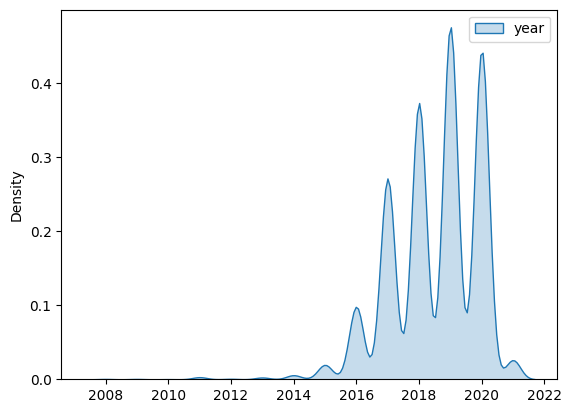

In [325]:
sns.kdeplot(data = year_added[year_added['year'] != 0], fill = True)
plt.show()

Since the distribution is a little skewed we will use the median to replace small fracton of values

In [326]:
# replacing the incorrect value with valid ones
year_added[year_added['year'] == 0 ] = int(year_added['year'].median())

In [327]:
year_added.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7787.0,2018.494029,1.387371,2008.0,2018.0,2019.0,2020.0,2021.0


### ***Checking the directors column***

Since `director` is the column with the most missing values hence checking the other variables associated with can also be seen to have a discoverable pattern to them, that relates to the column `director`.

In [328]:
directors_nan = pd.concat([df,year_added], axis = 1)

In [329]:
directors_nan = directors_nan[directors_nan['director'] == ' ']

In [330]:
directors_nan.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
11,s12,TV Show,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018
16,s17,TV Show,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019
19,s20,Movie,'89,,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2020


In [331]:
directors_nan.rating.value_counts()

TV-MA       985
TV-14       636
TV-PG       301
TV-Y7       182
TV-Y        181
TV-G         88
NR            5
R             4
NO DATA       3
TV-Y7-FV      2
NC-17         1
PG-13         1
Name: rating, dtype: int64

In [332]:
directors_nan.release_year.unique()

array([2020, 2018, 2017, 2016, 2013, 2014, 2019, 2015, 2010, 2012, 2011,
       2003, 2009, 2007, 2001, 1997, 2006, 2021, 1991, 2005, 1999, 1976,
       1992, 1994, 2008, 1977, 2002, 1979, 1998, 1988, 1996, 2004, 2000,
       1972, 1974, 1995, 1981, 1990, 1925, 1985, 1986, 1968, 1993, 1967,
       1983, 1989, 1963])

In [333]:
directors_nan.release_year.value_counts().to_frame().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
index,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1985,1968,1994,1925,1981,1974,1972,1977,1976,1963
release_year,427,418,393,262,245,156,87,63,60,42,...,1,1,1,1,1,1,1,1,1,1


In [334]:
directors_nan['type'].value_counts().to_frame().reset_index()

,index,type
0,TV Show,2226
1,Movie,163


In [335]:
# year added with refrence to the missing directors
directors_nan['year'].value_counts().to_frame().reset_index()

,index,year
0,2019,673
1,2020,653
2,2018,454
3,2017,344
4,2016,196
5,2015,29
6,2021,28
7,2014,7
8,2013,4
9,2008,1


In [336]:
dnan_rating_counts = directors_nan['rating'].value_counts().to_frame().reset_index().rename(columns = {'rating':'count','index': 'rating'})

In [337]:
dnan_rating_counts

,rating,count
0,TV-MA,985
1,TV-14,636
2,TV-PG,301
3,TV-Y7,182
4,TV-Y,181
5,TV-G,88
6,NR,5
7,R,4
8,NO DATA,3
9,TV-Y7-FV,2


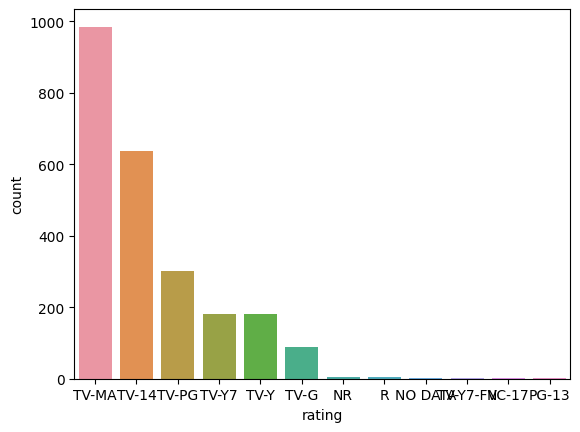

In [338]:
sns.barplot(data = dnan_rating_counts, x = 'rating', y = 'count')
plt.show()

So after going through all the other features like rating, content type, release year, added year. The insights gathered are:
- Maximum number of missing directors are associated with TV shows and very less amount for Movies.
- The date (year) the movies added are very recent for the ones which have no data about director.
- ratings like `TV-MA`, `TV-14`, `TV-PG` outnumber the other rating categories for the ones without any director in the dataset.

### ***Getting all the countries and their frequencies***

Since the variable `country` also can be evidently seen to have many missing values so a pattern can be verified to be present here as well. All to mention the column has 507 missing values.

In [339]:
df.country

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                     
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [340]:
df.loc[df['country'] == ' ','country'] = 'NO DATA'

In [341]:
country_nan_df = df[df['country'] == 'NO DATA']

In [342]:
country_nan_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NO DATA,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NO DATA,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,,"Oprah Winfrey, Ava DuVernay",NO DATA,"January 26, 2017",2017,NO DATA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NO DATA,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NO DATA,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...


In [343]:
# Getting the cleaned country in a space separated format
country_clean_list = df['country'].apply(clean_words)

# Creating a completely populated matrix with the country separated to get the actual frequency
country_matrix = [country for countries in country_clean_list for country in countries.split()]

# Storing the frequency in a dictionary
country_freq_actual = Counter(country_matrix)

In [344]:
country_freq_actual = sorted(country_freq_actual.items(), key = lambda x : x[1],reverse = True)

In [345]:
# Creating a dataframe in a sorted format to get the actual frequencies of country occuring in data
country_freq_actual_df = pd.DataFrame(country_freq_actual,columns = ['Country','Frequency'])

In [346]:
country_freq_actual_df.head()

,Country,Frequency
0,United_States,3297
1,India,990
2,United_Kingdom,723
3,NO_DATA,507
4,Canada,412


In [347]:
country_freq_actual_df['Country'].describe()

count               118
unique              118
top       United_States
freq                  1
Name: Country, dtype: object

In [348]:
country_freq_actual_df['Country'].unique()

array(['United_States', 'India', 'United_Kingdom', 'NO_DATA', 'Canada',
       'France', 'Japan', 'Spain', 'South_Korea', 'Germany', 'Mexico',
       'China', 'Australia', 'Egypt', 'Turkey', 'Hong_Kong', 'Italy',
       'Brazil', 'Taiwan', 'Belgium', 'Argentina', 'Indonesia',
       'Philippines', 'Nigeria', 'Thailand', 'South_Africa',
       'Netherlands', 'Colombia', 'Denmark', 'Ireland', 'Singapore',
       'Sweden', 'Poland', 'United_Arab_Emirates', 'Norway',
       'New_Zealand', 'Russia', 'Israel', 'Chile', 'Lebanon', 'Malaysia',
       'Pakistan', 'Czech_Republic', 'Switzerland', 'Uruguay', 'Romania',
       'Luxembourg', 'Finland', 'Austria', 'Peru', 'Saudi_Arabia',
       'Greece', 'Iceland', 'Bulgaria', 'Hungary', 'Jordan', 'Serbia',
       'Qatar', 'Kuwait', 'Morocco', 'Kenya', 'Vietnam', 'Cambodia',
       'West_Germany', 'Portugal', 'Iran', 'Ghana', 'Croatia',
       'Soviet_Union', 'Senegal', 'Malta', 'Bangladesh', 'Zimbabwe',
       'Venezuela', 'Slovenia', 'Ukraine', 'A

In [349]:
country_nan_df['type'].value_counts()

TV Show    277
Movie      230
Name: type, dtype: int64

The type of content does not seem to be impacting to the country.

In [350]:
country_nan_df.release_year.value_counts()[:11]

2018    100
2019     97
2020     63
2016     62
2017     54
2015     39
2014     19
2012     11
2010     11
2013     10
2021      9
Name: release_year, dtype: int64

Top 10 number of data items in release_year of the missing country bracket are mostly the recent years, and among that the top 3 are `2018, 2019, 2020`, in the observed order.

In [351]:
country_nan_df.rating.value_counts()

TV-MA       159
TV-14       136
TV-Y         70
TV-PG        65
TV-Y7        50
TV-G         17
PG-13         3
PG            3
R             2
NO DATA       1
TV-Y7-FV      1
Name: rating, dtype: int64

In [352]:
year_added_country = country_nan_df['date_added'].apply(lambda x : x.split(', ')[-1]).to_frame().rename(columns = { 'date_added' : 'year'})

In [353]:
year_added_country.loc[year_added_country['year'] == ' ','year'] = 'NO DATA'

In [354]:
year_added_country.value_counts()

year   
2019       160
2018       122
2020       119
2017        66
2016        19
2021        15
2015         5
NO DATA      1
dtype: int64

The year added sort of aligns with the release year of the rows upto an extent. But does not provide any significant observation that proves to be noteworthy.

### ***Processing the cast names separately and their frequencies***

Since the cast will always have more than one person to being with and hence they are required to be in separated manner to be able to able to process them and hence calculating the frequency alongside becomes a plus point just to get the top most occurring cast members in the dataset. And also there is some noticeable amount of missing values in the cast column.



In [355]:
df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [356]:
# Getting the cleaned cast in a space separated format
cast_clean_list = df['cast'].apply(clean_words)

# Creating a completely populated matrix with the cast separated to get the actual frequency
cast_matrix = [cast for casting in cast_clean_list for cast in casting.split()]

# Storing the frequency in a dictionary
cast_freq_actual = Counter(cast_matrix)

In [357]:
cast_freq_actual = sorted(cast_freq_actual.items(), key = lambda x : x[1],reverse = True)

In [358]:
# Creating a dataframe in a sorted format to get the actual frequencies of cast frequency in data
cast_freq_actual_df = pd.DataFrame(cast_freq_actual,columns = ['Cast','Frequency'])

In [359]:
cast_freq_actual_df[1:11]

,Cast,Frequency
1,Anupam_Kher,42
2,Shah_Rukh_Khan,35
3,Naseeruddin_Shah,30
4,Om_Puri,30
5,Takahiro_Sakurai,29
6,Akshay_Kumar,29
7,Boman_Irani,27
8,Amitabh_Bachchan,27
9,Paresh_Rawal,27
10,Yuki_Kaji,27


In [360]:
cast_freq_actual_df[-10:]

,Cast,Frequency
32868,Viktor_Axelsson,1
32869,Charbel_Iskandar,1
32870,Yasmine_Awad,1
32871,Raaghav_Chanana,1
32872,Meghna_Malik,1
32873,Malkeet_Rauni,1
32874,Anita_Shabdish,1
32875,Chittaranjan_Tripathy,1
32876,Nasty_C,1
32877,Rachel_Khoo,1


#### Getting insights about the missing values in the dataset in context to the casting

In [361]:
df_nan_cast = df[df['cast'] == ' ']

In [362]:
df_nan_cast.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,718,718,718,718,718,718,718,718.000000,718,718,718,718
unique,718,2,718,390,1,120,470,NaN,12,111,90,716
top,s13,Movie,1994,,,United States,"March 31, 2017",NaN,TV-MA,1 Season,Documentaries,This educational series for tiny tots features...
freq,1,426,1,299,718,304,10,NaN,284,234,166,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.749304,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.813809,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [363]:
df_nan_cast['type'].value_counts()

Movie      426
TV Show    292
Name: type, dtype: int64

It can be observed that here the number of TV shows are almost double than that of Movie.  

In [364]:
df_nan_cast['rating'].value_counts()

TV-MA       284
TV-14       173
TV-PG       130
TV-G         35
TV-Y         35
TV-Y7        19
NR           17
PG-13         8
R             8
PG            6
TV-Y7-FV      2
G             1
Name: rating, dtype: int64

### ***Getting minutes and seasons of each movie***

In [365]:
dur_split = df['duration'].apply(lambda x : x.split(' '))

In [366]:
dur_split.head(10)

0    [4, Seasons]
1       [93, min]
2       [78, min]
3       [80, min]
4      [123, min]
5     [1, Season]
6       [95, min]
7      [119, min]
8      [118, min]
9      [143, min]
Name: duration, dtype: object

Creating a list based on whether the content type is a show or a movie based on the minutes or Season(s) provided
in the column.

And storing them in a segregated manner list where the number of season and amount of minutes are stored which can be later on mapped and appended with the dataset in order to draw the visualizations and insights.

In [367]:
seasons = []
minutes = []
dur_types = ['Season','Seasons','min']

# storing the minutes and seasons into a list combined
# getting the duration and type of duration
for [d,d_typ] in  dur_split:
    if d_typ in dur_types:
        if d_typ in dur_types[:2]:
            seasons.append(int(d))
            minutes.append(0)
        else:
            minutes.append(int(d))
            seasons.append(0)
    else:
        seasons.append(0)
        minutes.append(0)



In [368]:
# minutes of the content
minutes[:10]

[0, 93, 78, 80, 123, 0, 95, 119, 118, 143]

In [369]:
# seasons of the content
seasons[:10]

[4, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [370]:
# keeping the data saved for further usage
duration_seg_df = pd.DataFrame({'season': seasons, 'minutes':minutes})

In [371]:
df_dur = pd.concat([df,duration_seg_df],axis = 1)

In [372]:
df_dur.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,minutes
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,0,123


In [373]:
# now it is visible that the respective seasons and minutes are allloted successfully we can free up the space
del df_dur

df = pd.concat([df,duration_seg_df], axis = 1)

### What all manipulations have you done and insights you found?

In the provided dataset, the majority of data belongs to the `Movie` category and majority of it belong to **TV-MA** rating category, and most of the content released and added in the dataset present is from the recent years 2020, 2019 ...

The `genres` that are found to be associated the most is **International_Movies**,  **Dramas**, **Comedies** and,  **International_TV_shows**.

And in the missing values we have most missing values present in the column `director`, but in the mentioned portion mostly the type was **TV shows** and very less for the category **Movies** and similar event occured for the feature `cast` as well, as for that as well the data items with the higher number of missing values in `cast` column has number of entries are of *TV Show* type rather than *Movie* And to explain the other features ,the trend of majority is followed, such as the top most occuring TV rating occur in the same pattern in the filtered dataset, and similiarly other columns like `year_added`, `release_year`, `listed_in` (`genre`), etc. follow.


Also since the majority of the data we have are text blocks(text features of the dataset) of lists which are separated by some separators so processing of those features is also done, features like `casting`, `country`,  `listed_in`. Later on for further developing the models and meeting up with the problem statement the other features with similar characteristics like `description` and `title` are also required to be observed closely and processed to get a business outcome from those features as well.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### UNIVARIATE ANALYSIS

#### Chart 1 - Release year

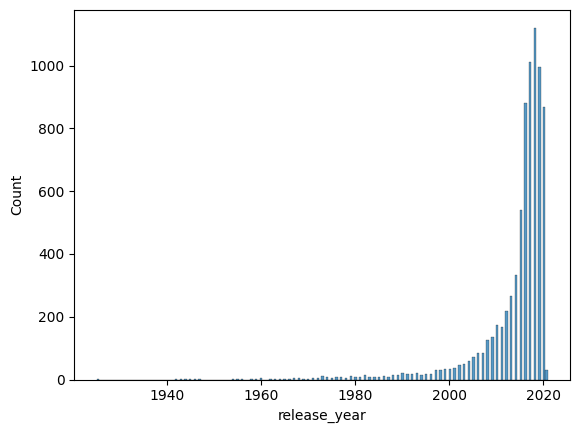

In [374]:
sns.histplot(df['release_year'])
plt.show()

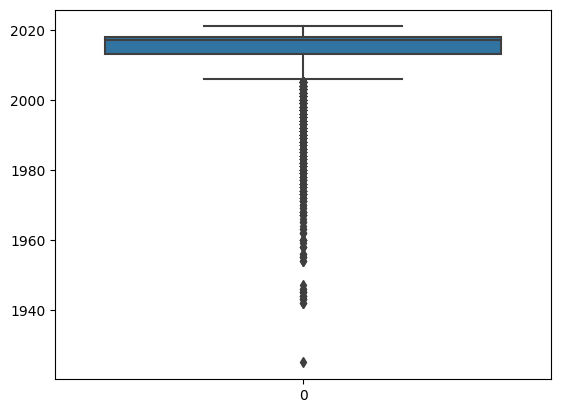

In [375]:
# countplot and boxplot for release_year
sns.boxplot(df['release_year'])
plt.show()

In [376]:
# sns.df['date_added'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 2 - Content Type

In [377]:
# tv_rating_counts = df['rating'].value_counts().sort_index().sum()
# plt.pie
rating_labels = df['rating'].value_counts().sort_index().keys().tolist()
rating_counts = df['rating'].value_counts().sort_index().values.tolist()

In [378]:
rating_labels

['G',
 'NC-17',
 'NO DATA',
 'NR',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'UR']

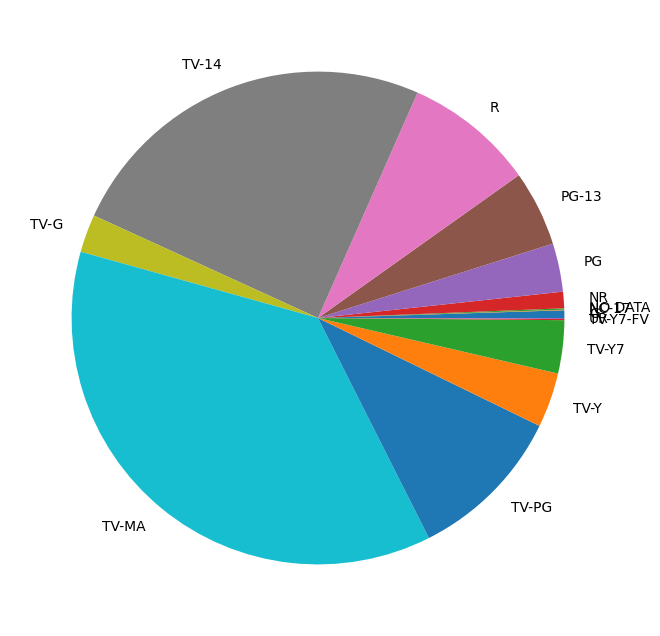

In [379]:
fig = plt.figure(figsize = (10,8))

plt.pie(rating_counts, labels= rating_labels)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 3 - Directors

In [380]:
directors = df['director'].value_counts()[1:11]

In [381]:
directors = pd.DataFrame(list(zip(directors.keys().tolist(),directors.values.tolist())), columns = ['directors','count'])

In [382]:
directors

,directors,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Lance Bangs,8


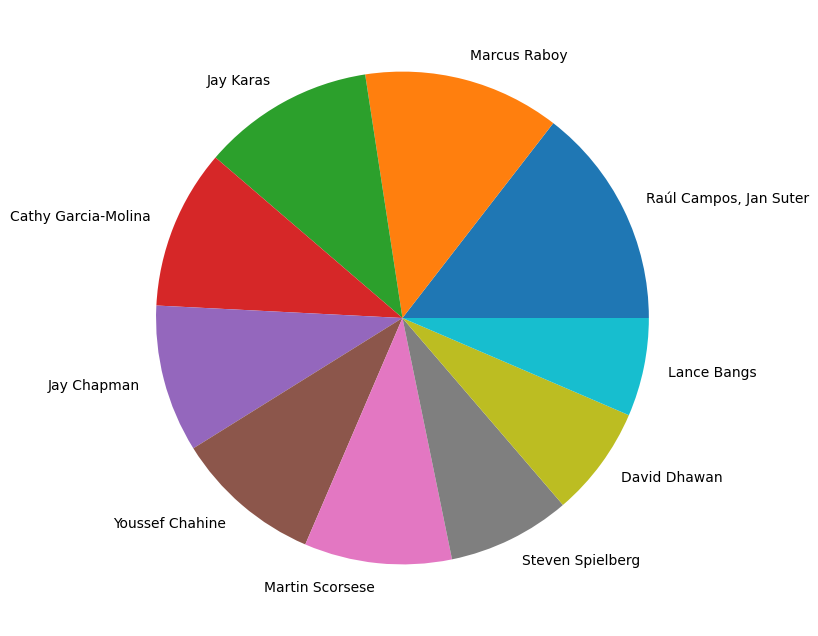

In [383]:
fig = plt.figure(figsize = (10,8))

plt.pie(directors['count'], labels= directors['directors'])
plt.show()

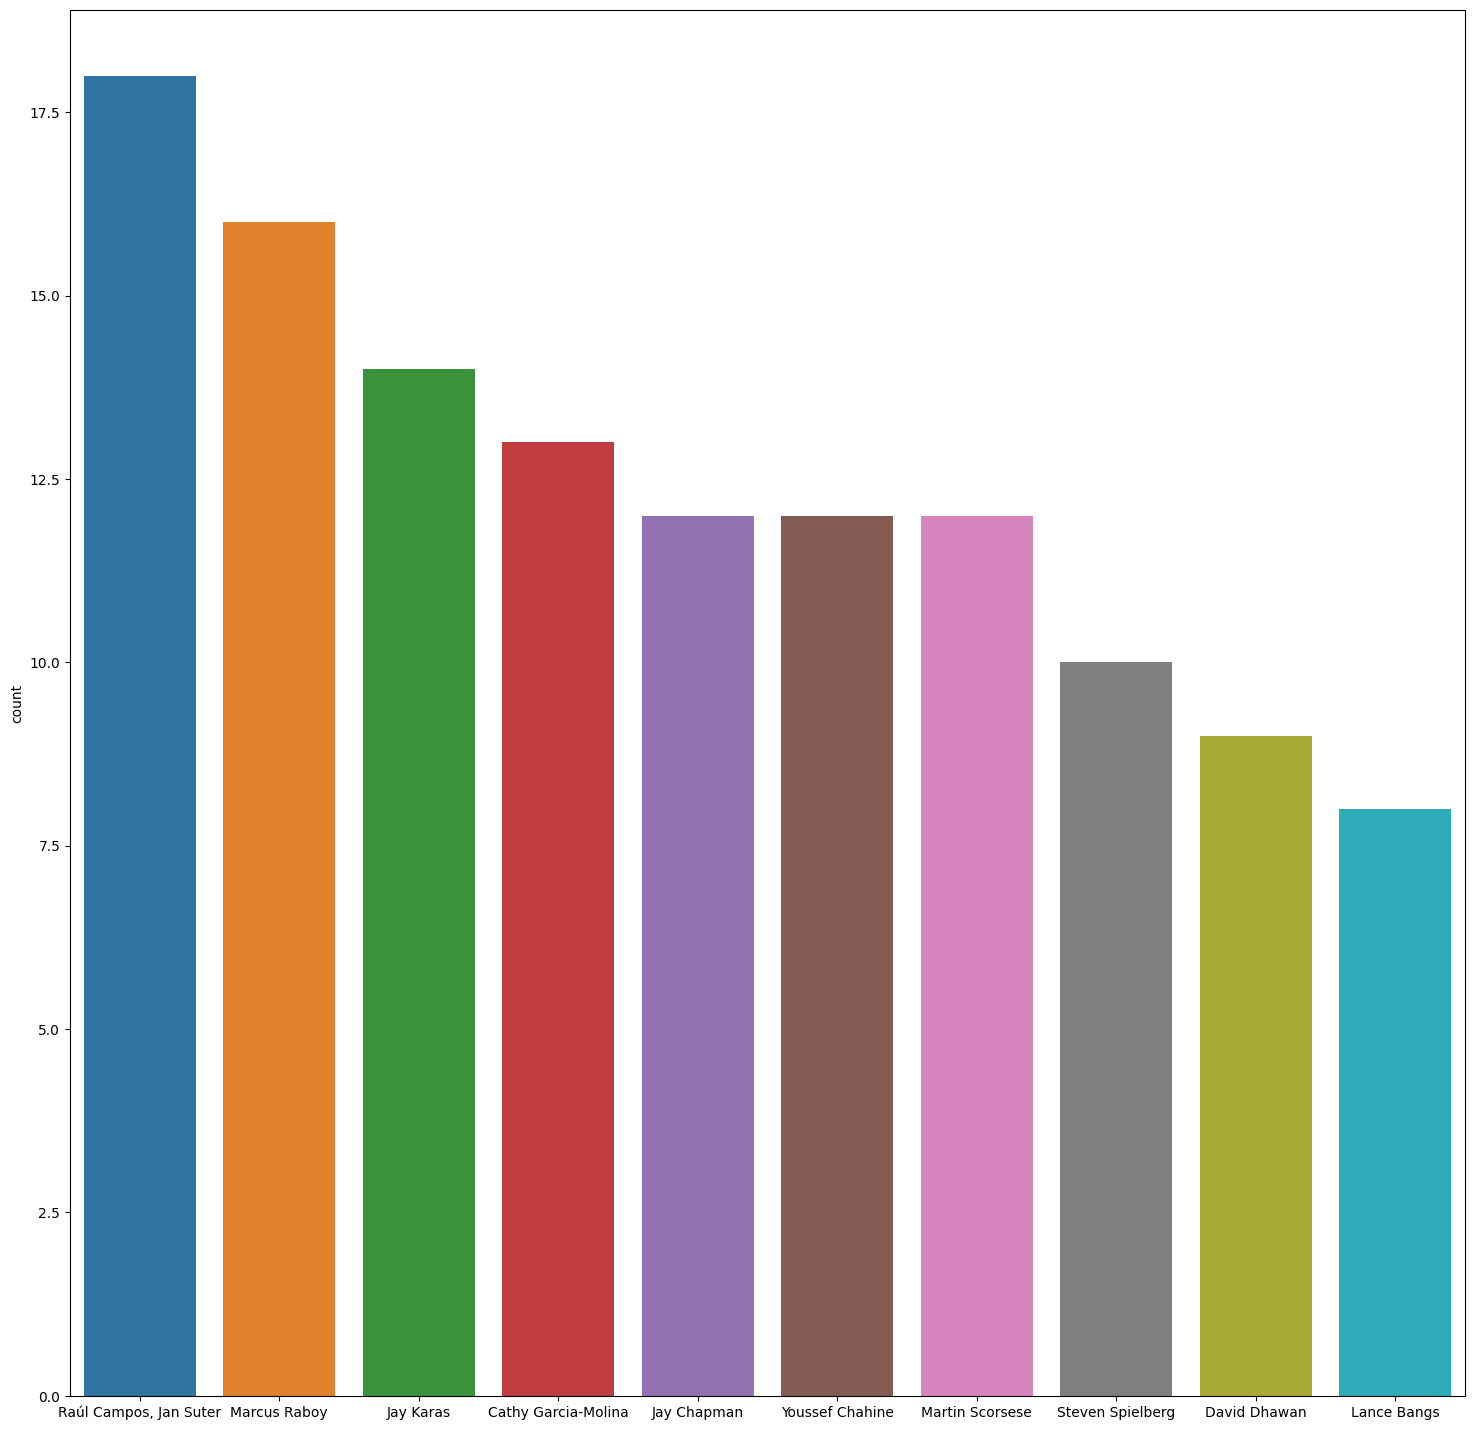

In [384]:
# directors.plot(kind= 'bar')
plt.figure(figsize = (18,18))
sns.barplot(data = directors, x = directors['directors'].index, y = directors['count'])
plt.xticks(list(range(len(directors.index))), directors['directors'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 4 - Duration of Content

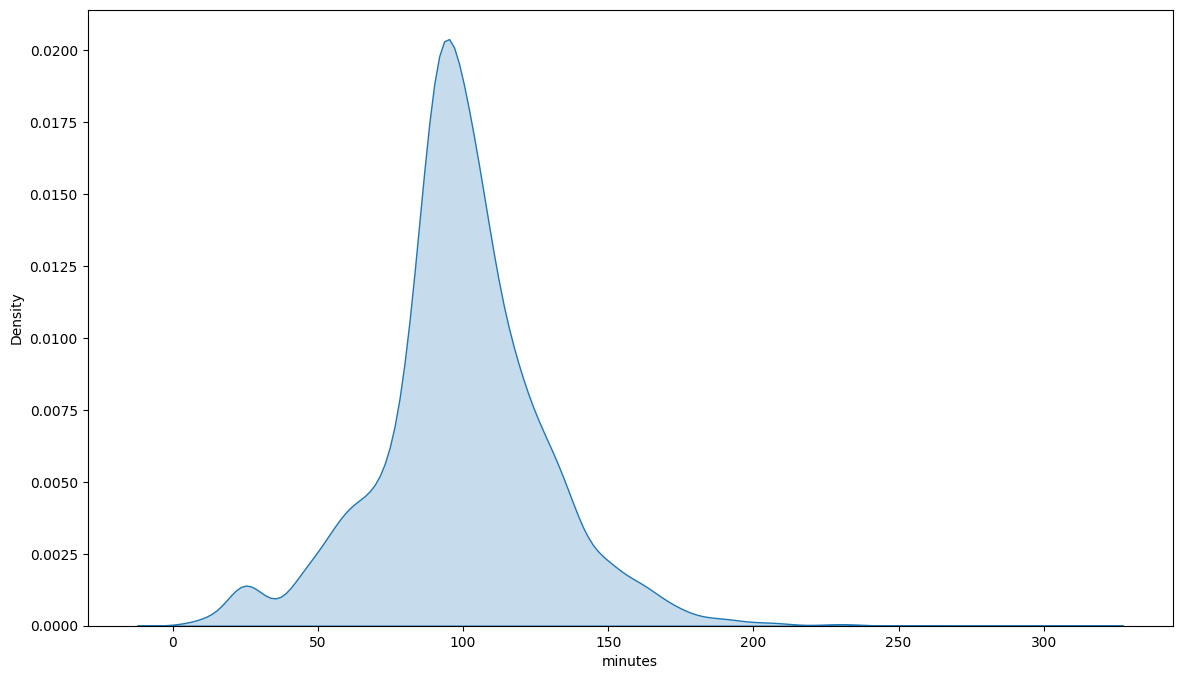

In [385]:
plt.figure(figsize = (14,8))
sns.kdeplot(data = df.loc[df['minutes'] != 0, 'minutes'], fill = True)
plt.show()

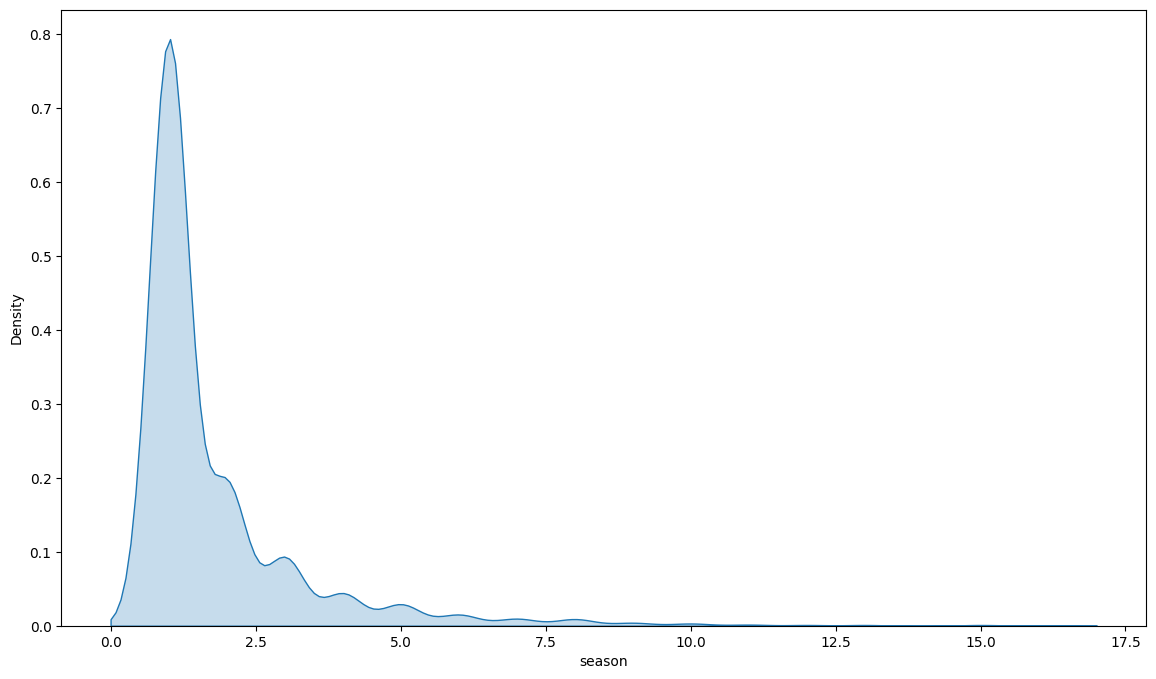

In [386]:
plt.figure(figsize = (14,8))
sns.kdeplot(data = df.loc[df['season'] != 0, 'season'], fill = True)
plt.show()

Most of the movies are an hour to two hour long and majority of the tv shows have at maximum 2 seasons.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 5 - Title of Content

In [387]:
# wordcloud for title
df['title'].head(10)

0       3%
1     7:19
2    23:59
3        9
4       21
5       46
6      122
7      187
8      706
9     1920
Name: title, dtype: object

In [388]:
word_cloud_title = ' '.join(df['title'])

In [389]:
word_cloud_title[0:200]

"3% 7:19 23:59 9 21 46 122 187 706 1920 1922 1983 1994 2,215 3022 Oct-01 Feb-09 22-Jul 15-Aug '89 \u200b\u200bKuch Bheege Alfaaz \u200bGoli Soda 2 \u200bMaj Rati \u200b\u200bKeteki \u200bMayurakshi \u200bSAINT SEIYA: Knights of the Zodiac (T"

In [390]:
title_wc = WordCloud(width = 800, height = 800, background_color = 'white').generate(word_cloud_title)

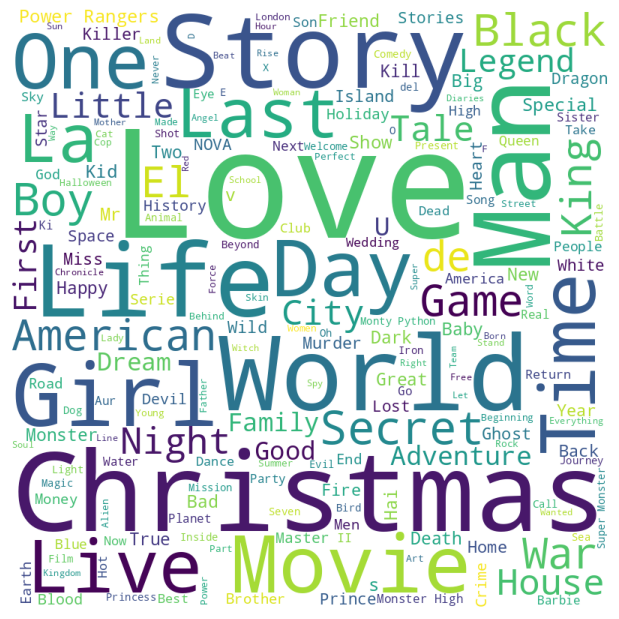

In [391]:
plt.figure(figsize = (10,6),facecolor=None)
plt.imshow(title_wc)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 6 - Description

In [392]:
df['description'].head(10)

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
5    A genetics professor experiments with a treatm...
6    After an awful accident, a couple admitted to ...
7    After one of his high school students attacks ...
8    When a doctor goes missing, his psychiatrist w...
9    An architect and his wife move into a castle t...
Name: description, dtype: object

In [393]:
word_cloud_desc = ' '.join(df['description'])

In [394]:
word_cloud_desc[:500]

"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from da"

In [395]:
desc_wc = WordCloud(height = 800,width = 800,background_color='white').generate(word_cloud_desc)

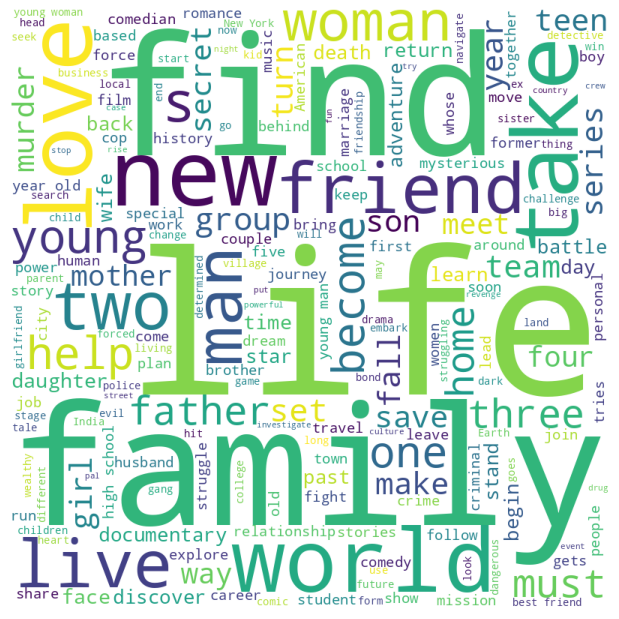

In [396]:
plt.figure(figsize = (10,6),facecolor=None)
plt.imshow(desc_wc)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 7 - Country

In [397]:
country_freq_actual_df.head(10)

,Country,Frequency
0,United_States,3297
1,India,990
2,United_Kingdom,723
3,NO_DATA,507
4,Canada,412
5,France,349
6,Japan,287
7,Spain,215
8,South_Korea,212
9,Germany,199


Top 10 counties with most content in the data

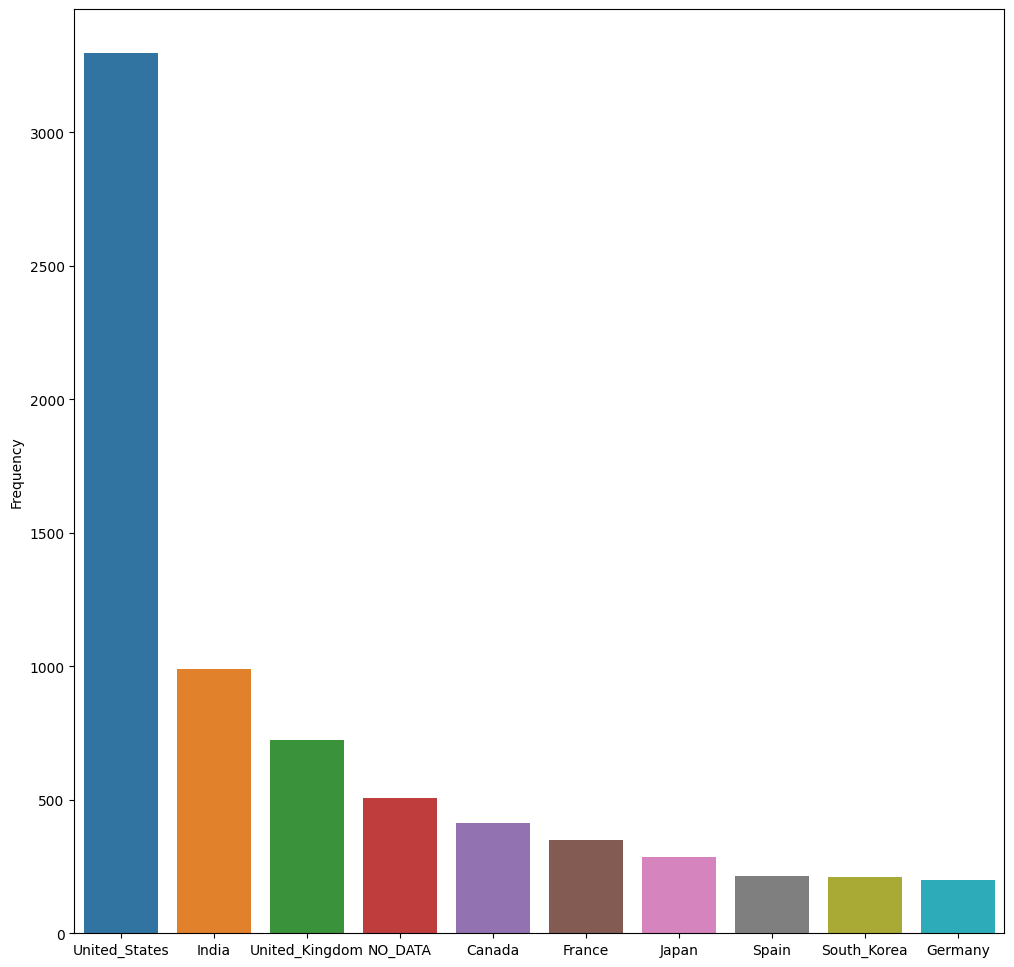

In [398]:
plt.figure(figsize = (12,12))
sns.barplot(data = country_freq_actual_df, x = country_freq_actual_df.head(10)['Country'].index, y = country_freq_actual_df.head(10)['Frequency'])
plt.xticks(list(range(len(country_freq_actual_df.head(10).index))), country_freq_actual_df.head(10)['Country'])
plt.show()

10 Countries with Least content assoication in dataset.

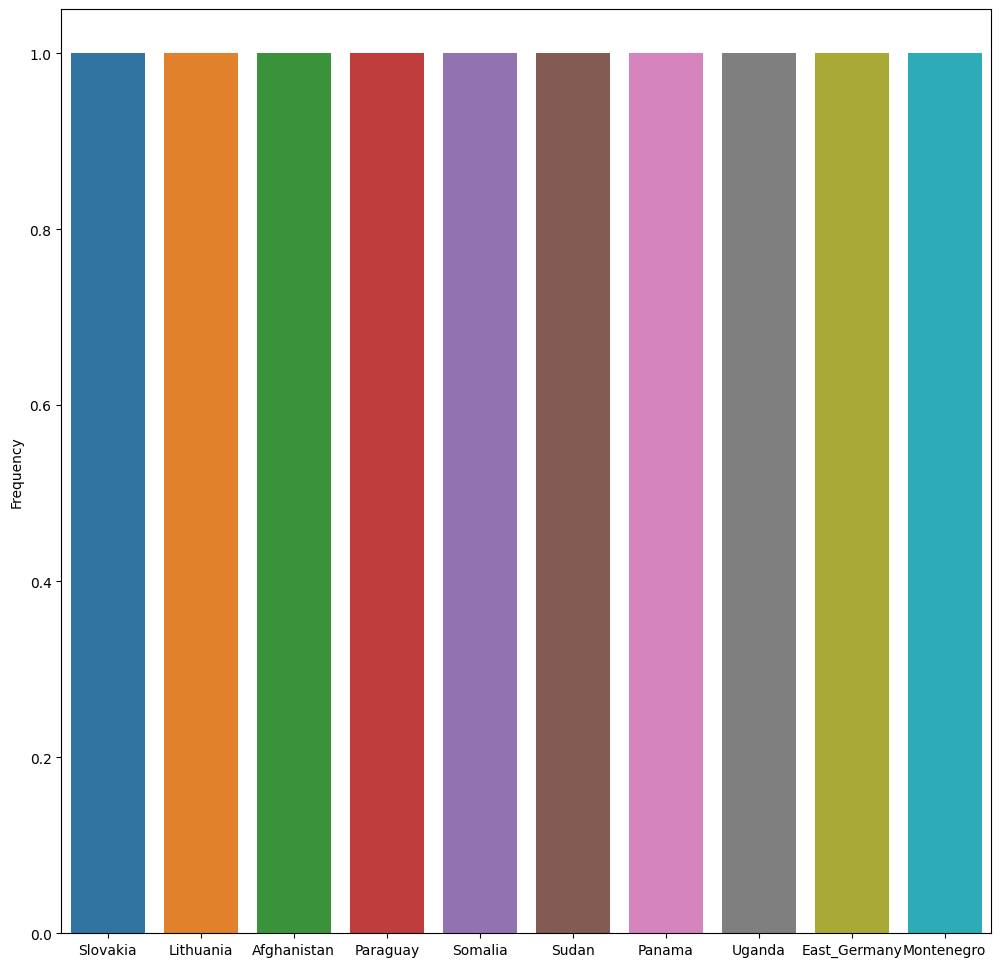

In [399]:
plt.figure(figsize = (12,12))
sns.barplot(data = country_freq_actual_df, x = country_freq_actual_df.tail(10)['Country'].index, y = country_freq_actual_df.tail(10)['Frequency'])
plt.xticks(list(range(len(country_freq_actual_df.tail(10).index))), country_freq_actual_df.tail(10)['Country'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 8 - Casting

In [400]:
# top artists/actors with most number of movies and lowest number of movies

In [401]:
# remove the missing values from cast dataframe
cast_freq_nw_df = cast_freq_actual_df.loc[cast_freq_actual_df['Cast'] != '_']

Top 10 Artists with highest number of movies/TV shows.

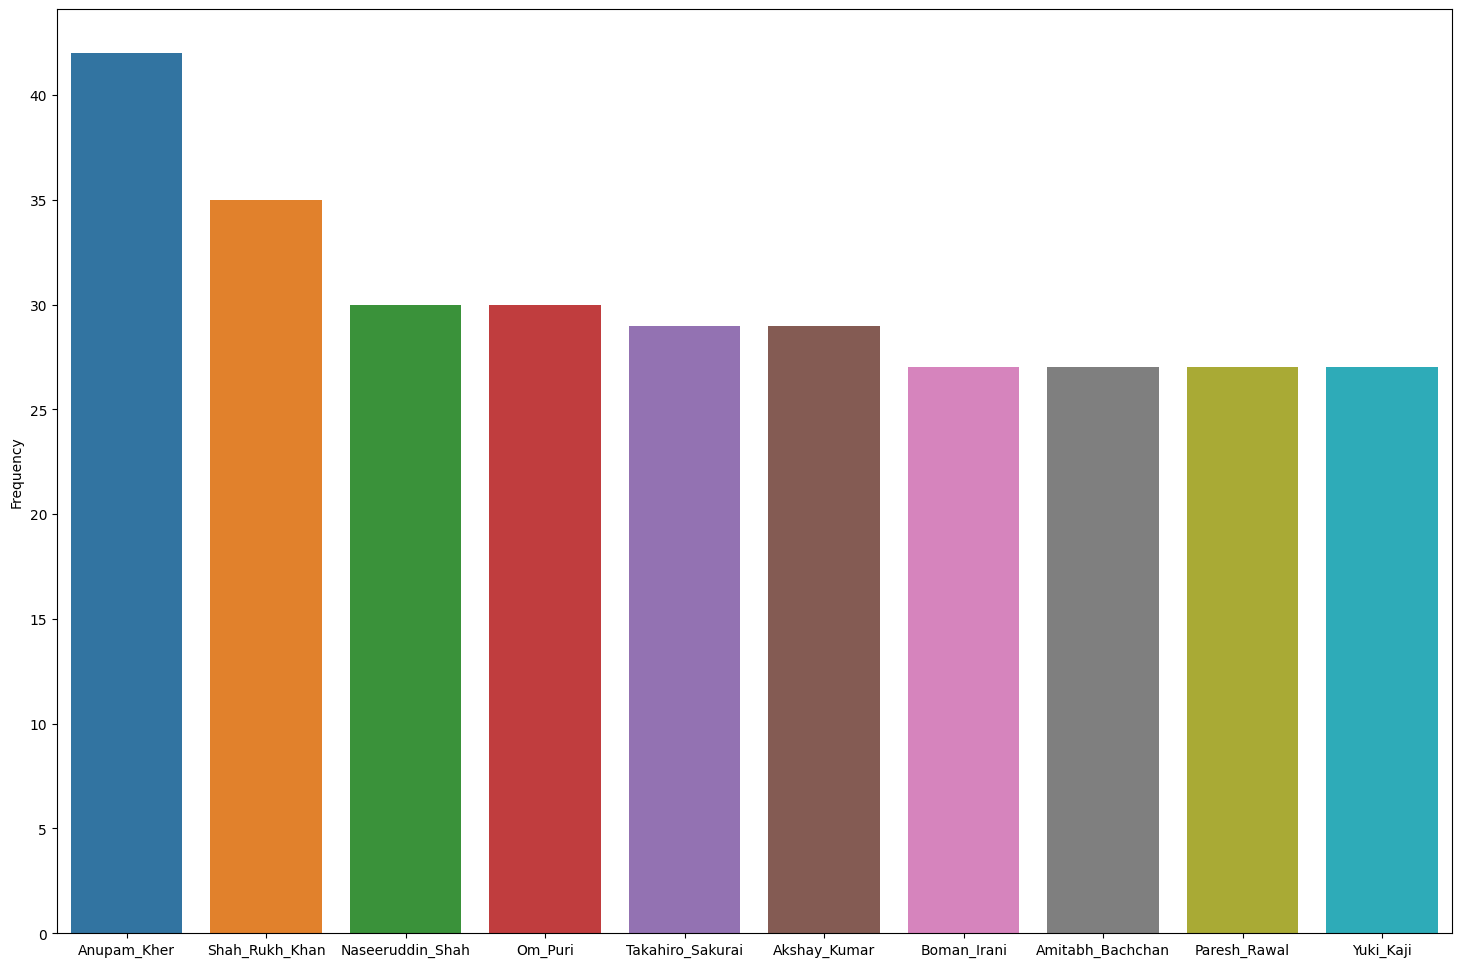

In [402]:
plt.figure(figsize = (18,12))
sns.barplot(data = cast_freq_actual_df, x = cast_freq_nw_df.head(10)['Cast'].index, y = cast_freq_nw_df.head(10)['Frequency'])
plt.xticks(list(range(len(cast_freq_nw_df.head(10).index))), cast_freq_nw_df.head(10)['Cast'])
plt.show()

10 artists with least number of Movies/TV shows

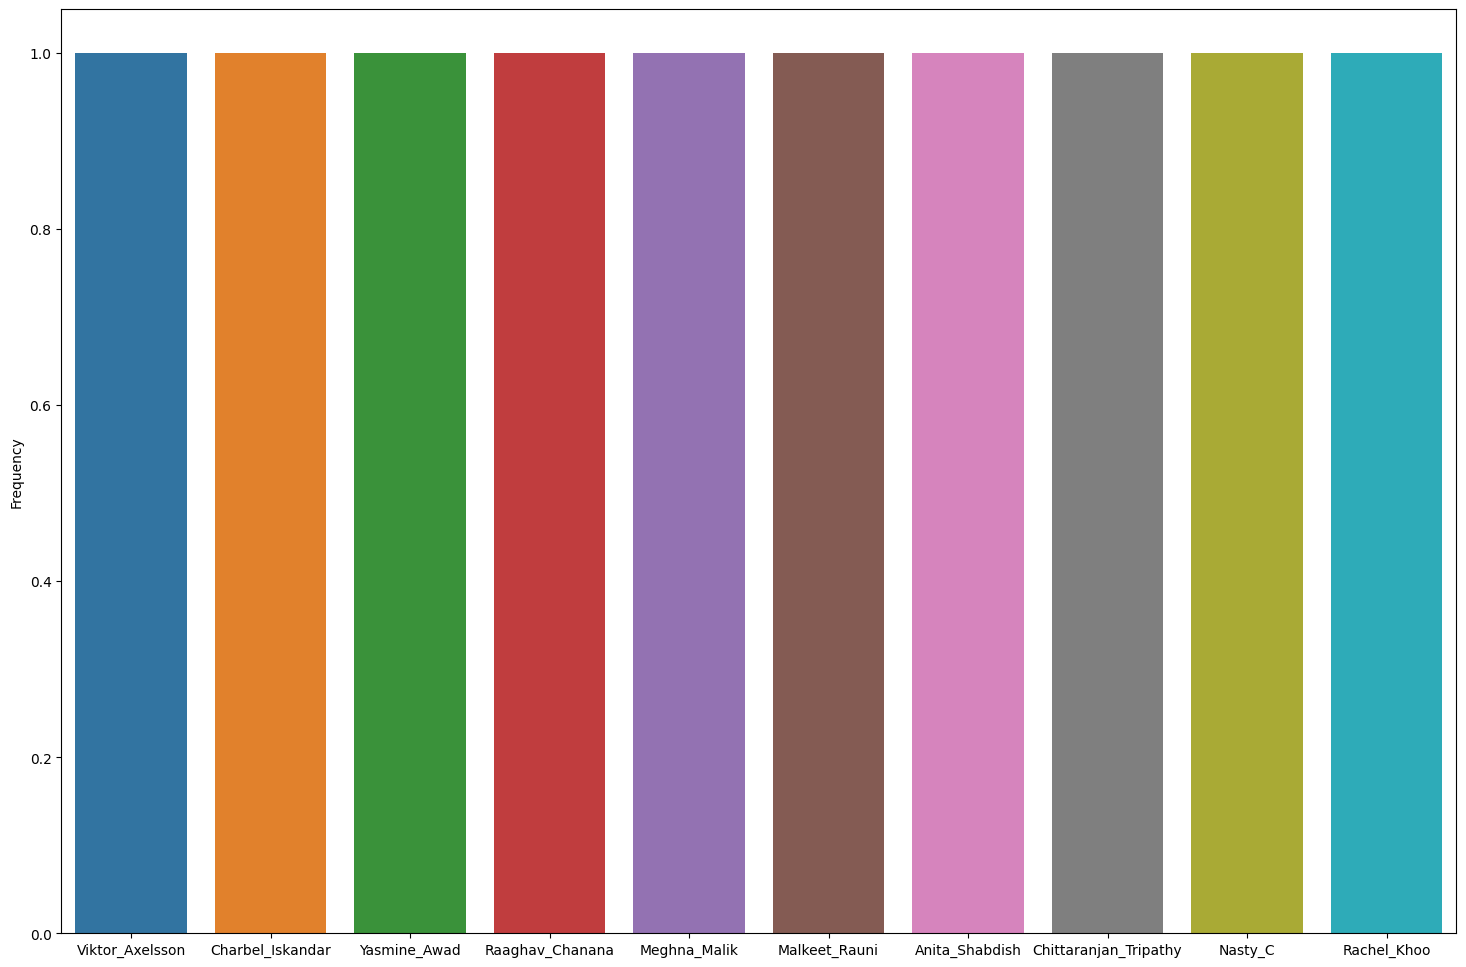

In [403]:
plt.figure(figsize = (18,12))
sns.barplot(data = cast_freq_actual_df, x = cast_freq_nw_df.tail(10)['Cast'].index, y = cast_freq_nw_df.tail(10)['Frequency'])
plt.xticks(list(range(len(cast_freq_nw_df.tail(10).index))), cast_freq_nw_df.tail(10)['Cast'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 9 - Rating and Content type

In [404]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'season', 'minutes'],
      dtype='object')

In [405]:
country_rating_df = df.groupby(by = 'rating')['country'].max().reset_index()

In [406]:
country_rating_df

,rating,country
0,G,"United States, East Germany, West Germany"
1,NC-17,United States
2,NO DATA,United States
3,NR,"Venezuela, Colombia"
4,PG,"United States, United Kingdom, Canada"
5,PG-13,"United States, United Kingdom, Spain, South Korea"
6,R,"United States, United Kingdom, Italy"
7,TV-14,Vietnam
8,TV-G,Zimbabwe
9,TV-MA,West Germany


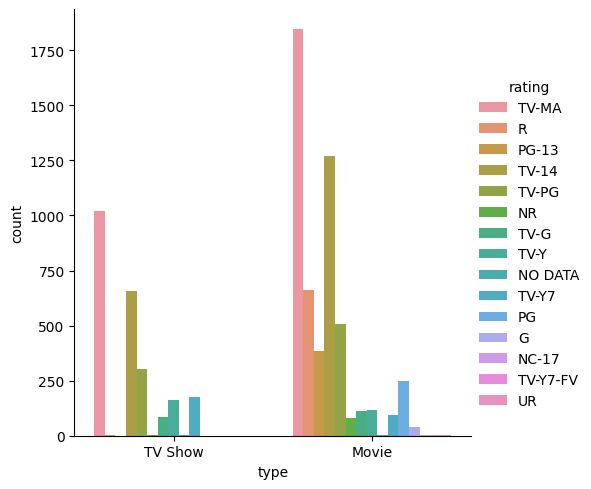

In [407]:
sns.catplot(x='type', hue='rating', kind='count', data=df)
plt.show()

In [408]:
del country_rating_df

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 10 - Rating V/s Duration

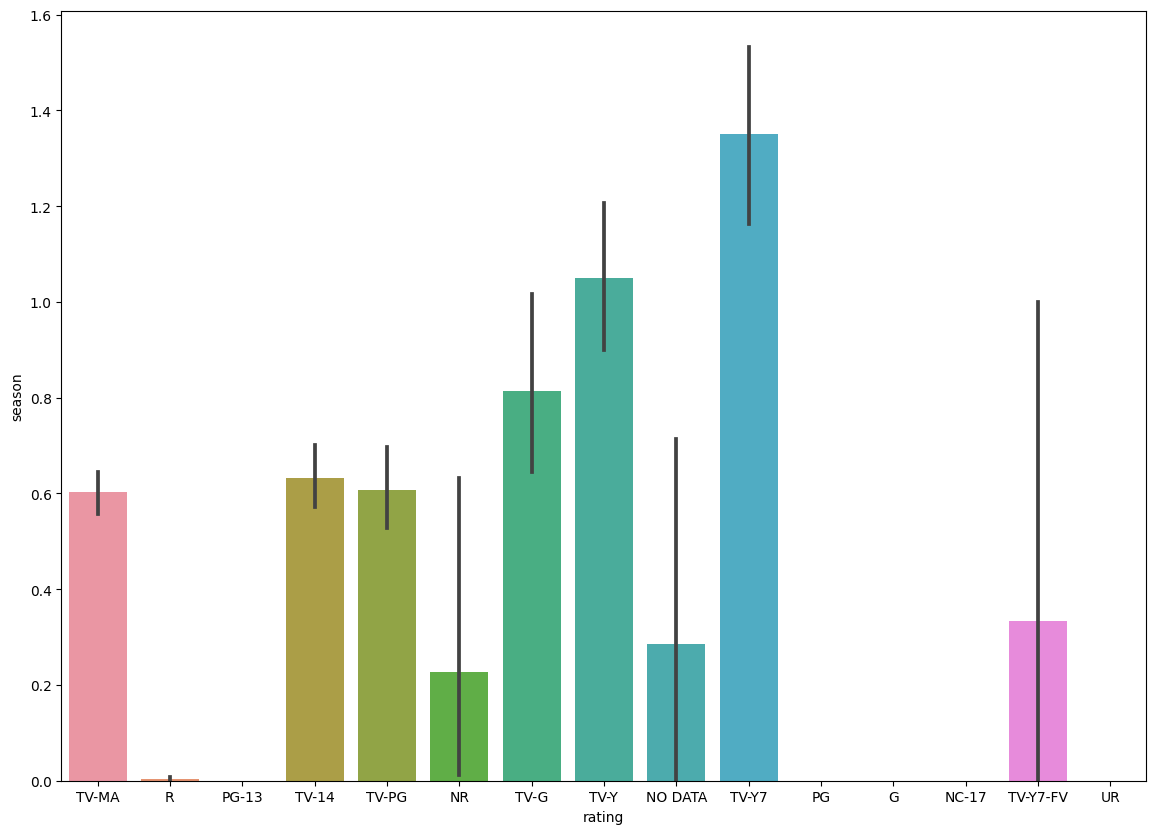

In [409]:
# getting the rating and season(s) for content type tv show
plt.figure(figsize = (14,10))
sns.barplot(x = 'rating', y = 'season', data = df)
plt.show()

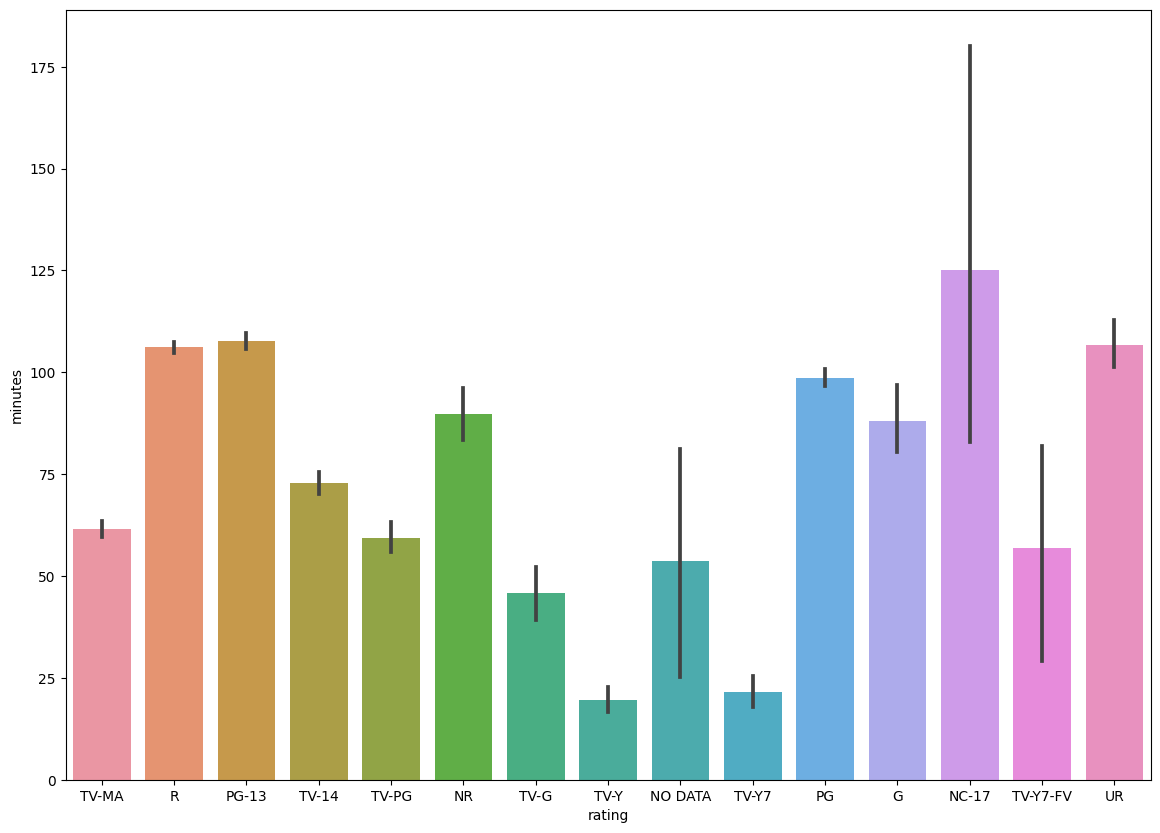

In [410]:
# getting the rating and minutes for content type movies
plt.figure(figsize = (14,10))
sns.barplot(x = 'rating', y = 'minutes', data = df)
plt.show()

In [411]:
# crafing the melted dataframe on the basis of rating
melt_dur = pd.melt(df, id_vars=['rating'], var_name='feature', value_name='value')
melt_dur.head()

,rating,feature,value
0,TV-MA,show_id,s1
1,TV-MA,show_id,s2
2,R,show_id,s3
3,PG-13,show_id,s4
4,PG-13,show_id,s5


In [412]:
# filtering only the two required feature from the melted dataframe
melt_dur = melt_dur[melt_dur['feature'].isin(['minutes','season'])]

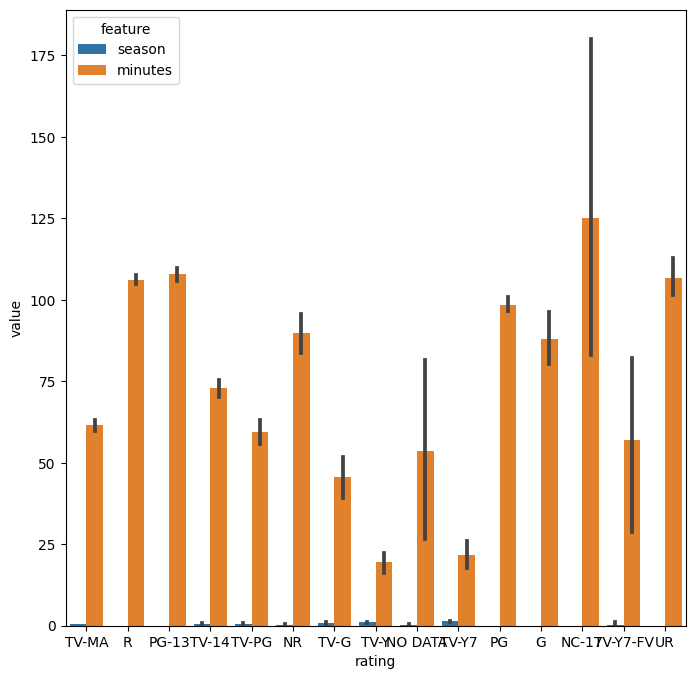

In [413]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'rating', y = 'value', hue = 'feature', data = melt_dur)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 11 - Country V/s Rating

In [414]:
df['countries'] = country_clean_list.apply(lambda x : x.split())

In [415]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,minutes,countries
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,0,[Brazil]
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0,93,[Mexico]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0,78,[Singapore]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0,80,[United_States]
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,0,123,[United_States]


In [453]:
countries_rating_df = df[['countries','rating','type']].explode('countries').groupby(['countries','rating']).count().sort_values(by = 'countries').reset_index().rename(columns = {'type':'count'})
countries_rating_df.head()

,countries,rating,count
0,Afghanistan,TV-MA,1
1,Albania,TV-MA,1
2,Algeria,TV-MA,2
3,Angola,TV-MA,1
4,Argentina,TV-Y,2


In [449]:
# getting the unique countries
countries = country_freq_actual_df['Country']
countries.head()

0     United_States
1             India
2    United_Kingdom
3           NO_DATA
4            Canada
Name: Country, dtype: object

In [457]:
# checking the missing ratings with respect to their countries
countries_rating_df[countries_rating_df['countries'] == 'NO_DATA']

,countries,rating,count
296,NO_DATA,TV-Y7-FV,1
297,NO_DATA,TV-Y,70
298,NO_DATA,TV-PG,65
299,NO_DATA,TV-MA,159
300,NO_DATA,TV-G,17
301,NO_DATA,TV-Y7,50
302,NO_DATA,R,2
303,NO_DATA,PG-13,3
304,NO_DATA,PG,3
305,NO_DATA,NO DATA,1


After flattening the dataframe each content is categorized on the basis of frequency of rating of content available for every country with every type of rated content available in the country.

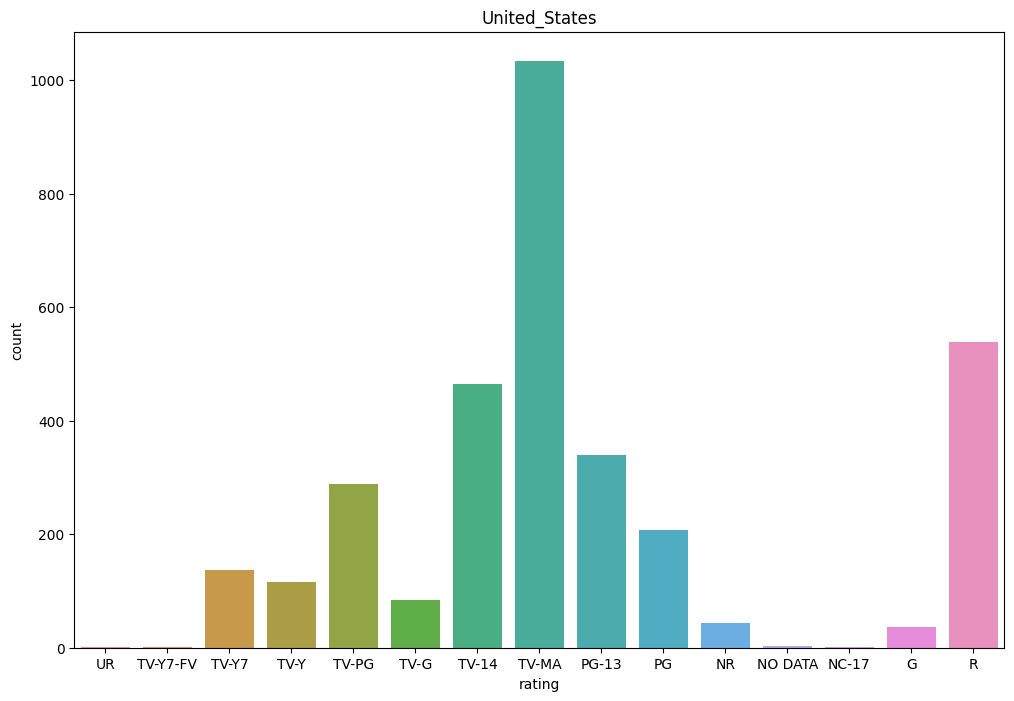

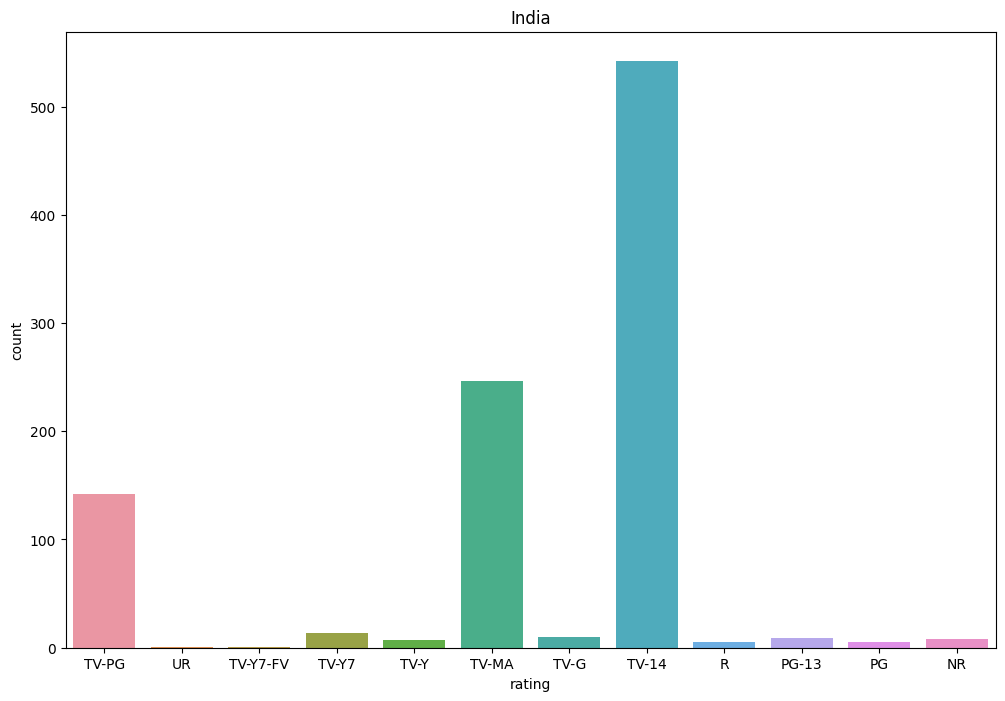

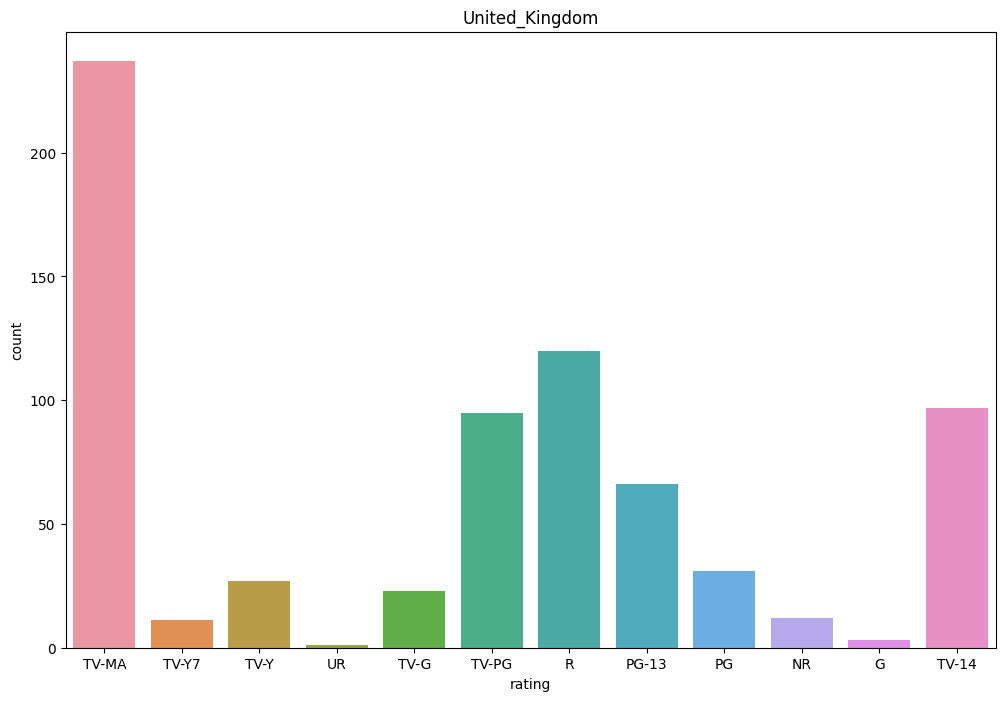

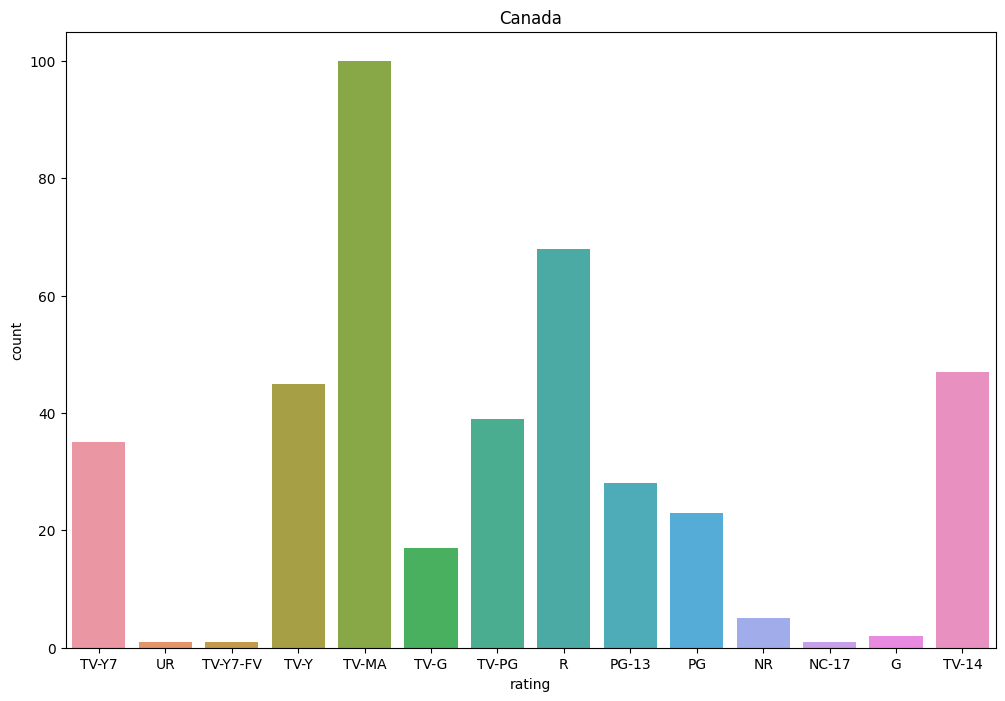

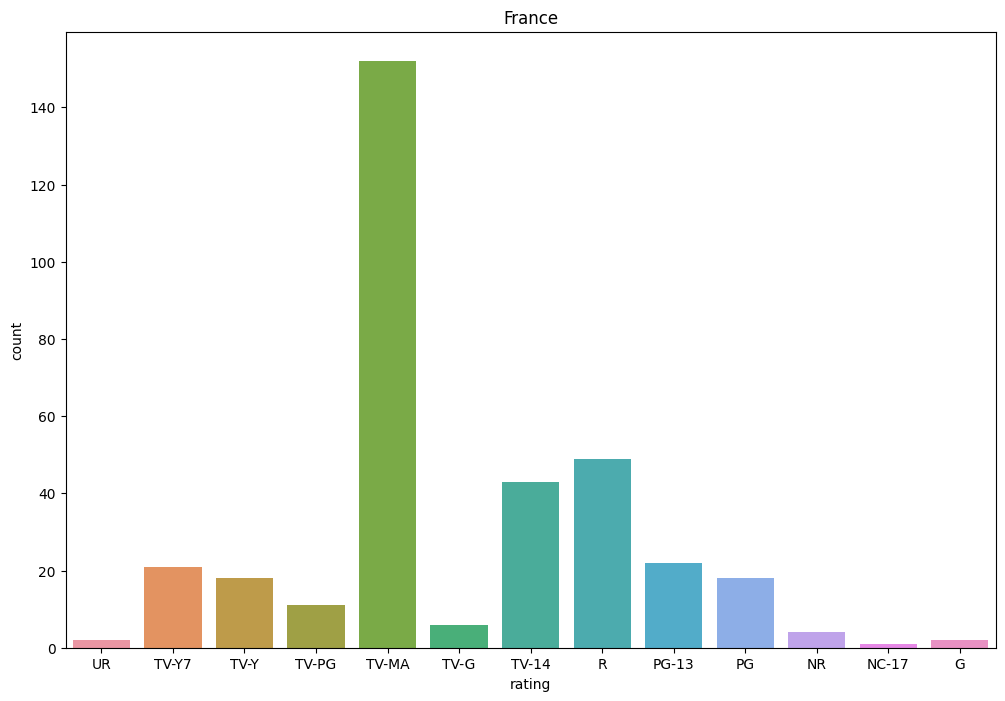

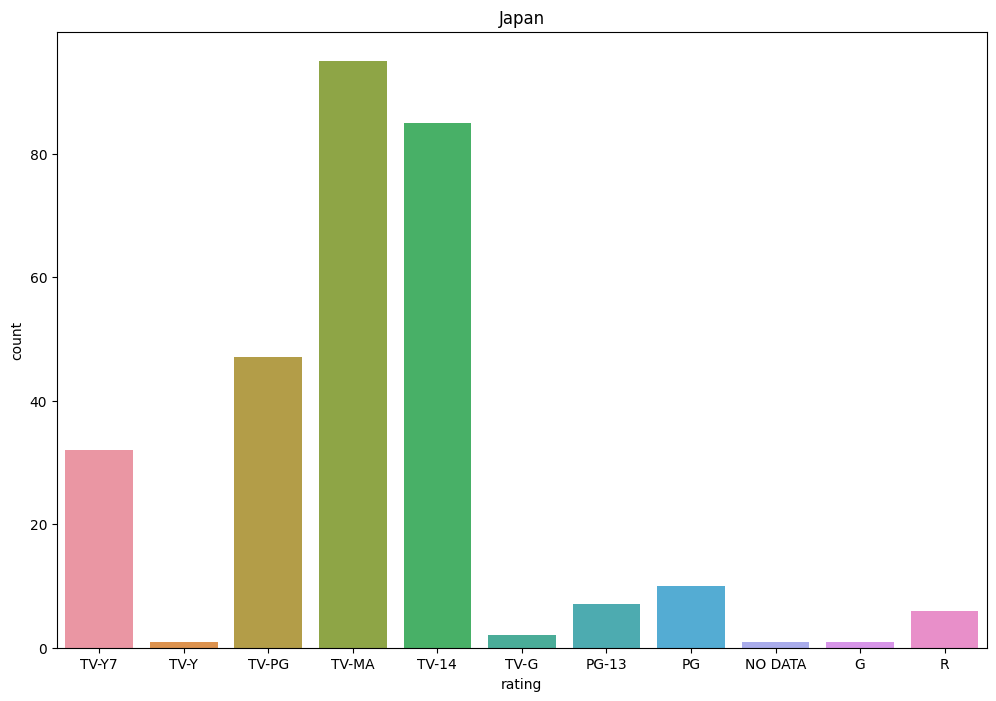

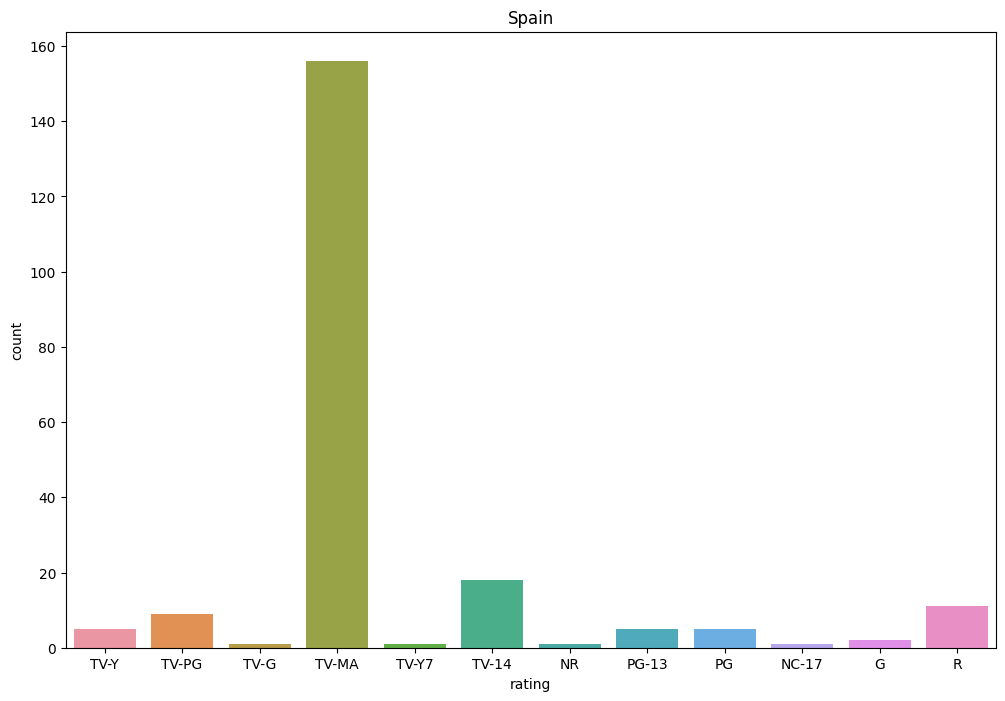

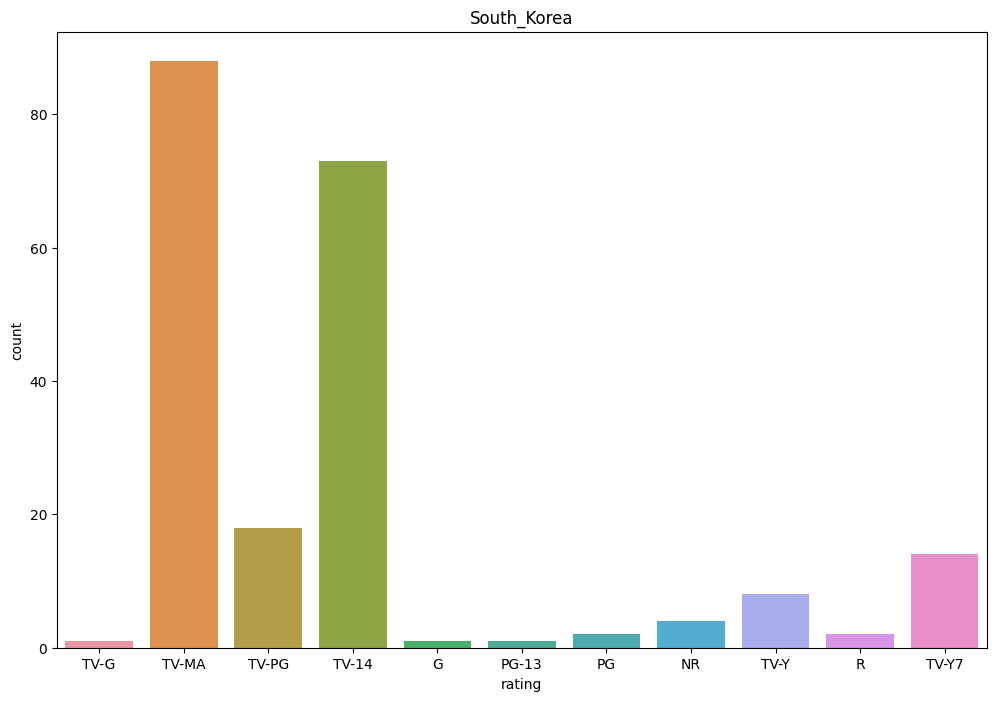

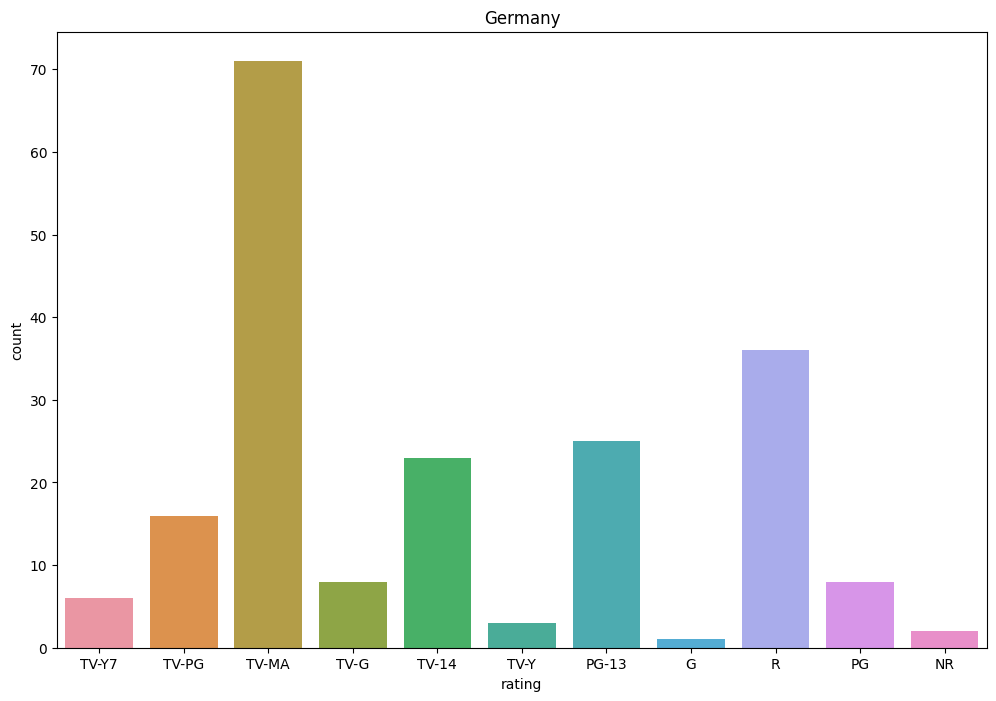

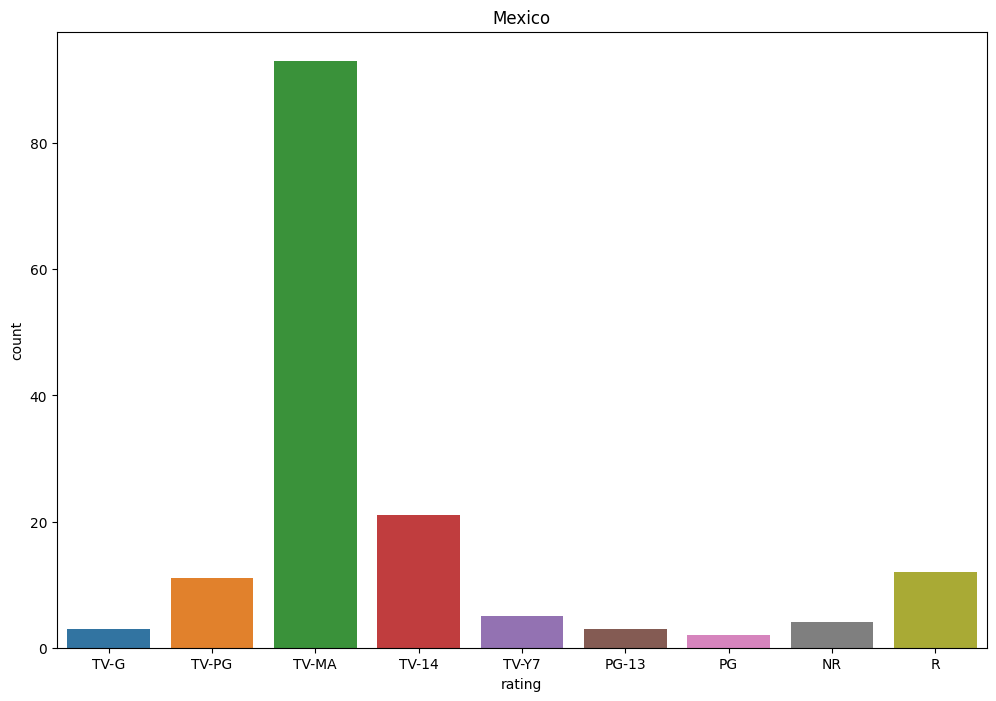

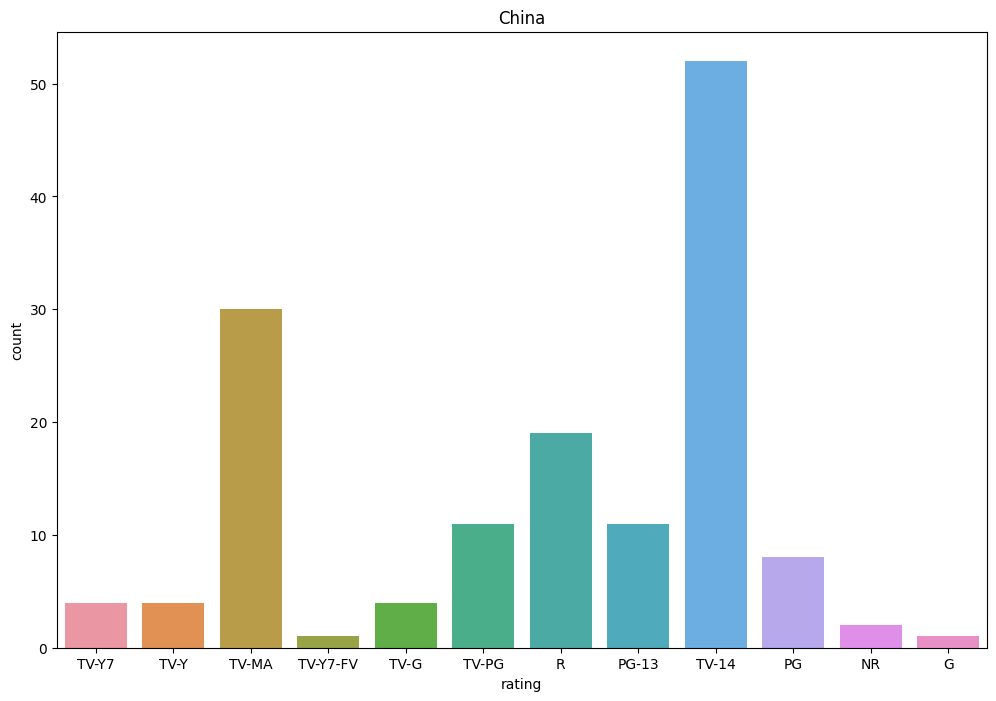

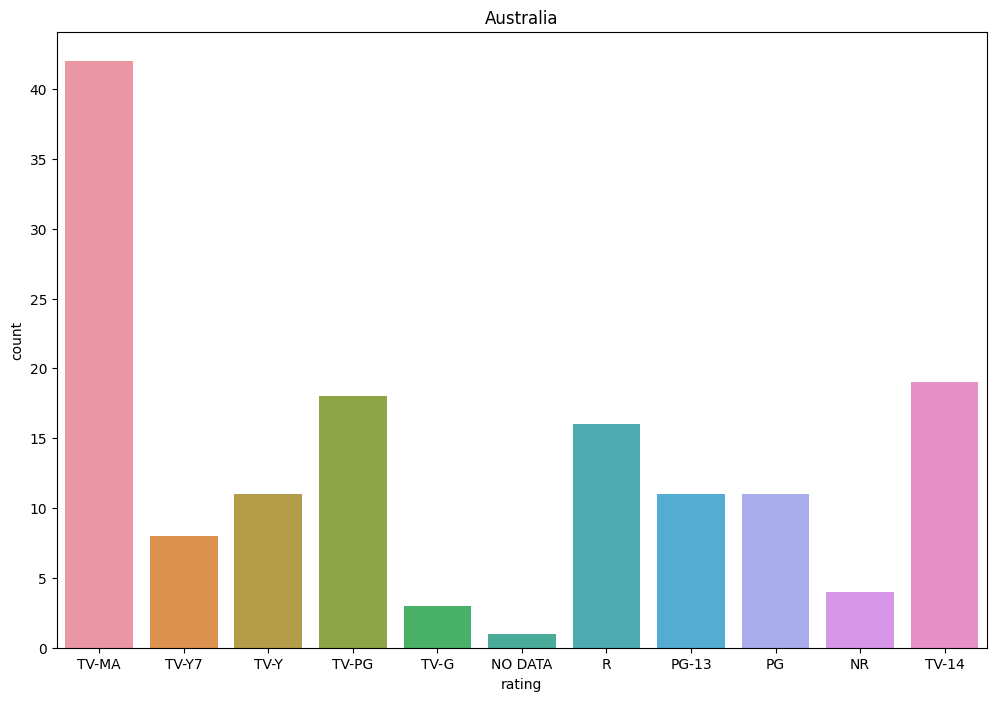

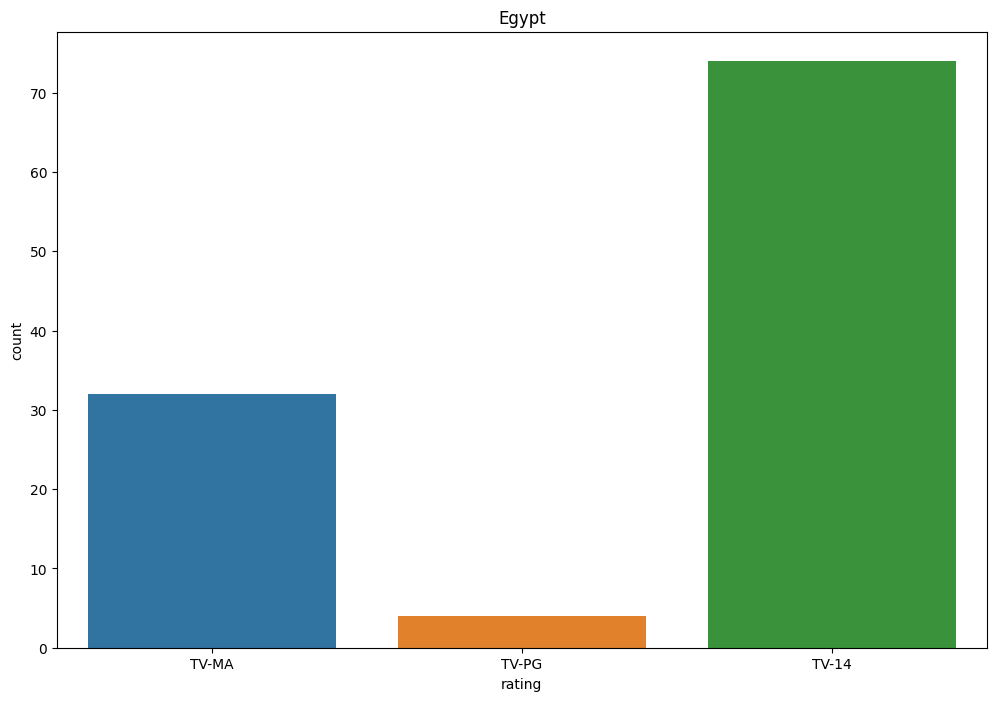

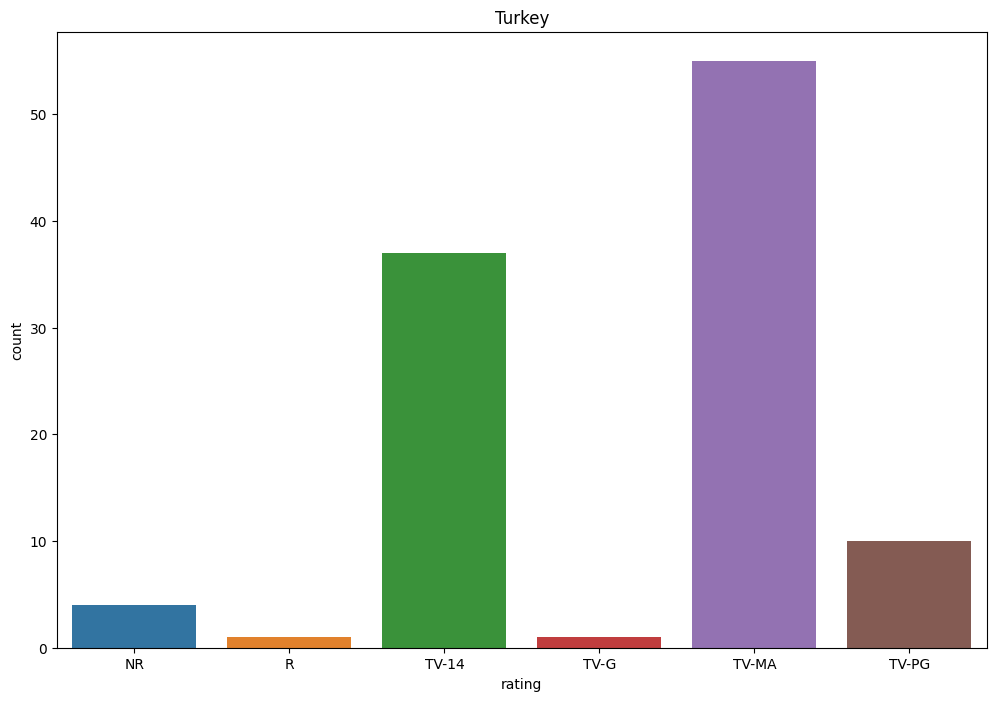

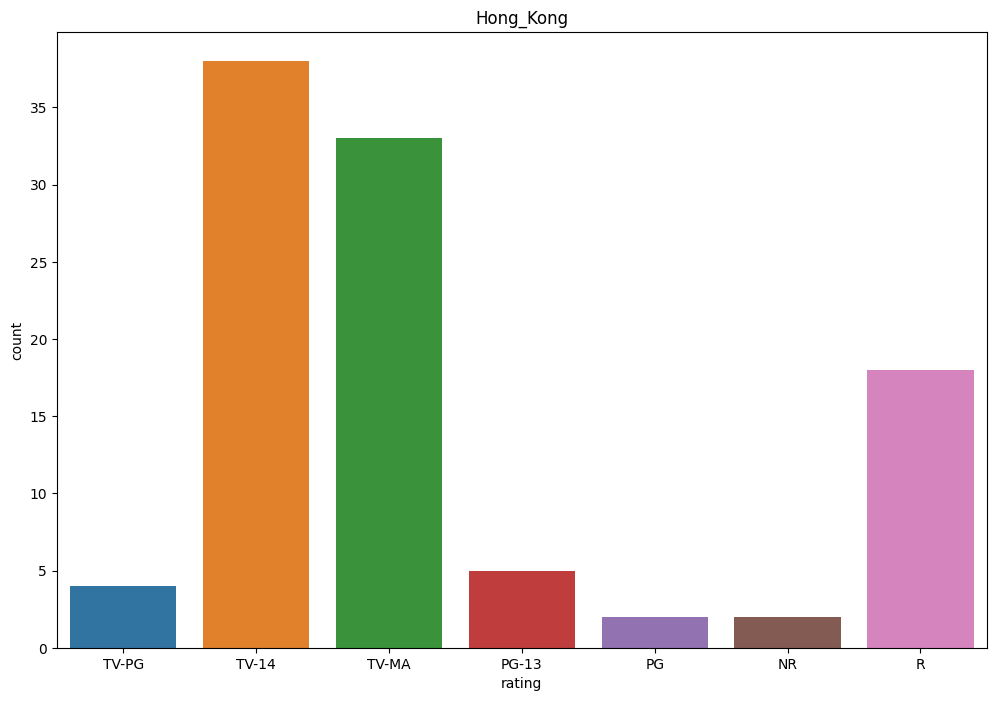

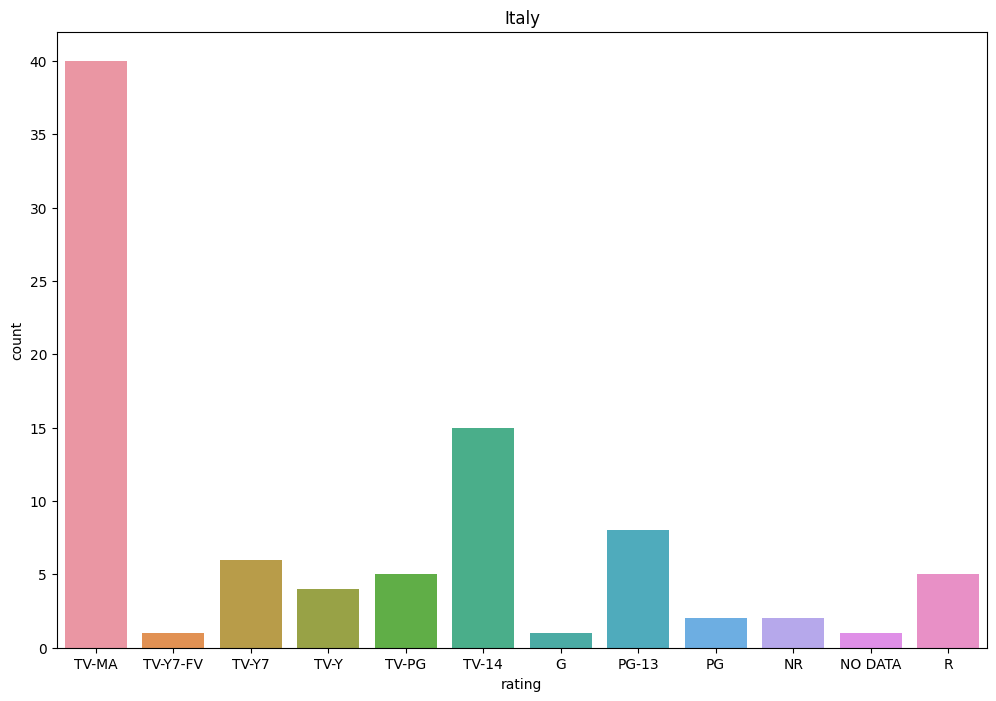

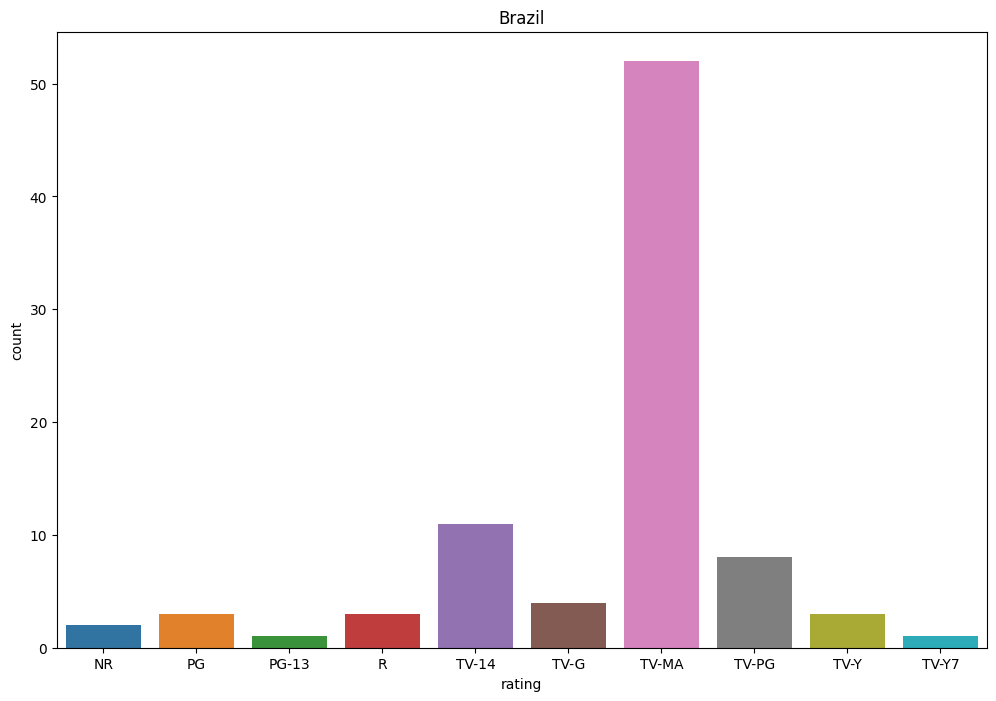

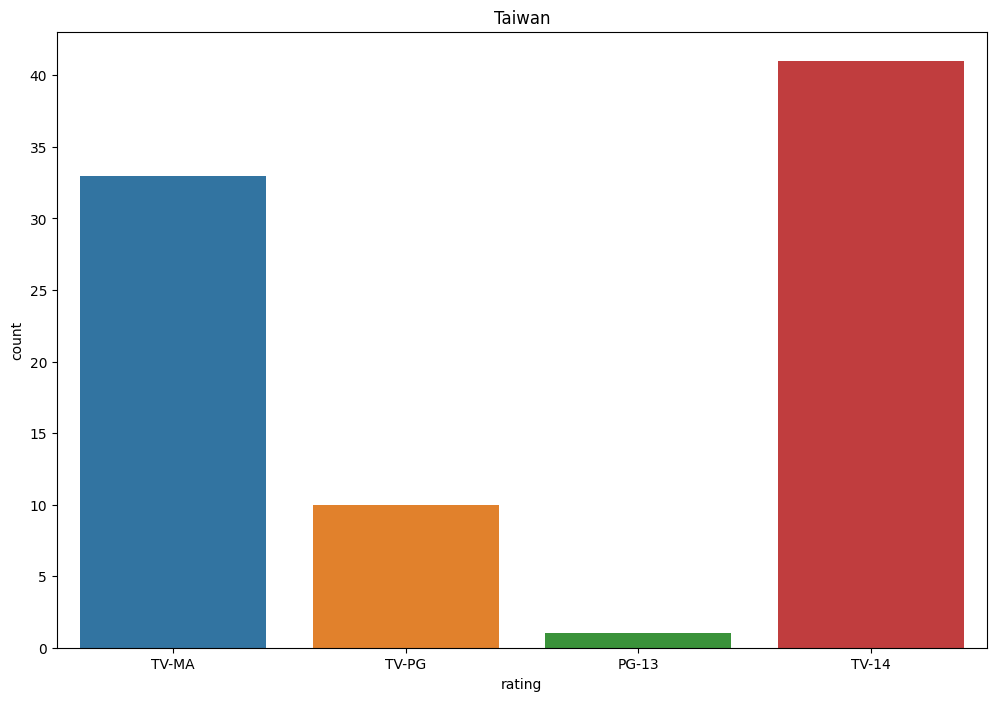

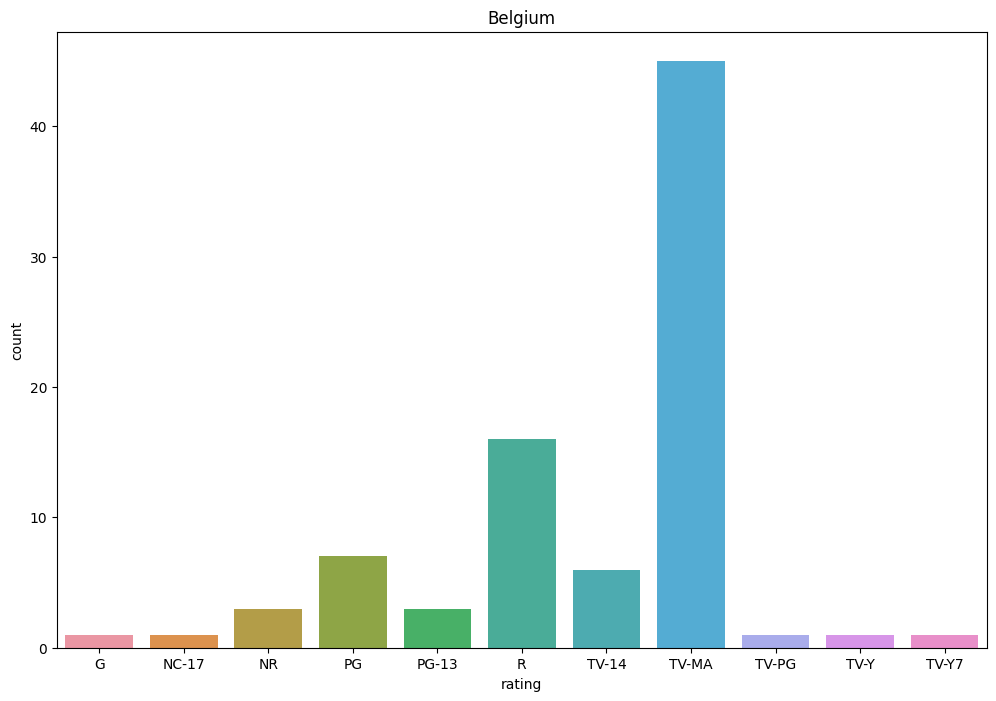

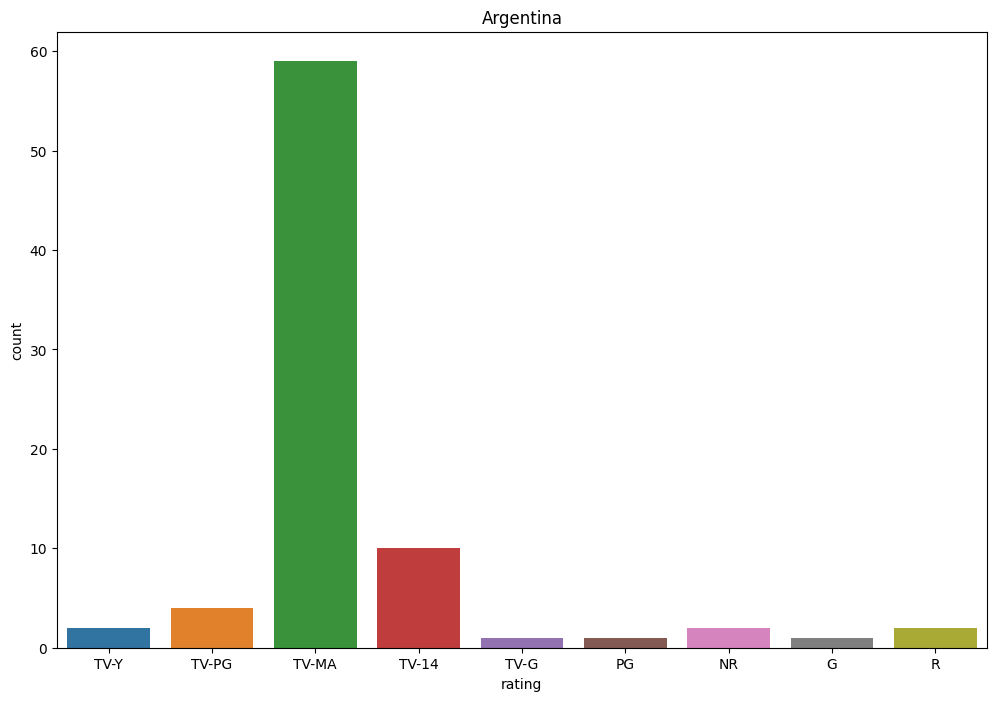

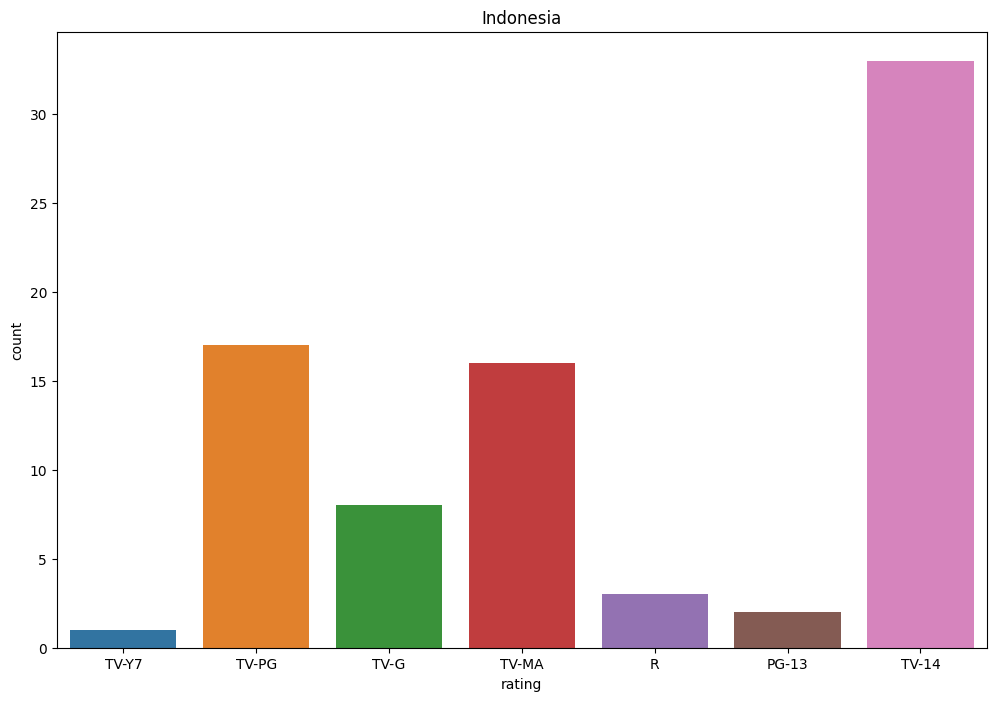

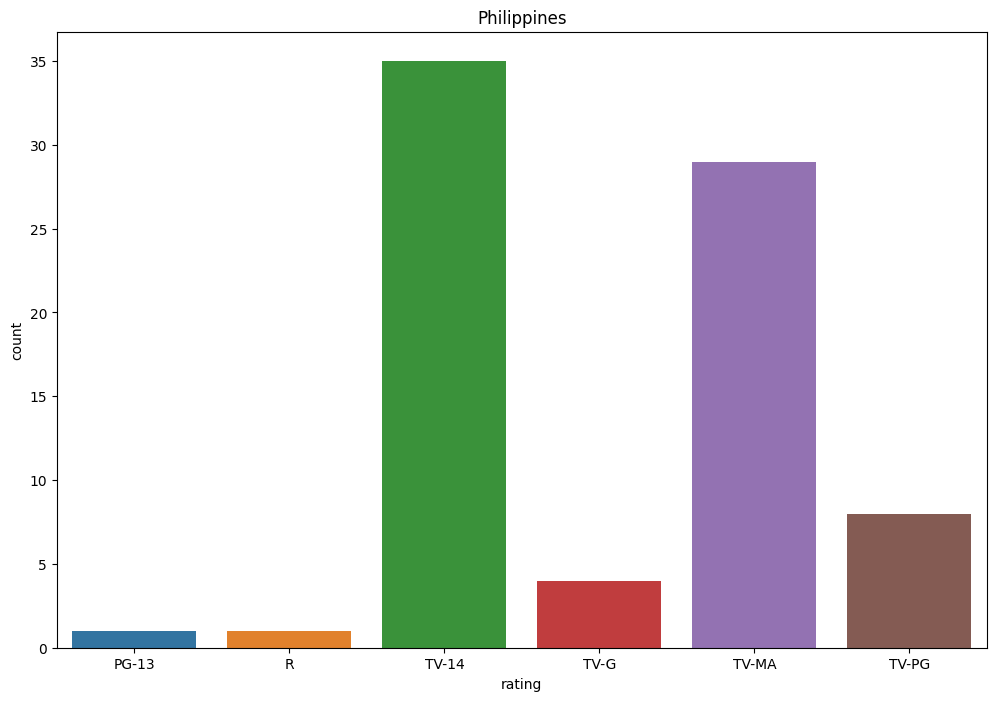

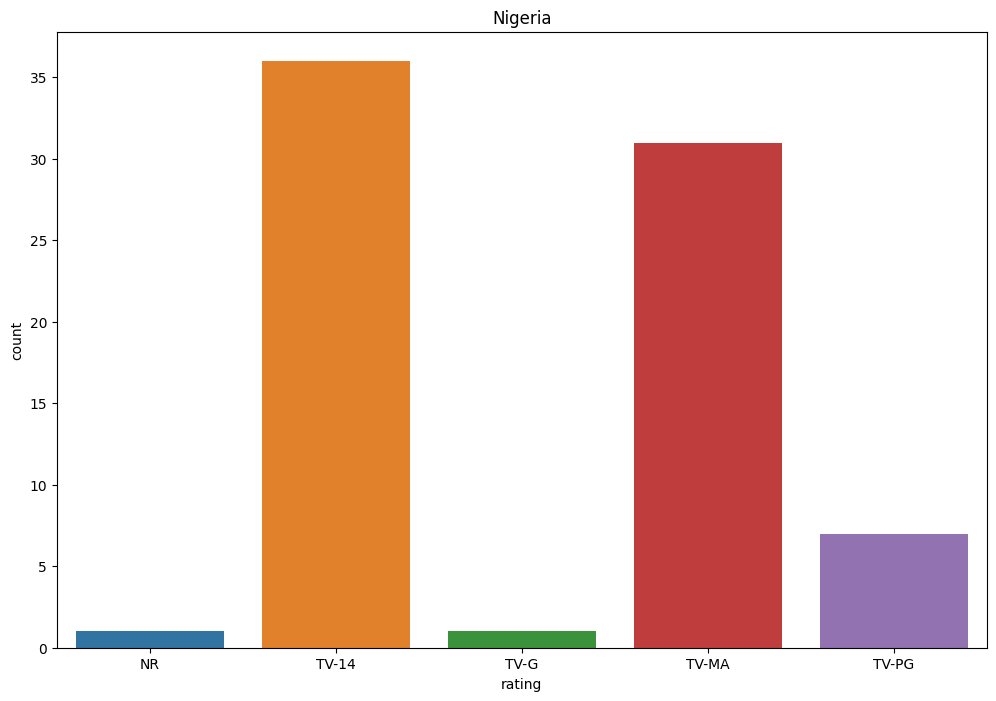

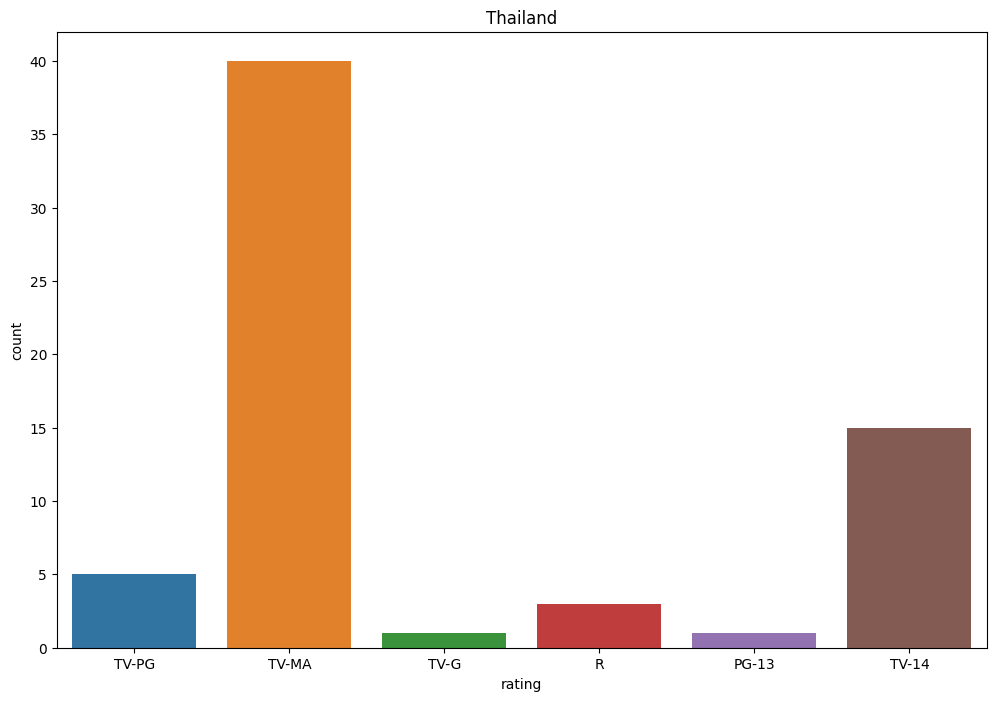

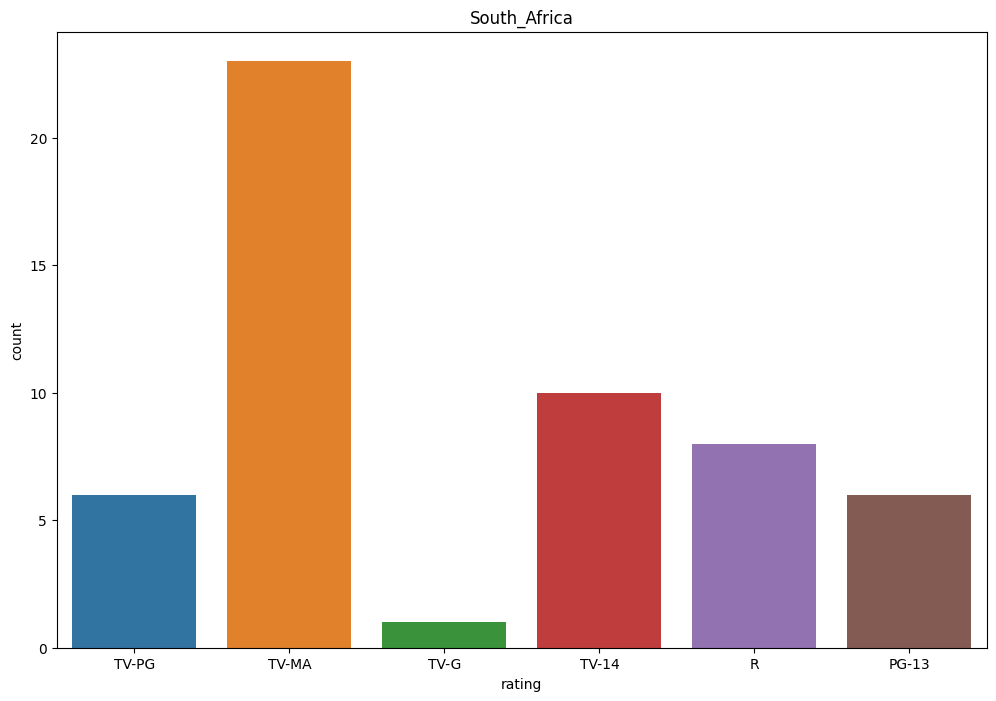

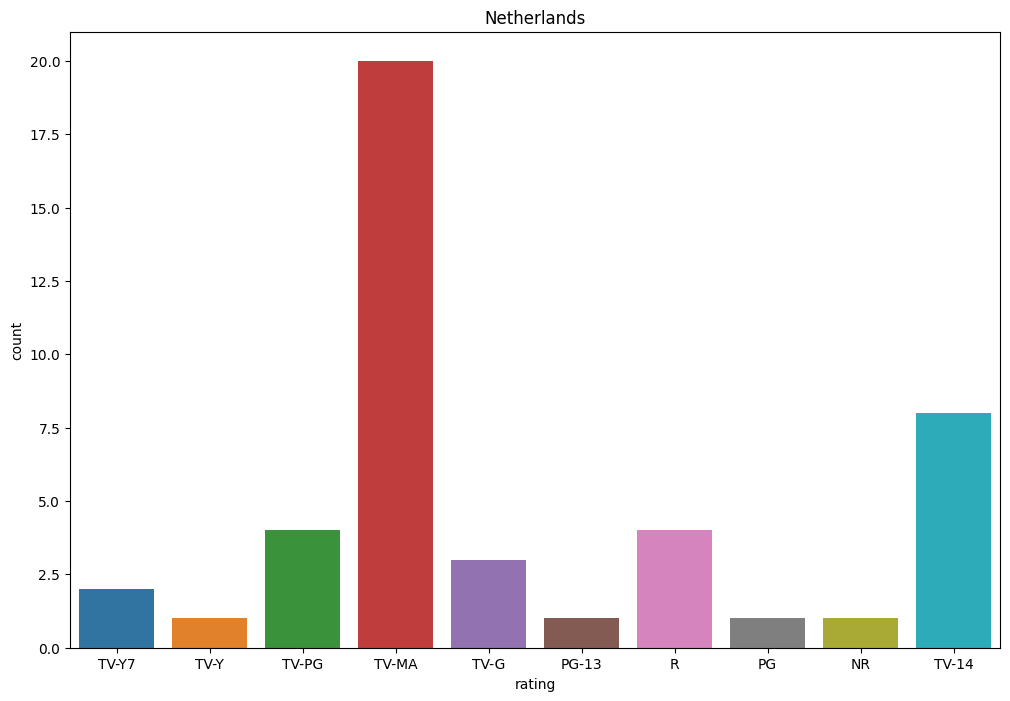

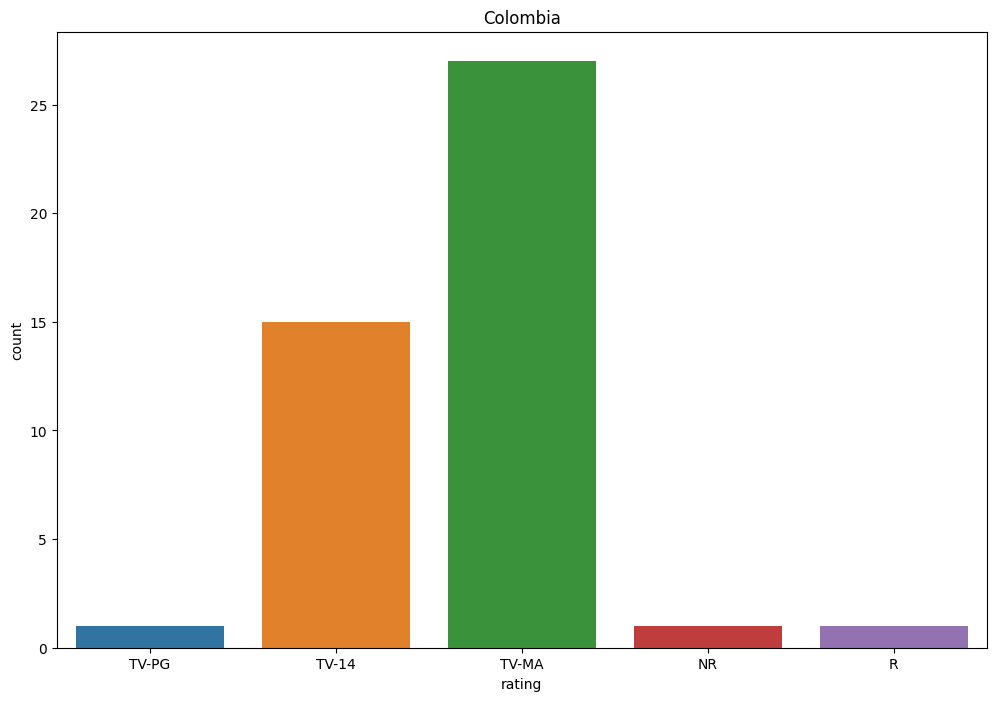

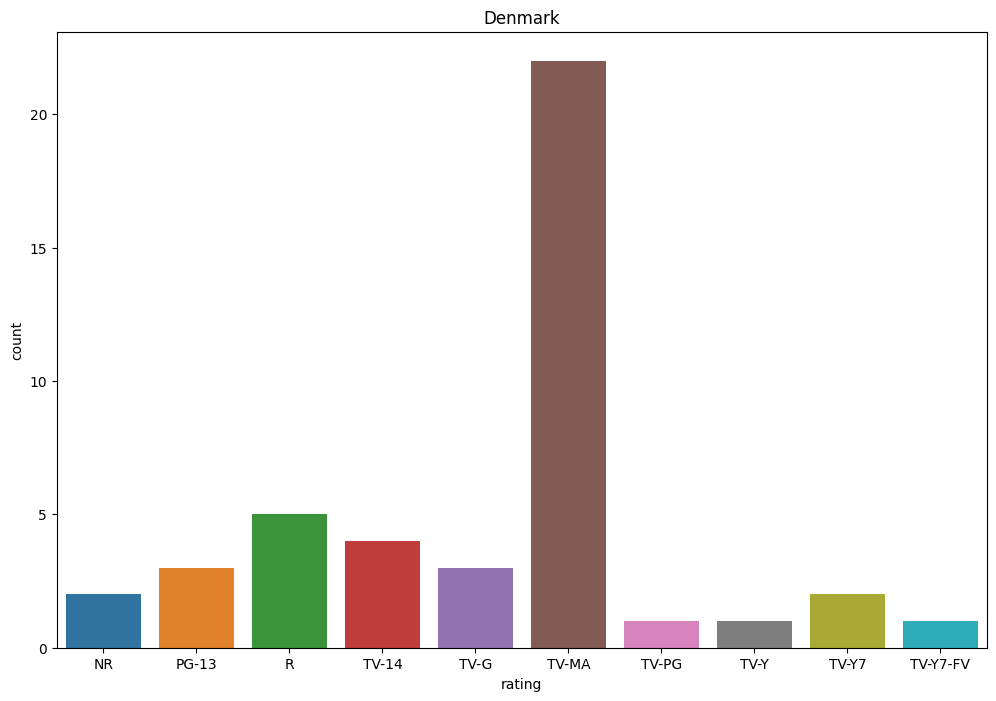

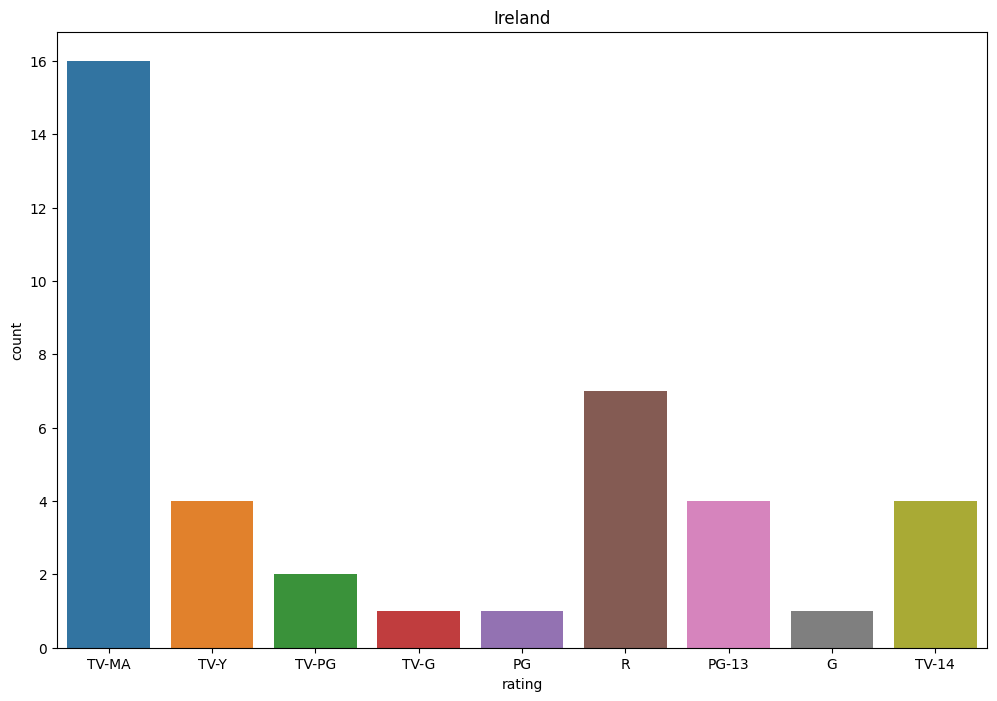

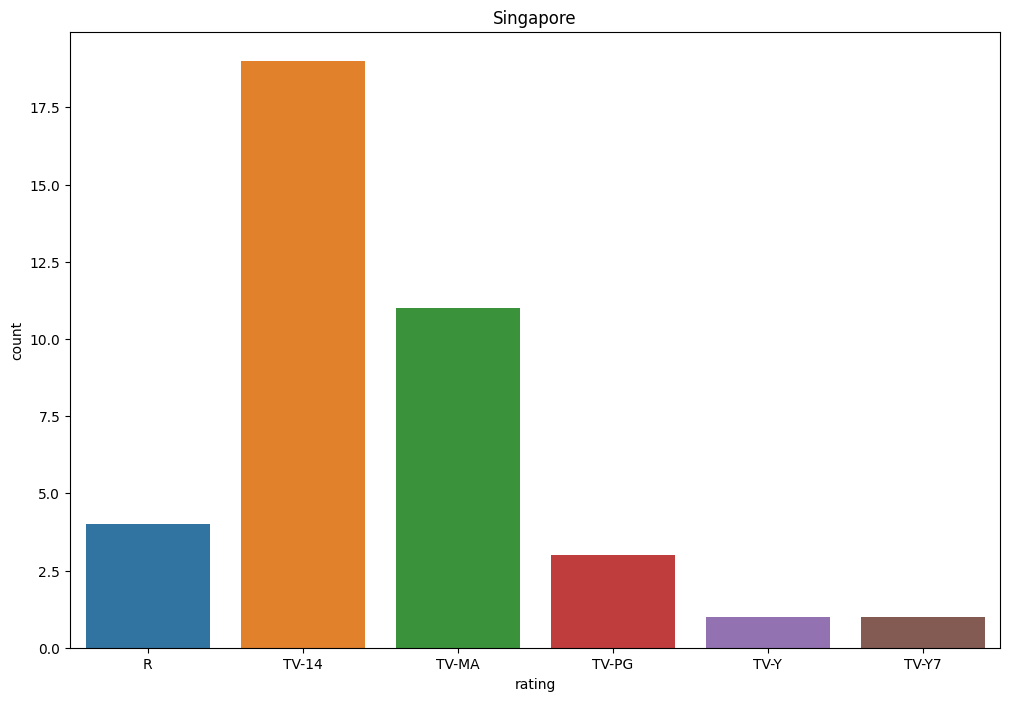

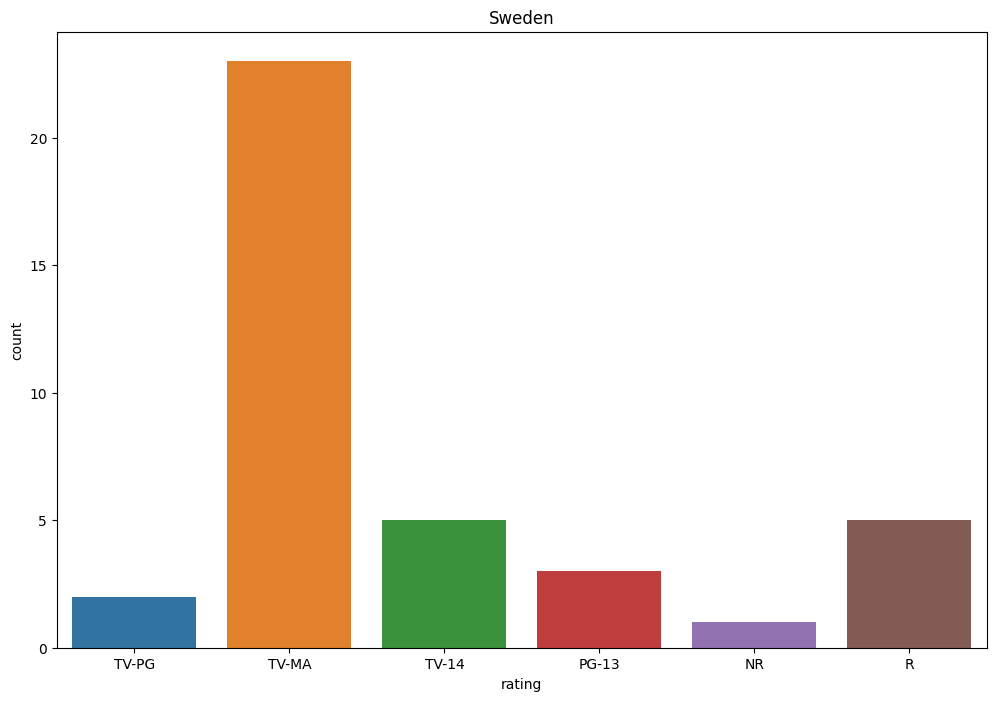

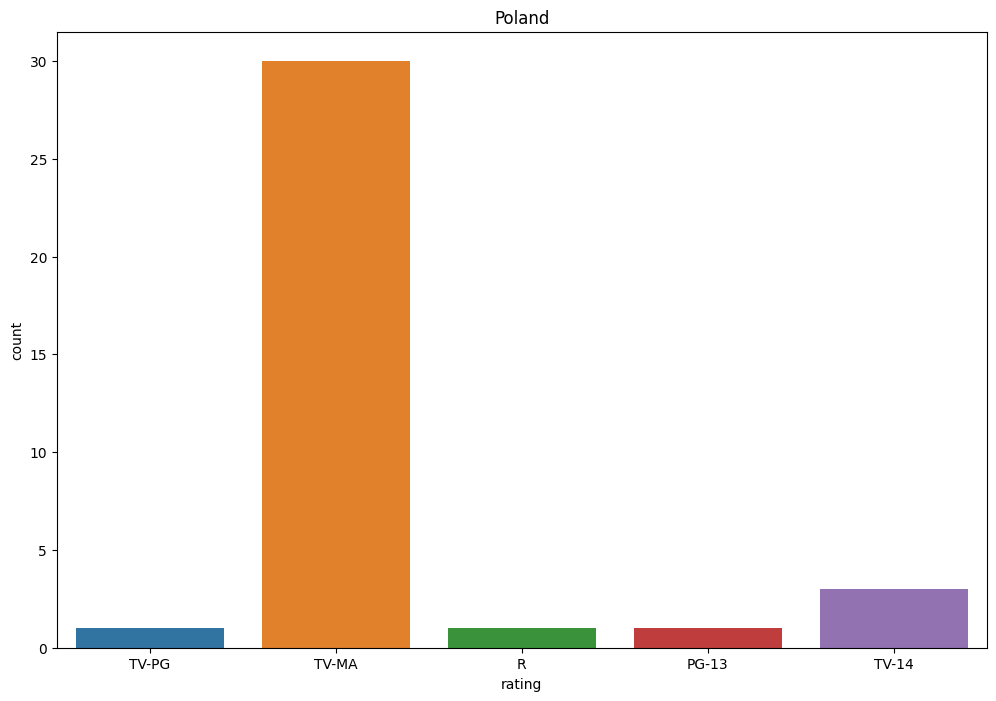

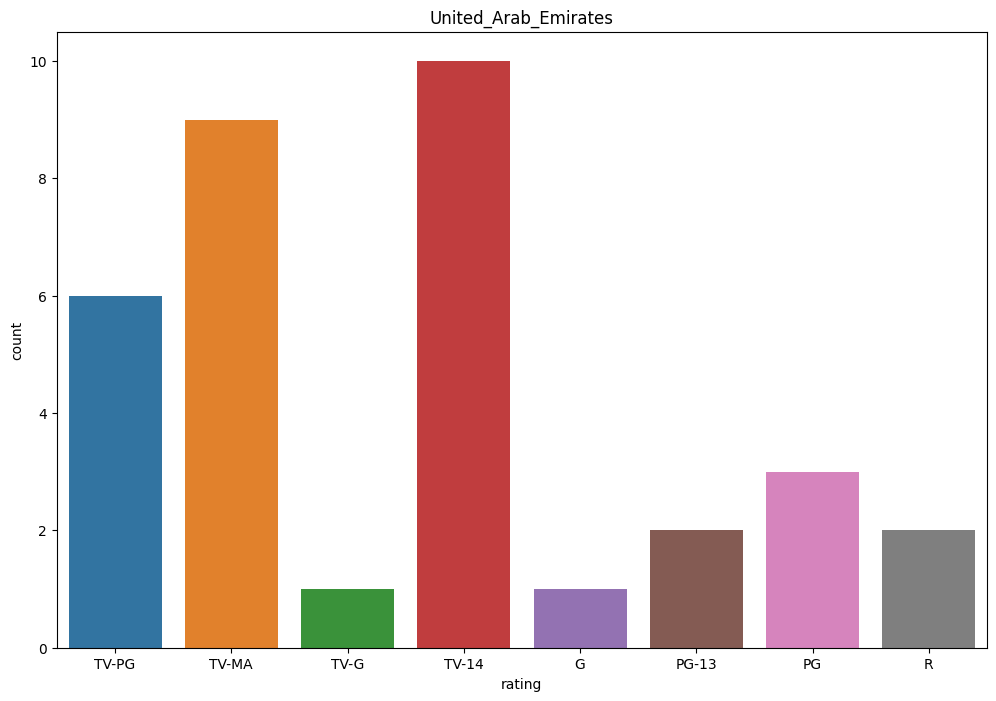

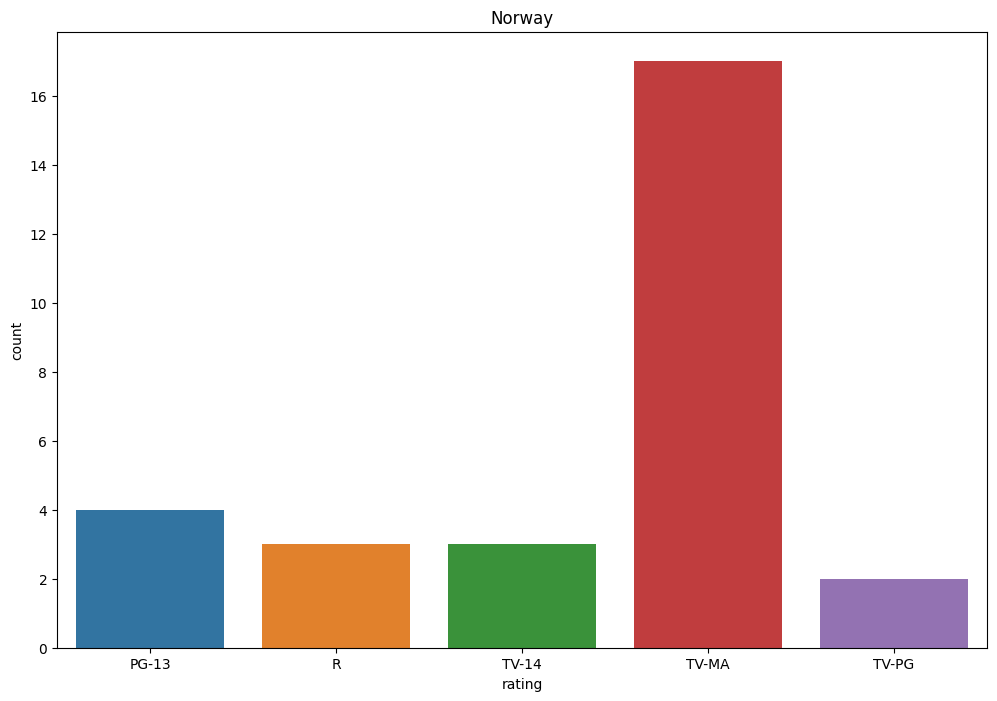

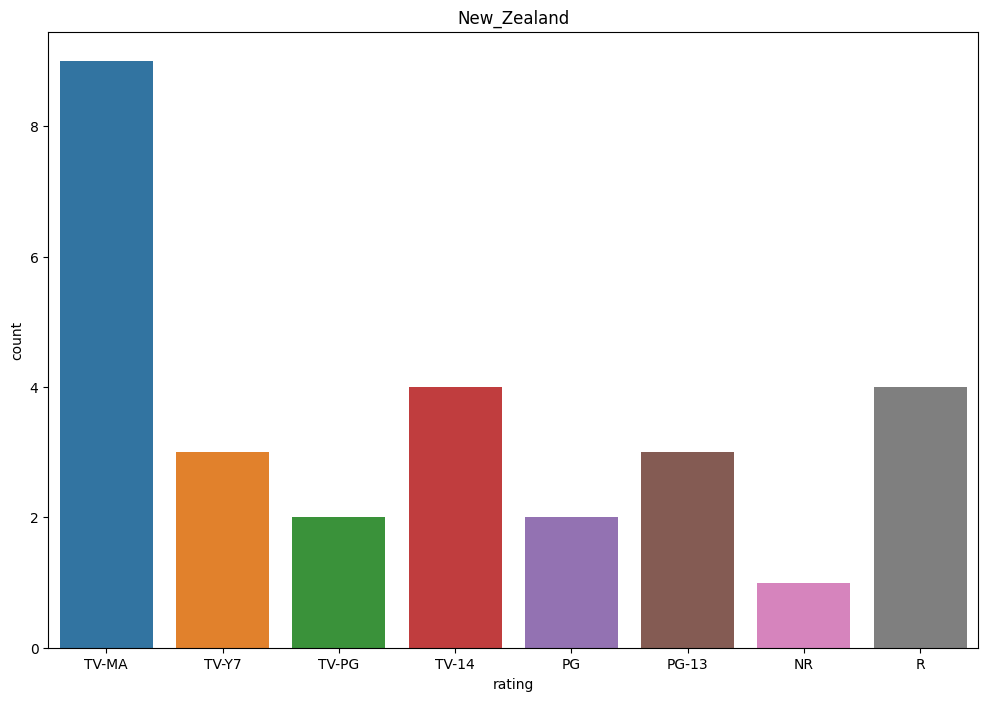

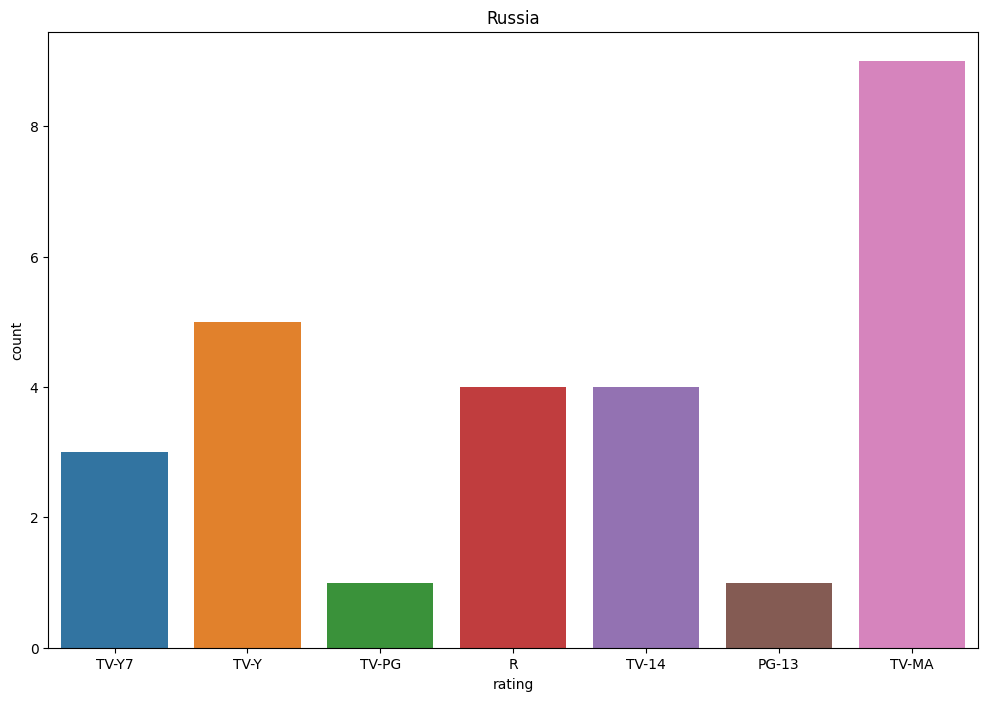

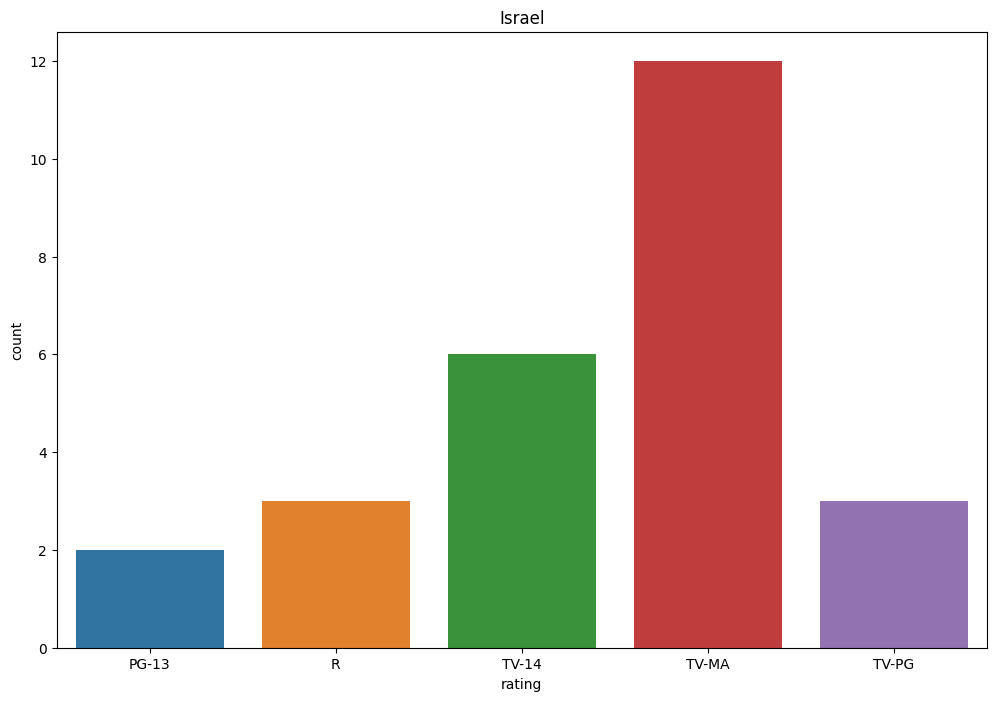

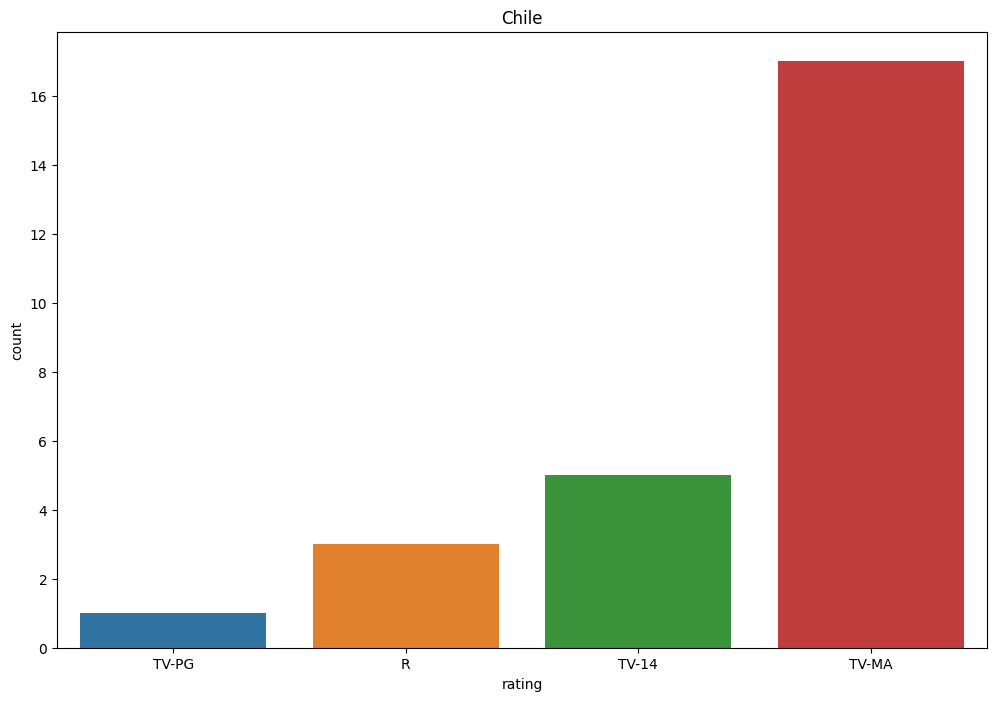

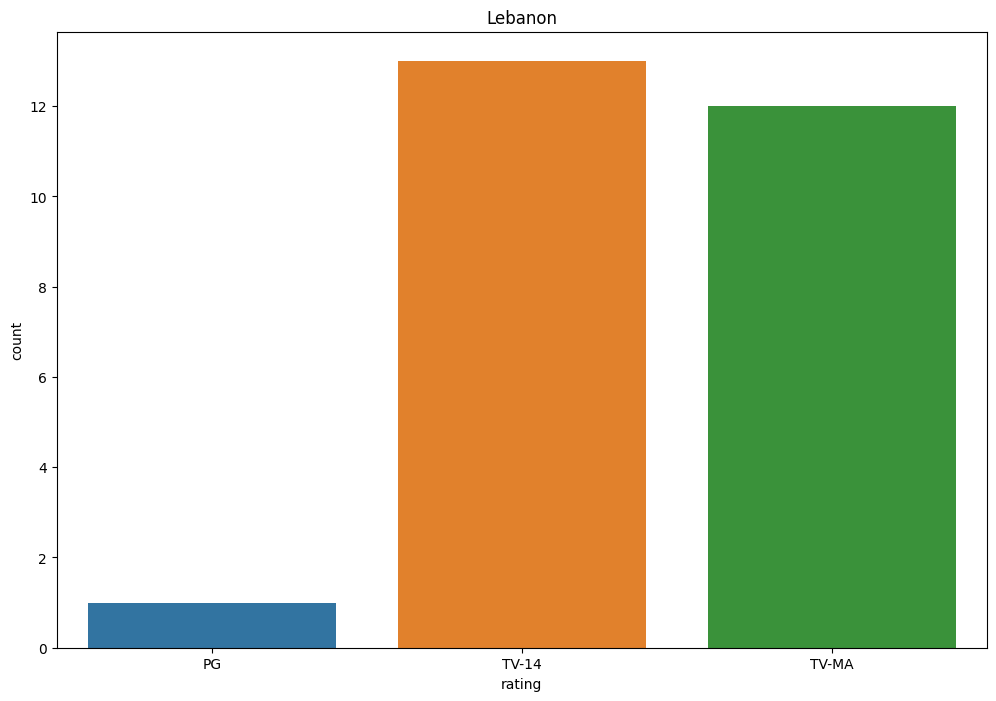

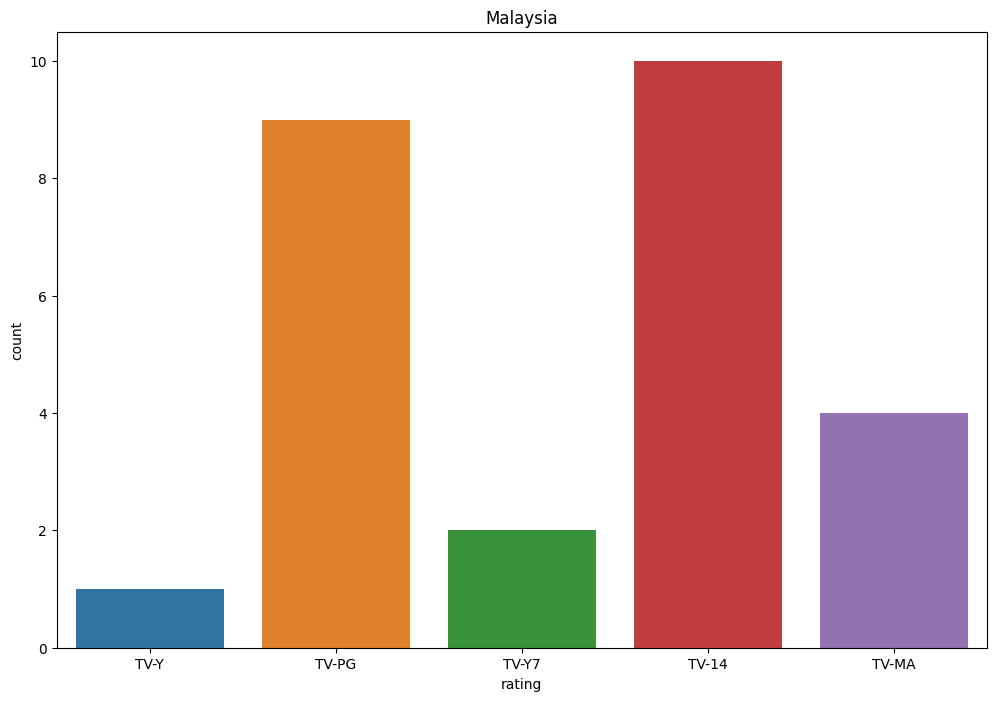

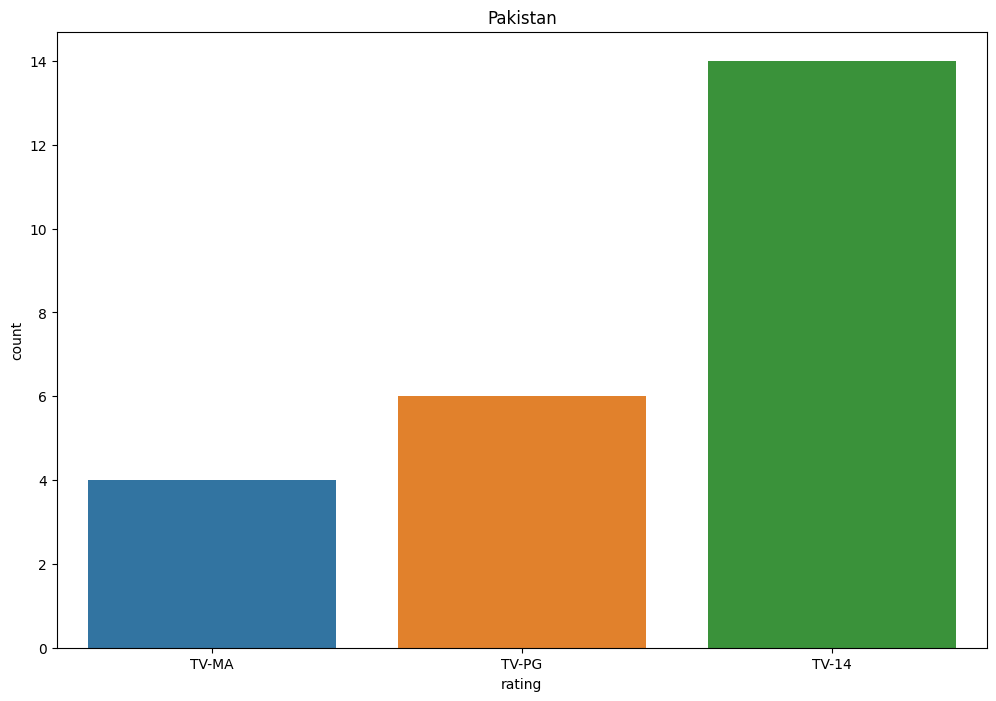

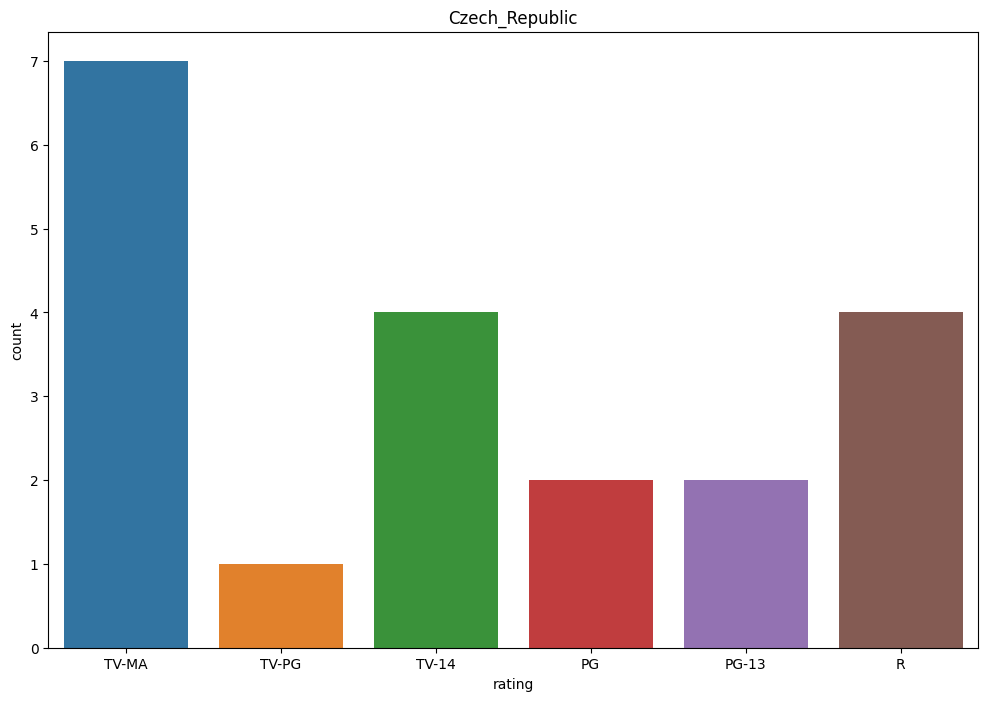

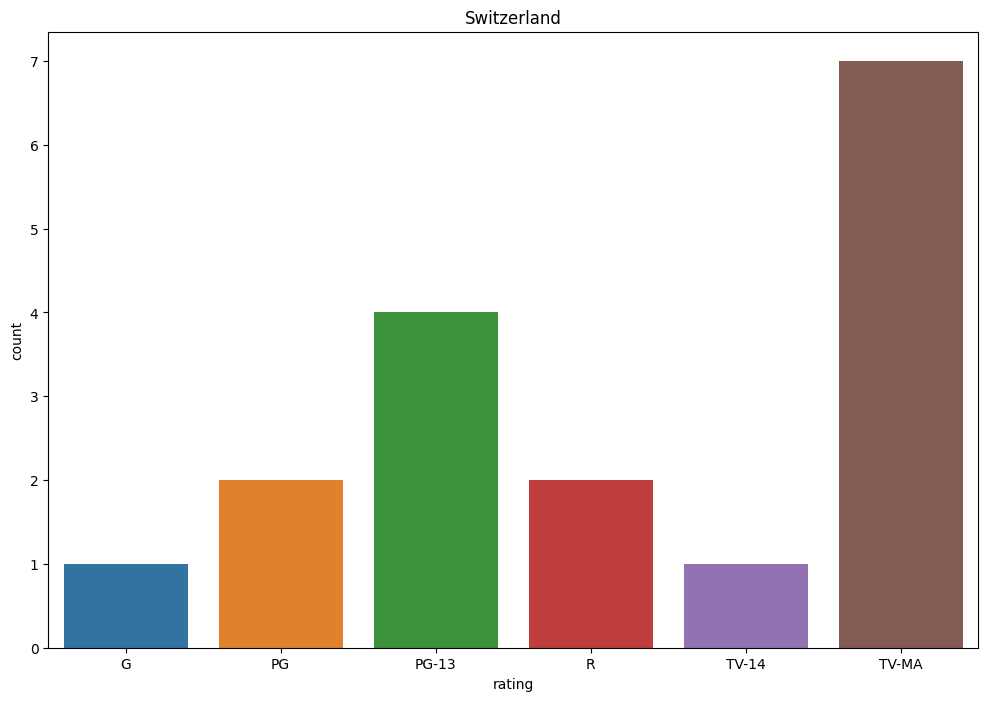

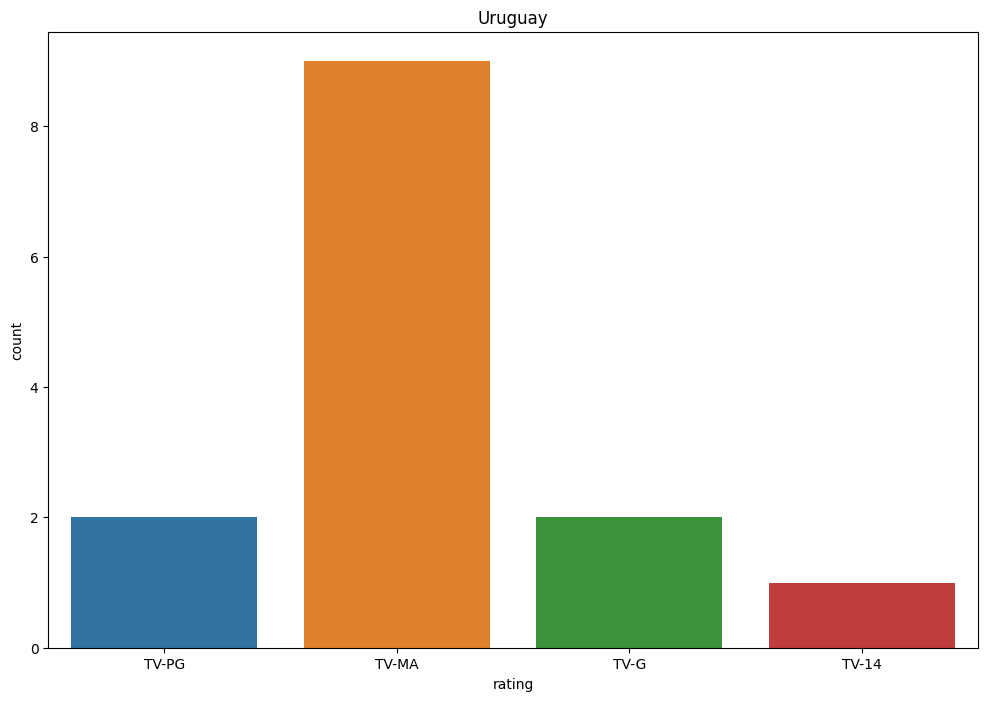

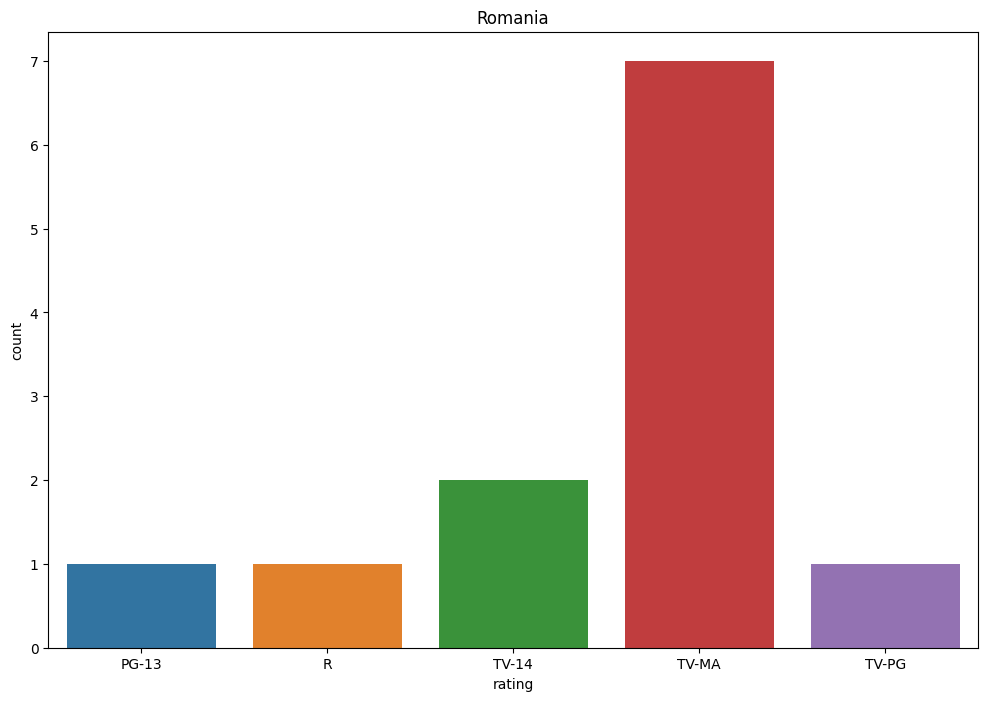

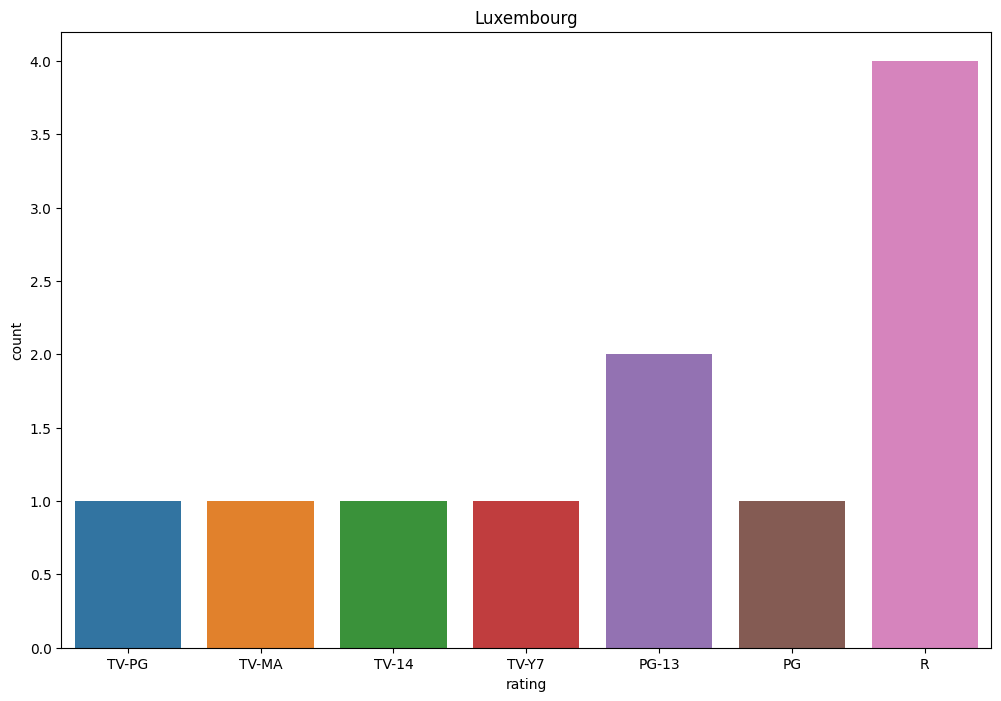

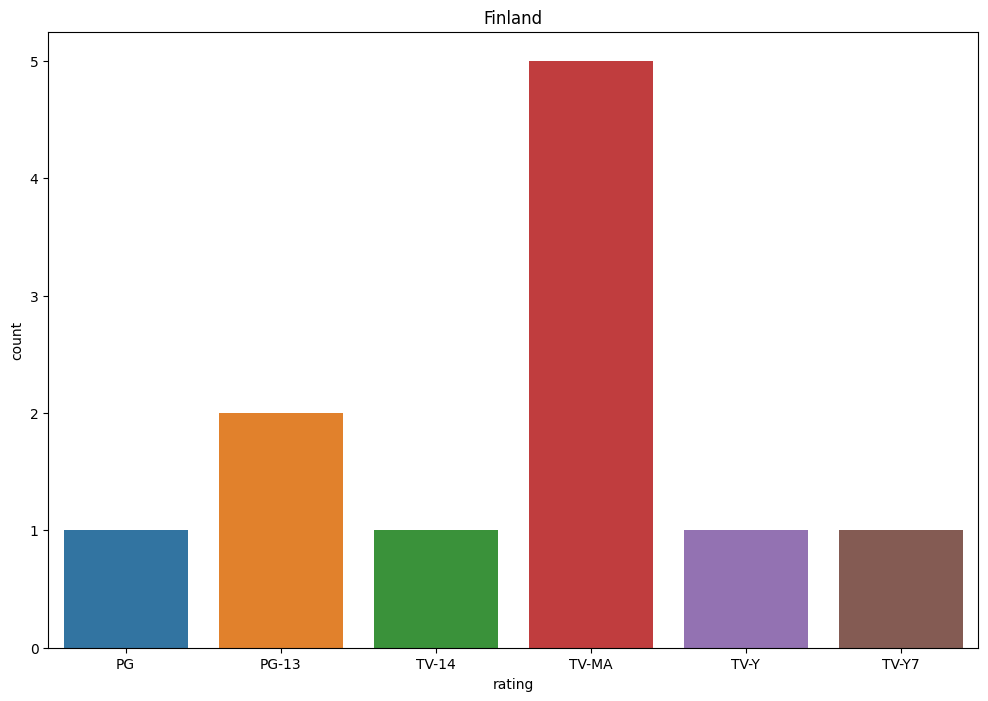

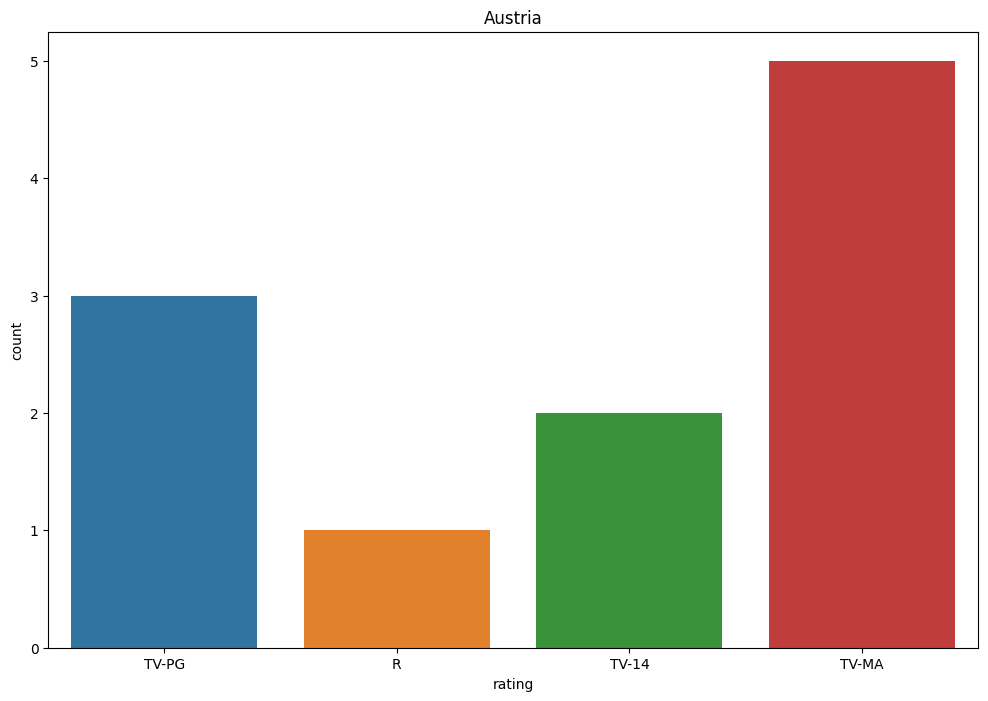

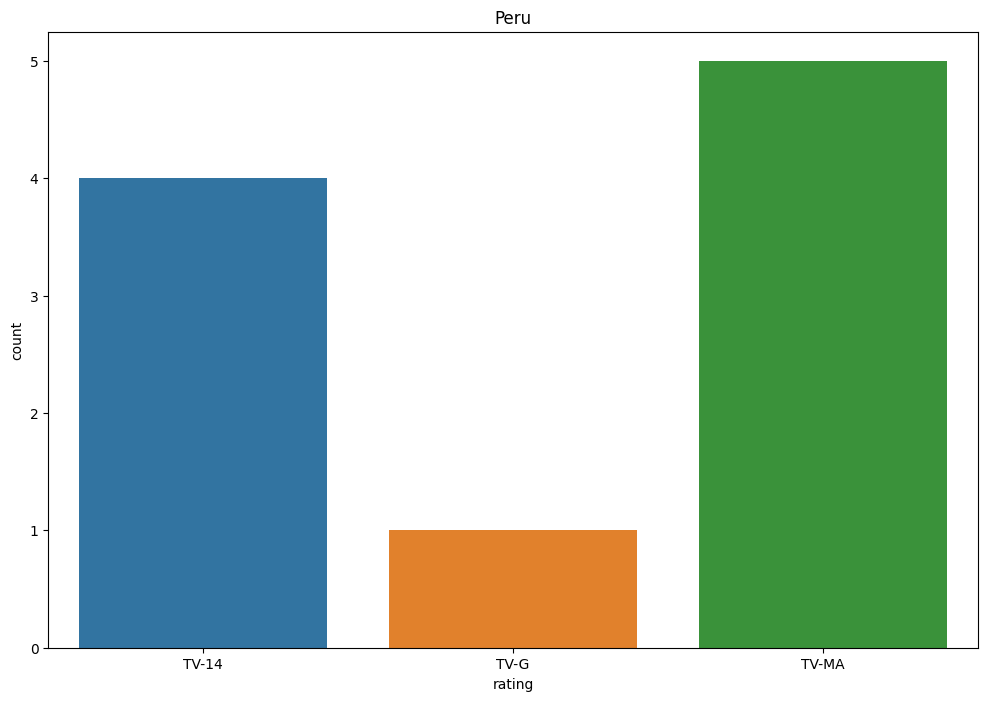

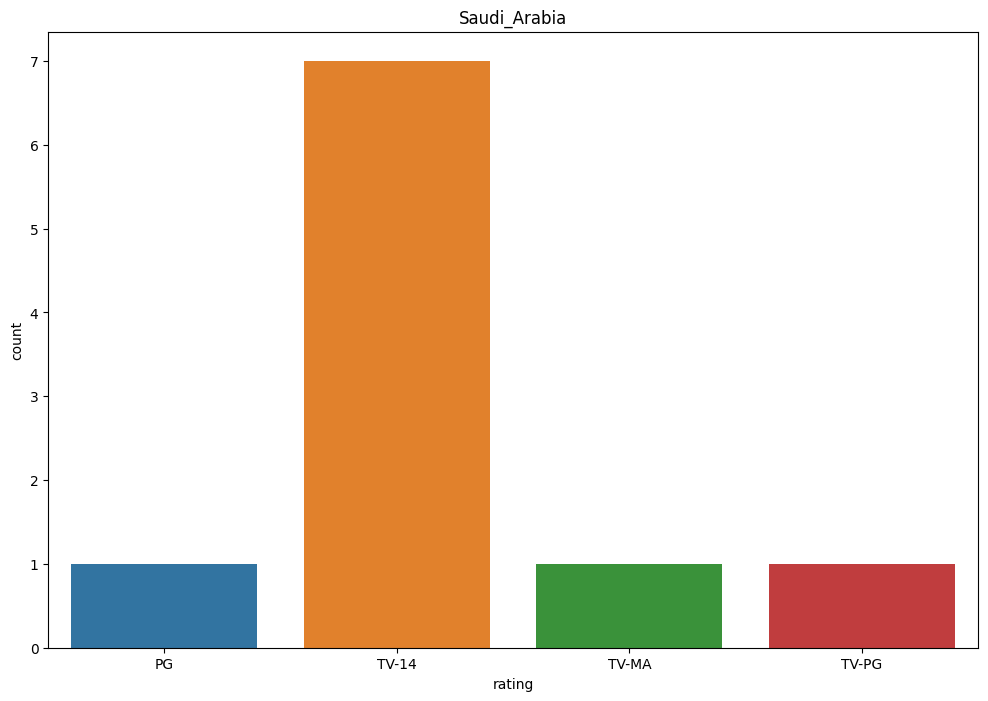

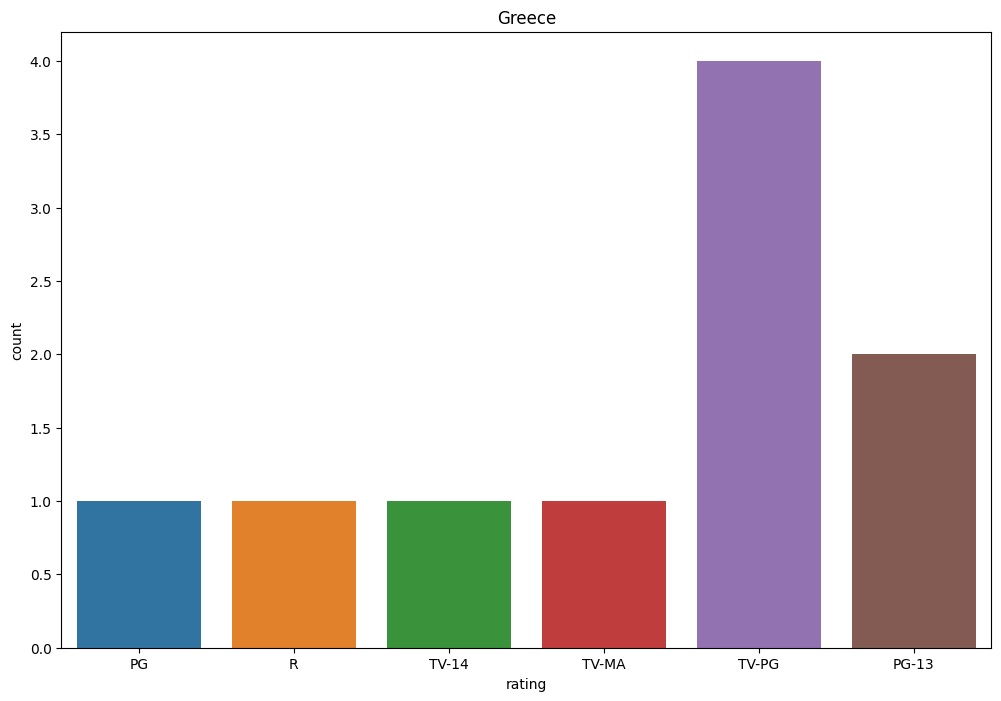

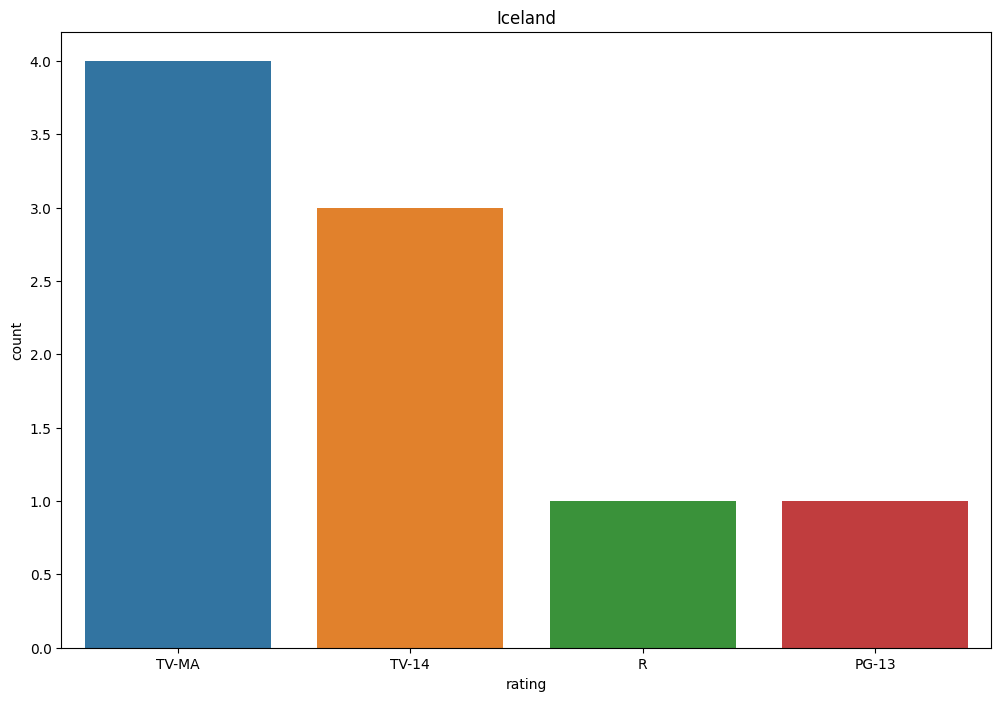

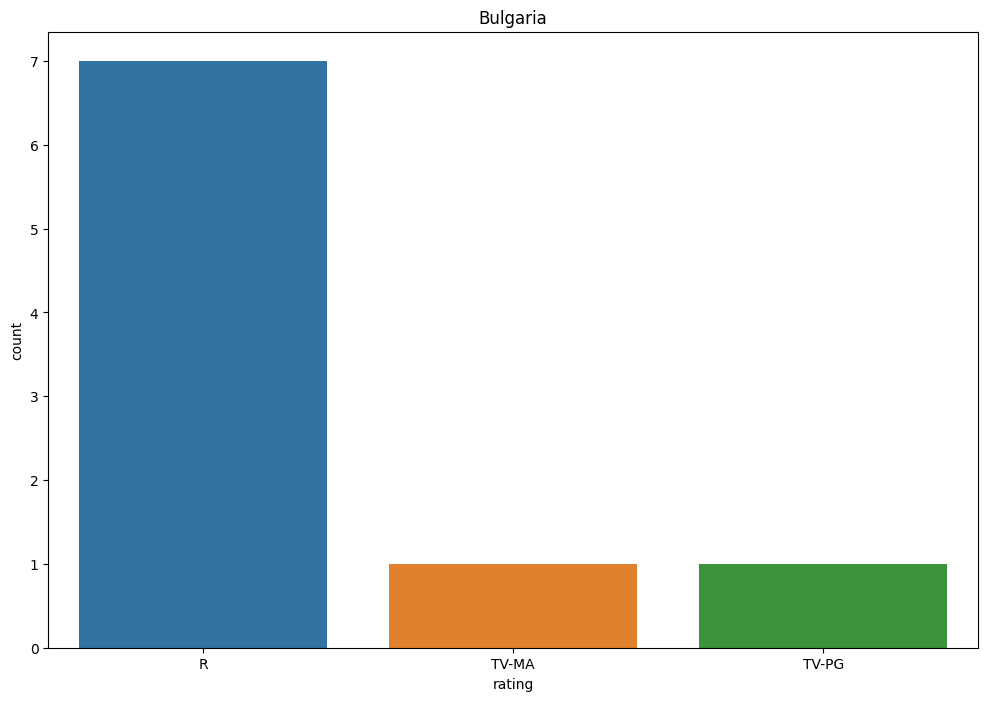

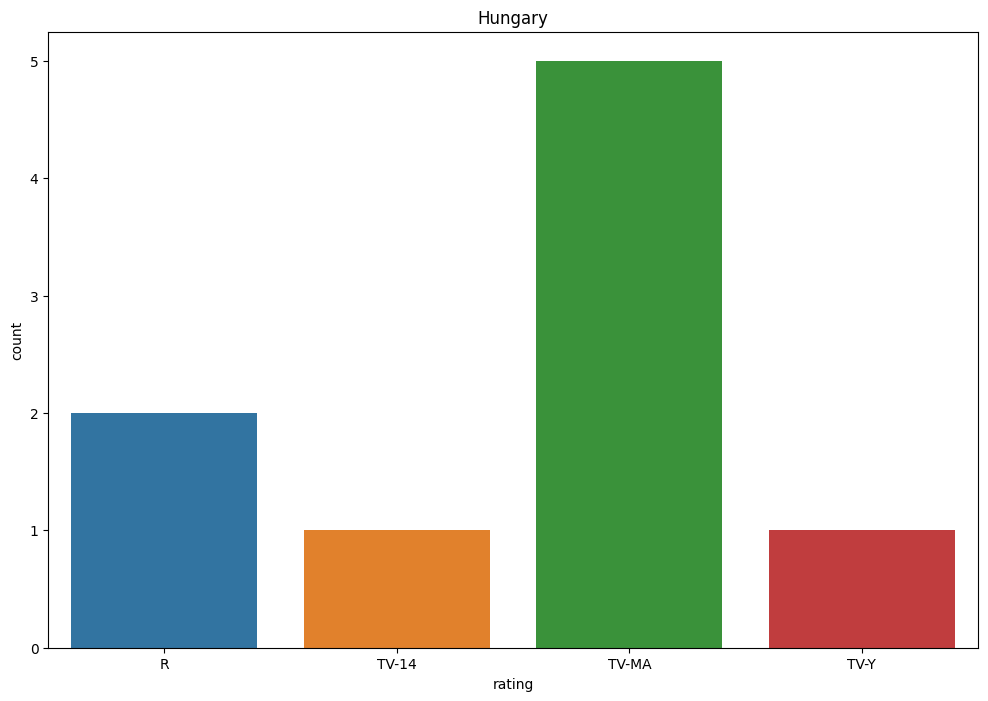

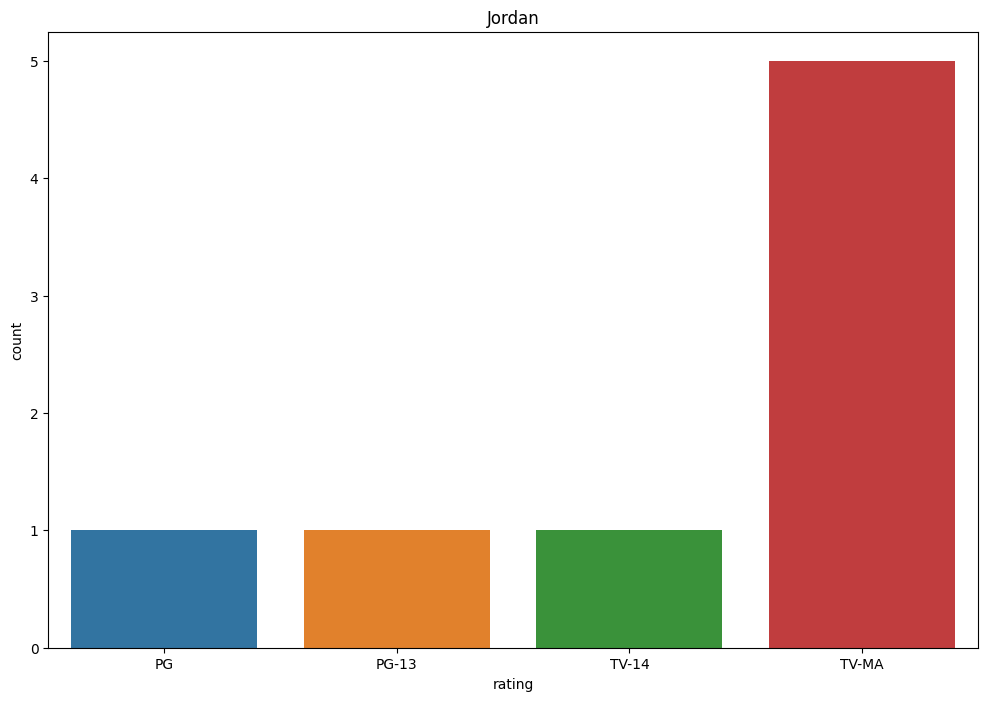

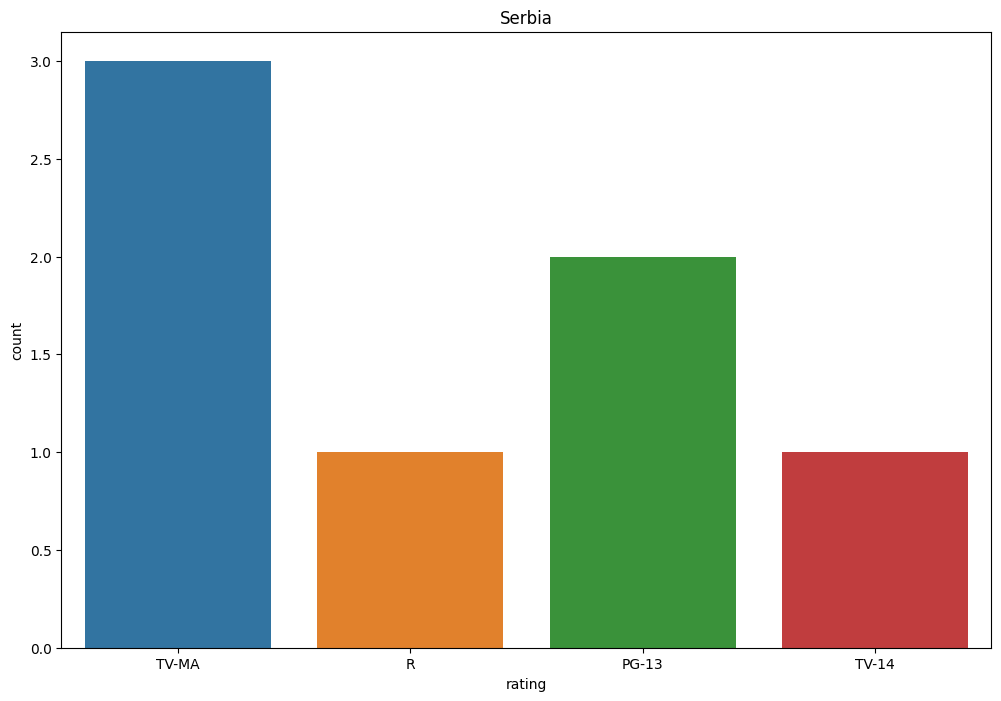

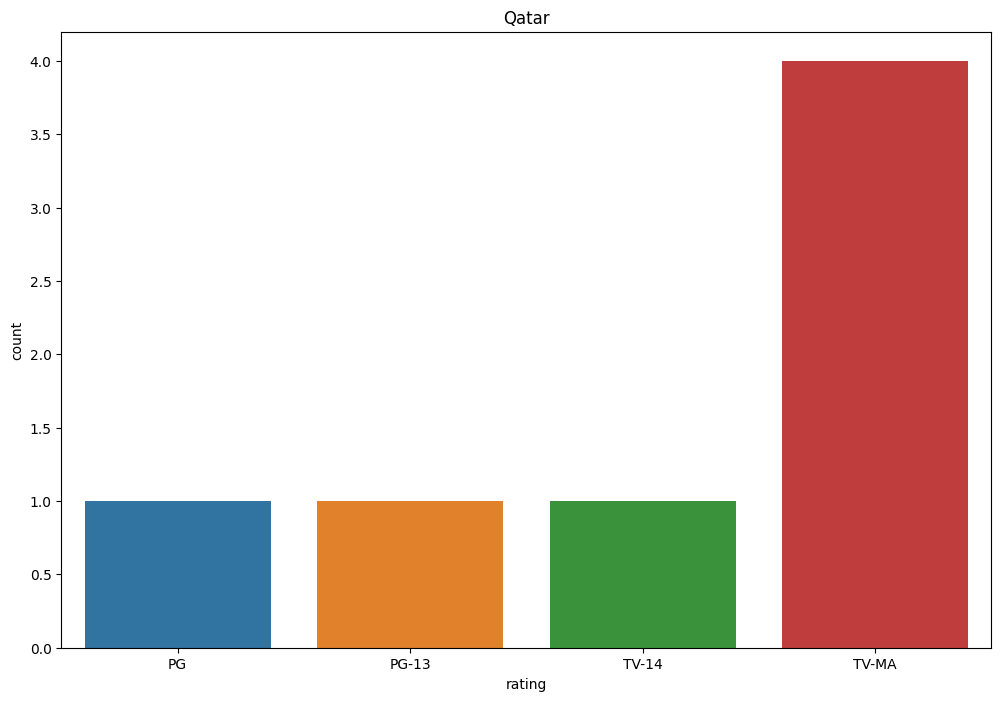

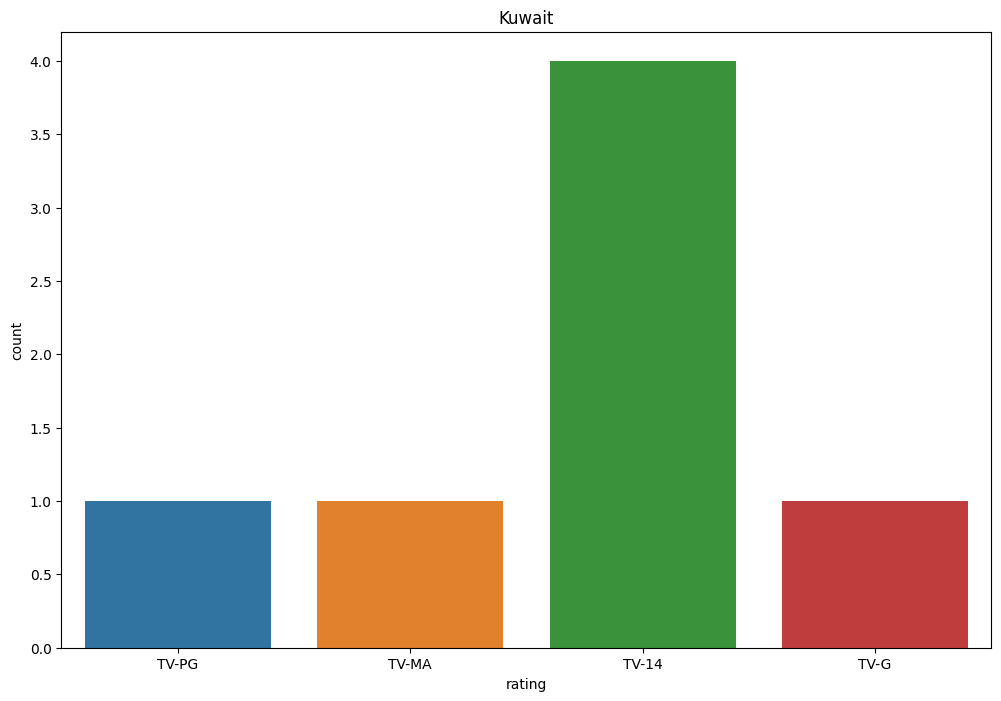

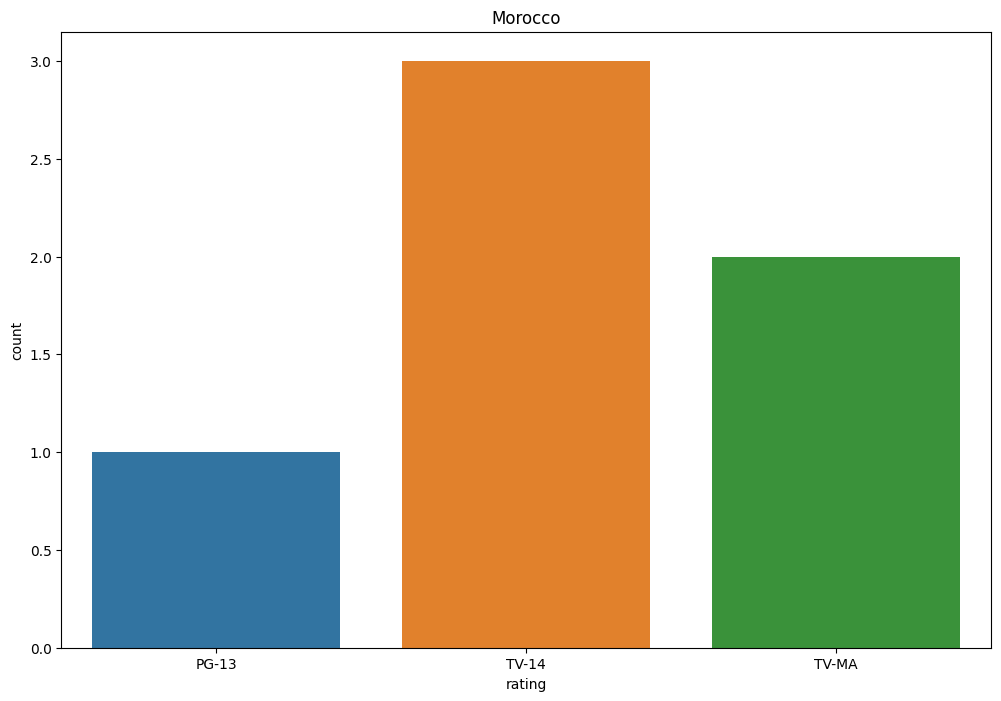

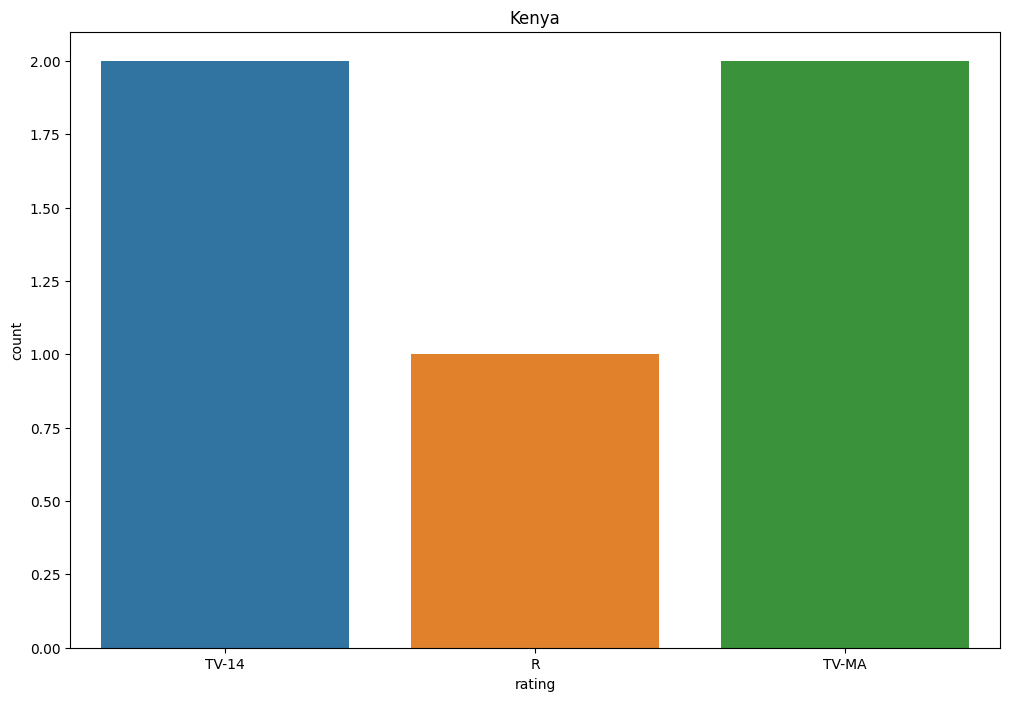

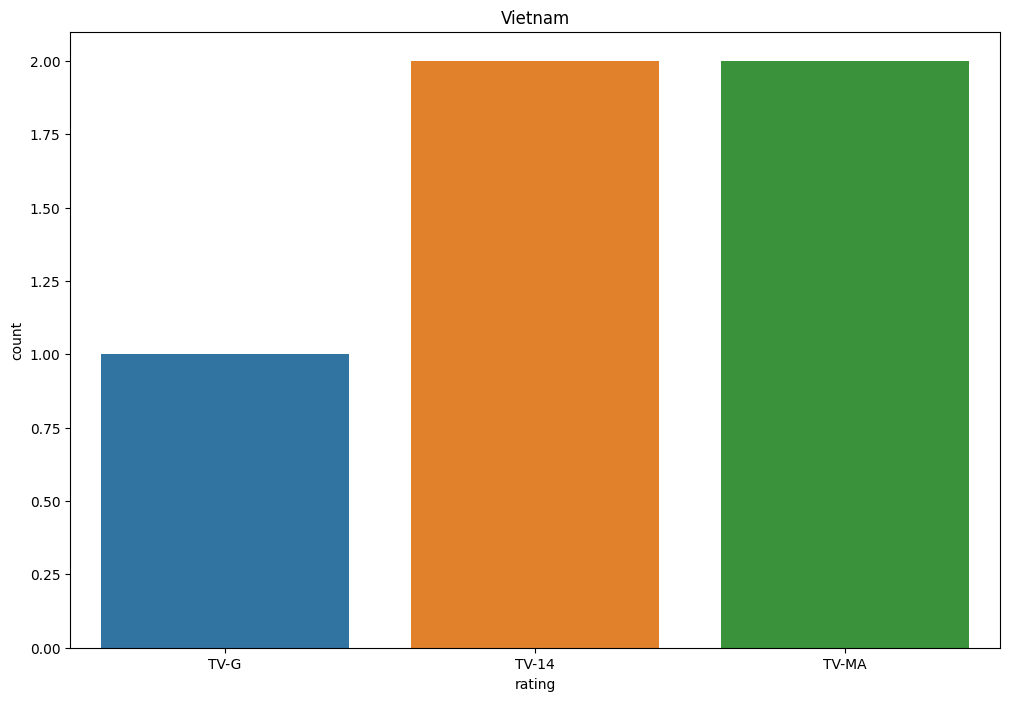

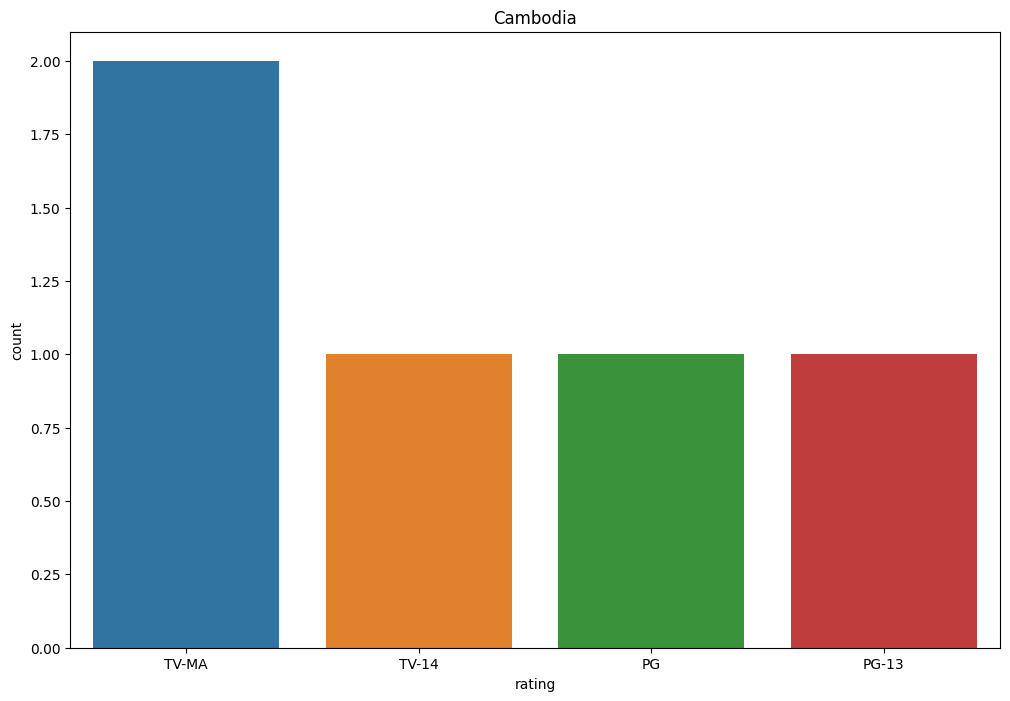

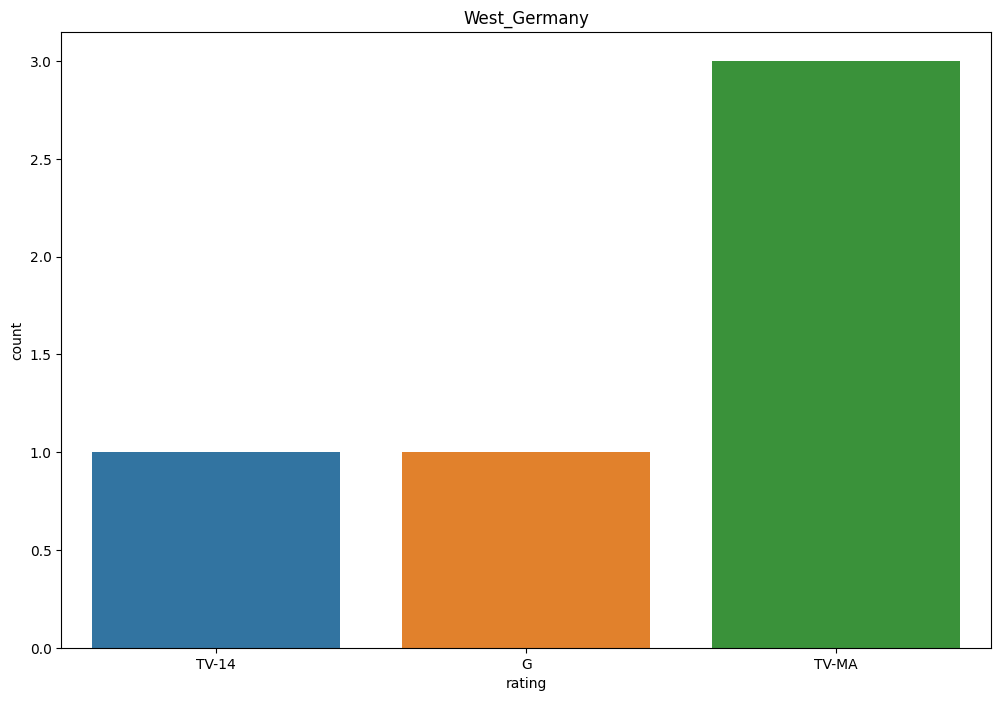

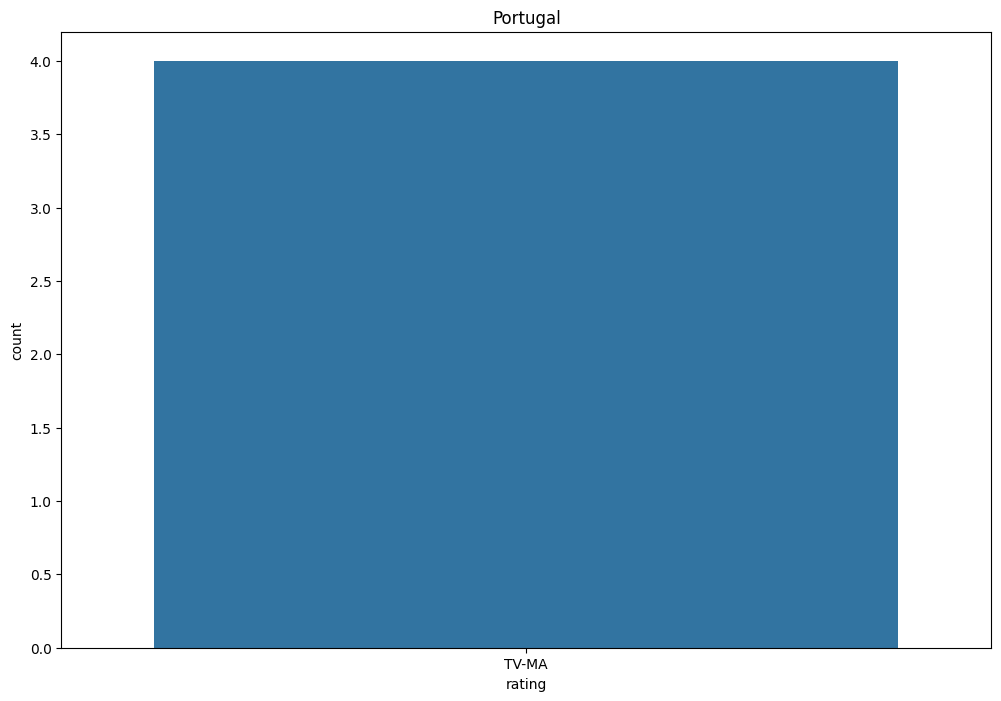

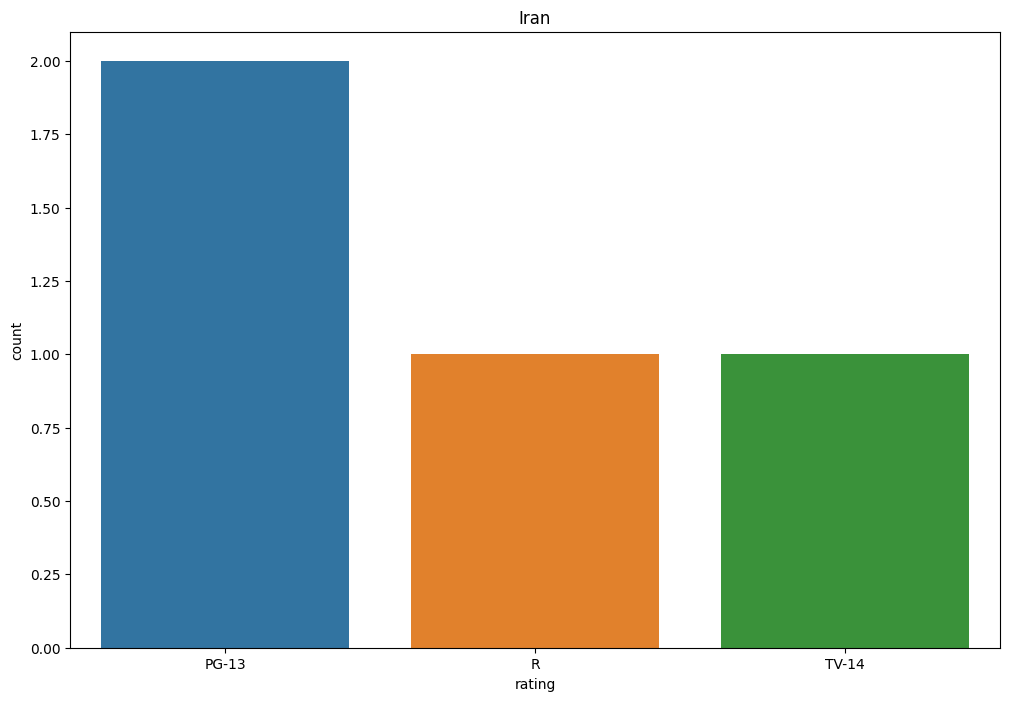

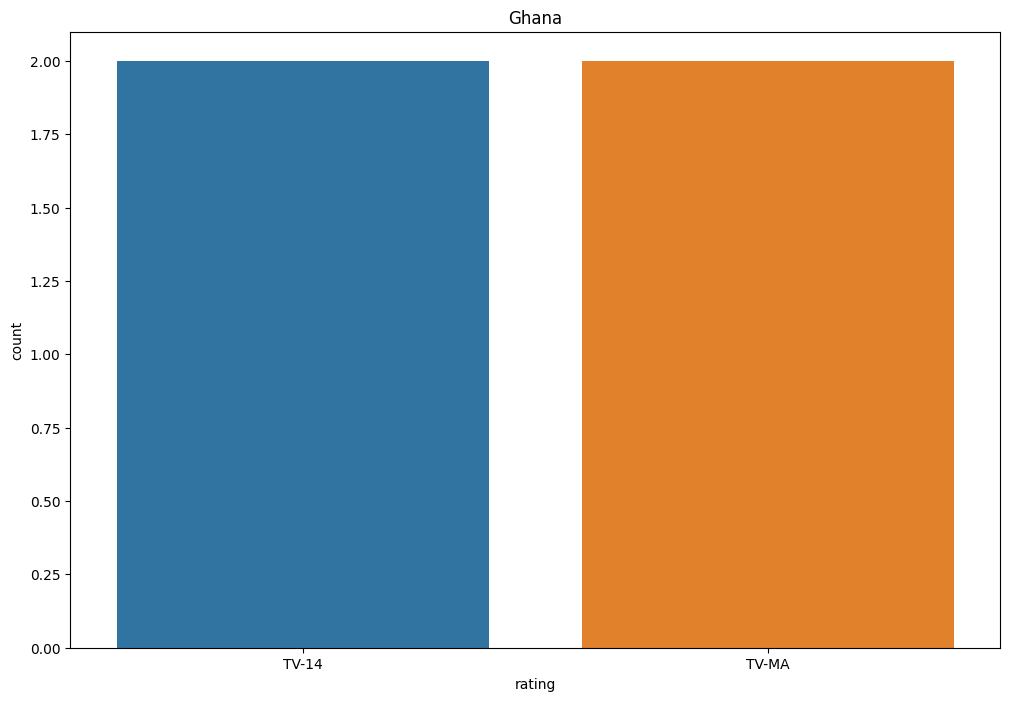

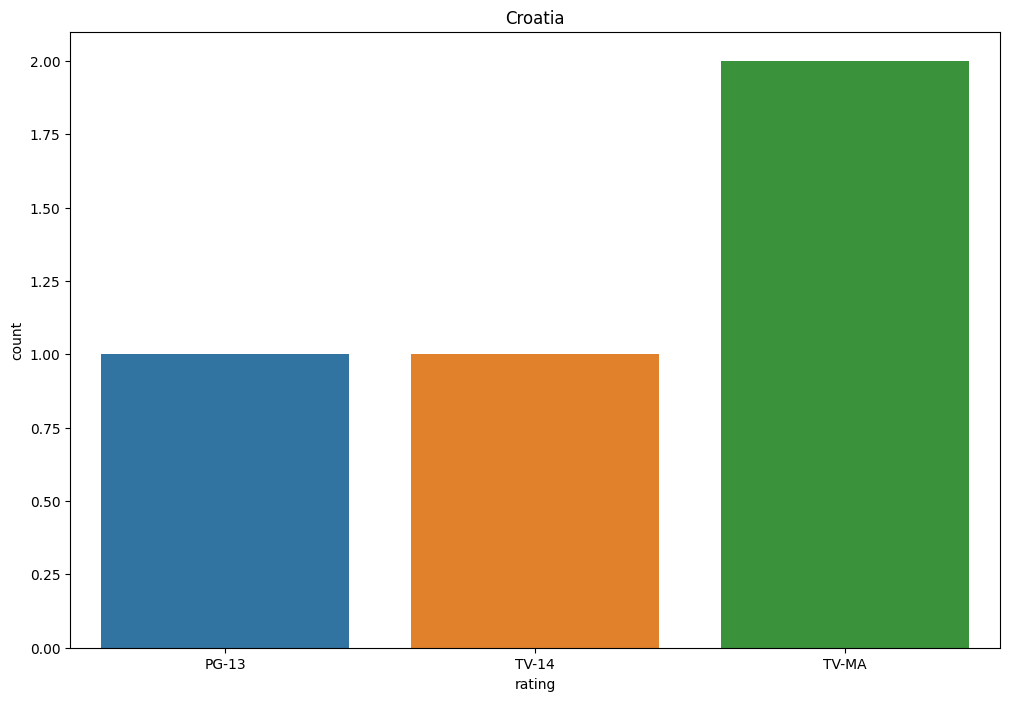

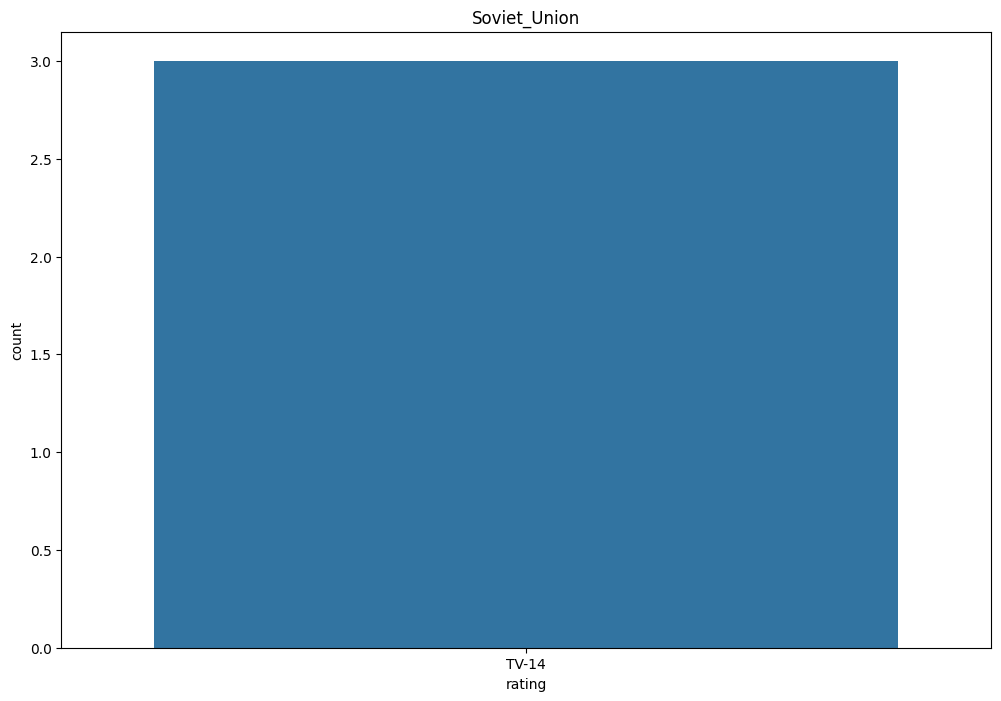

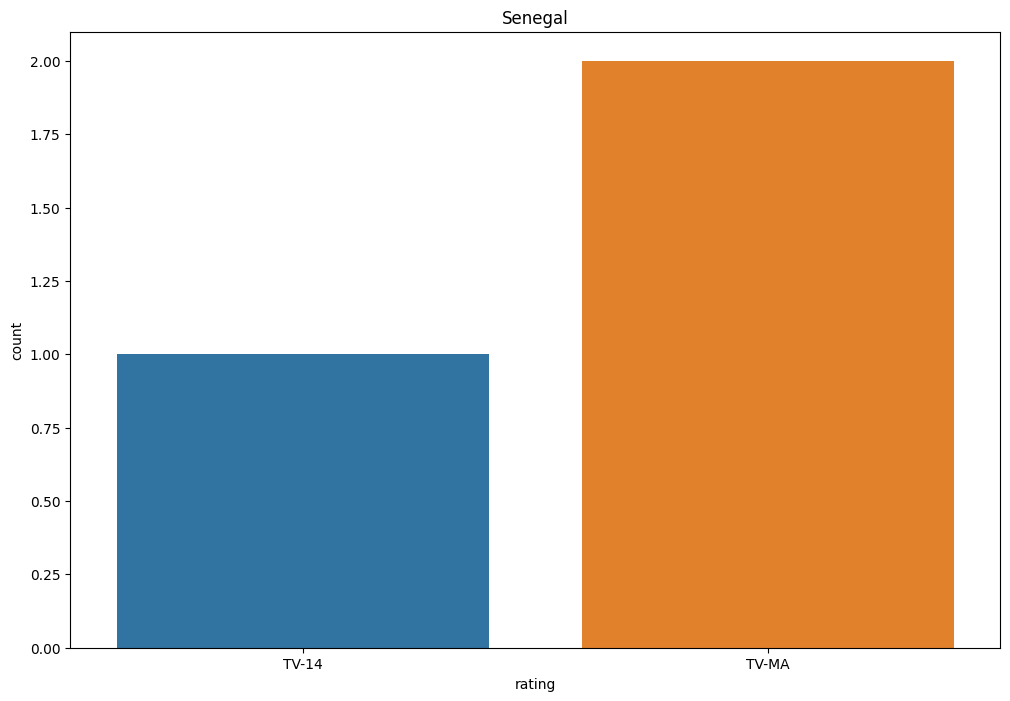

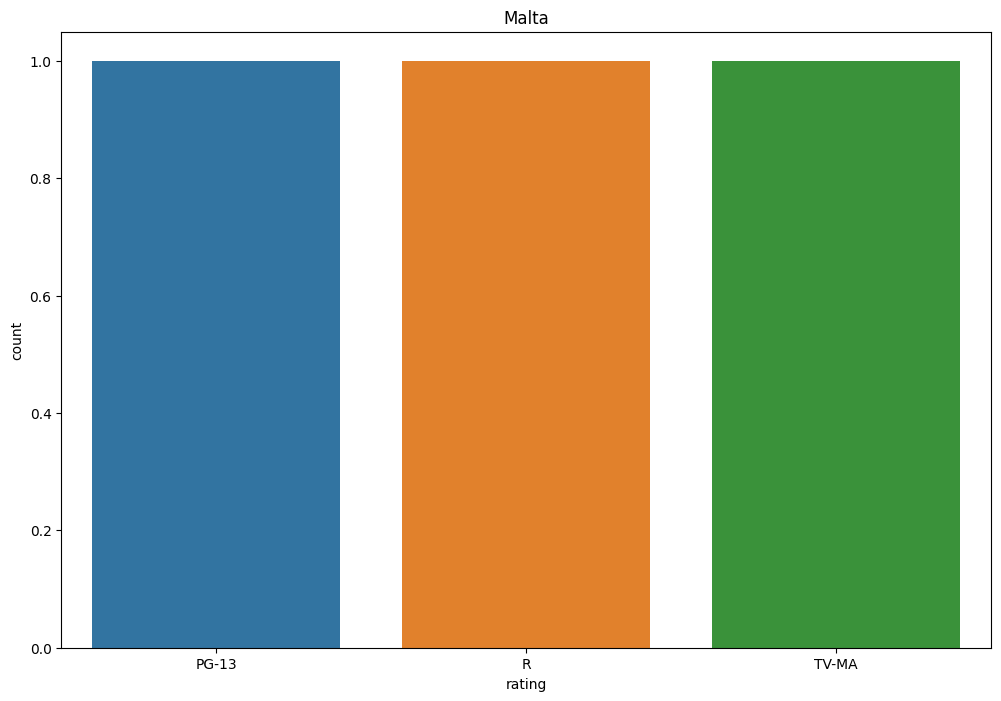

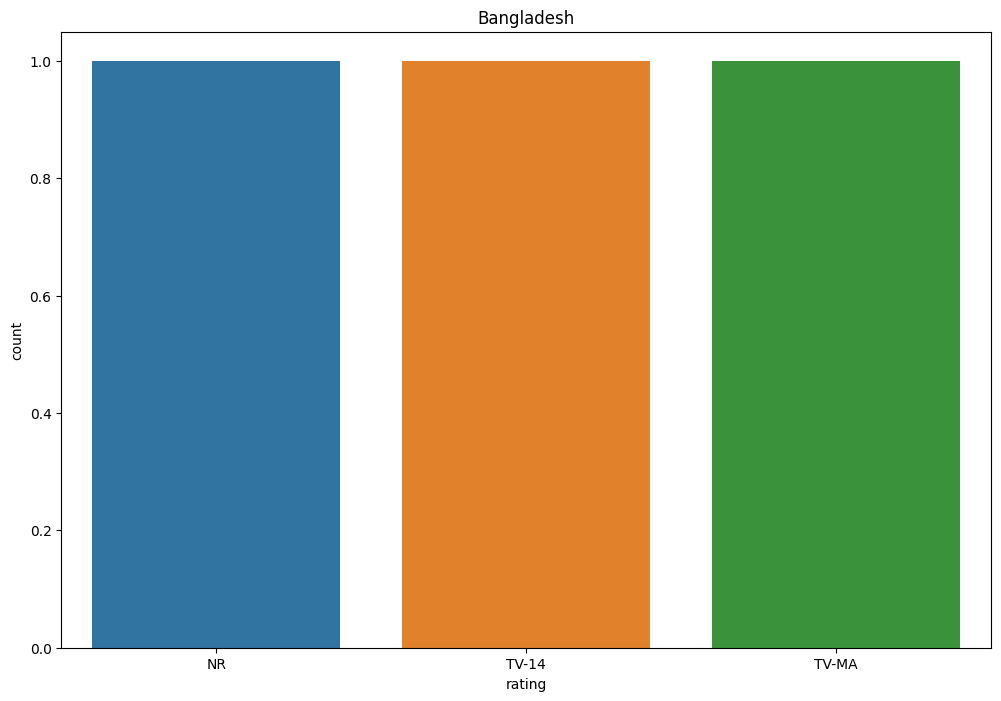

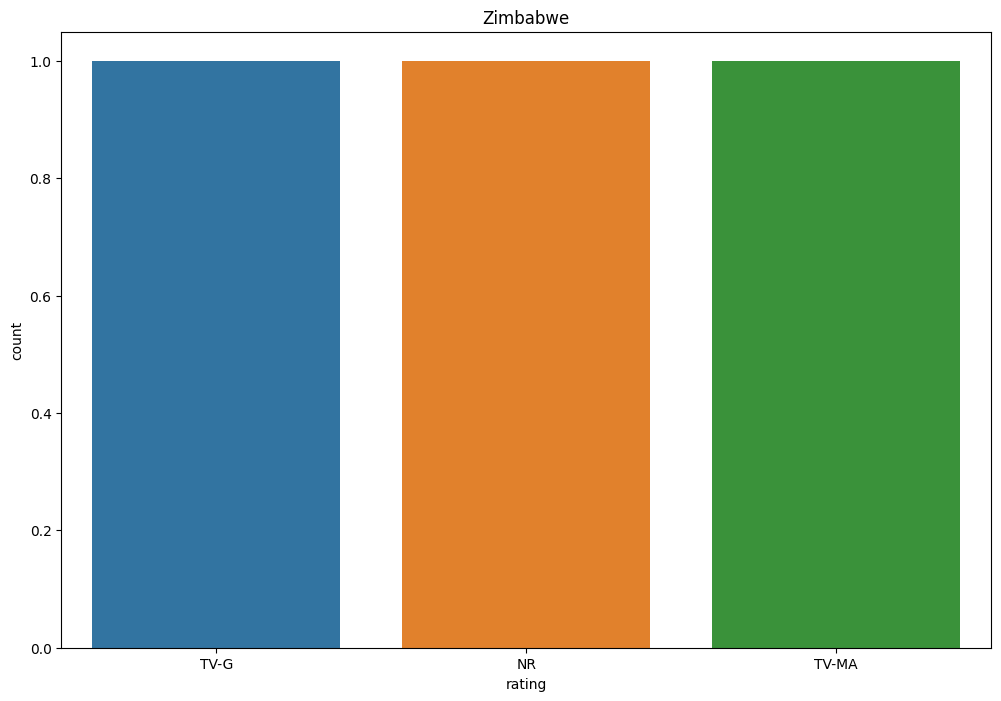

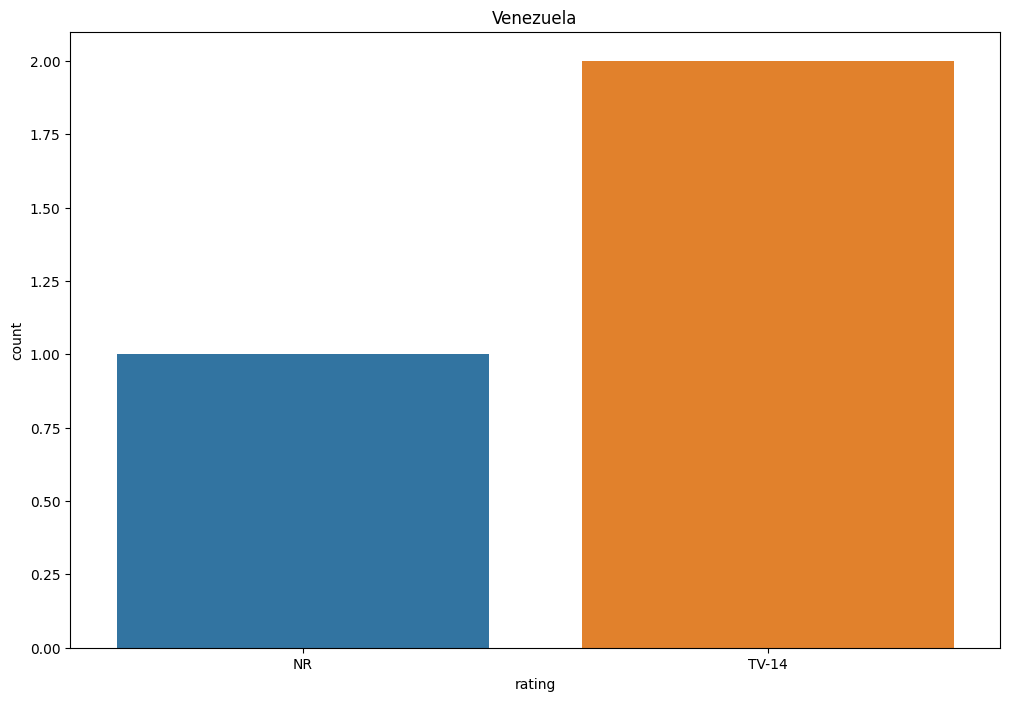

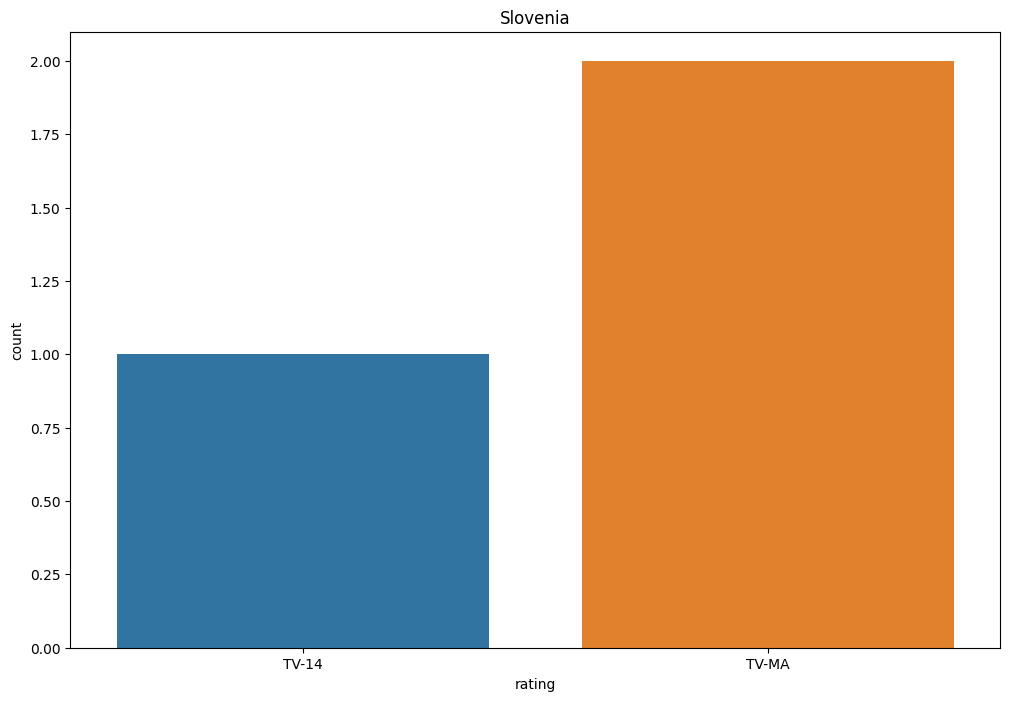

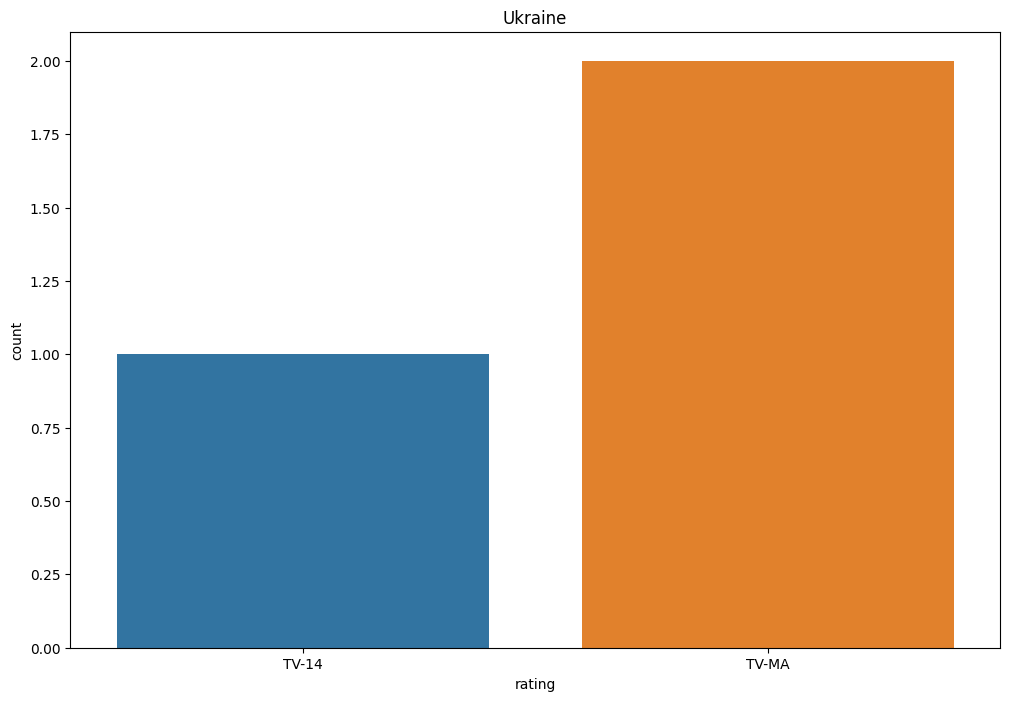

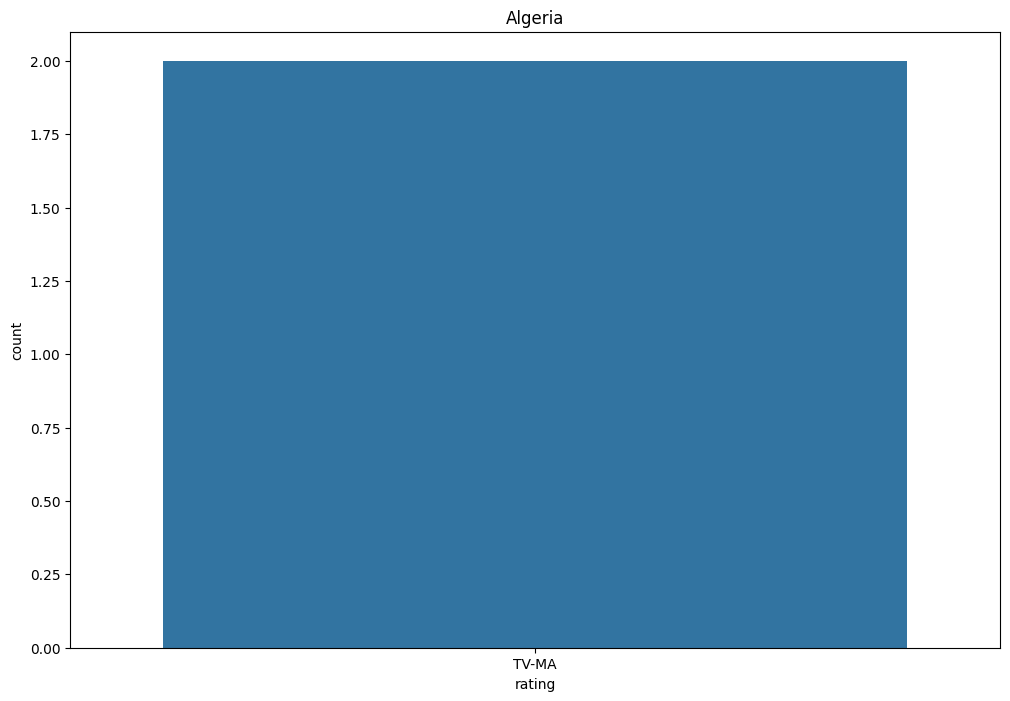

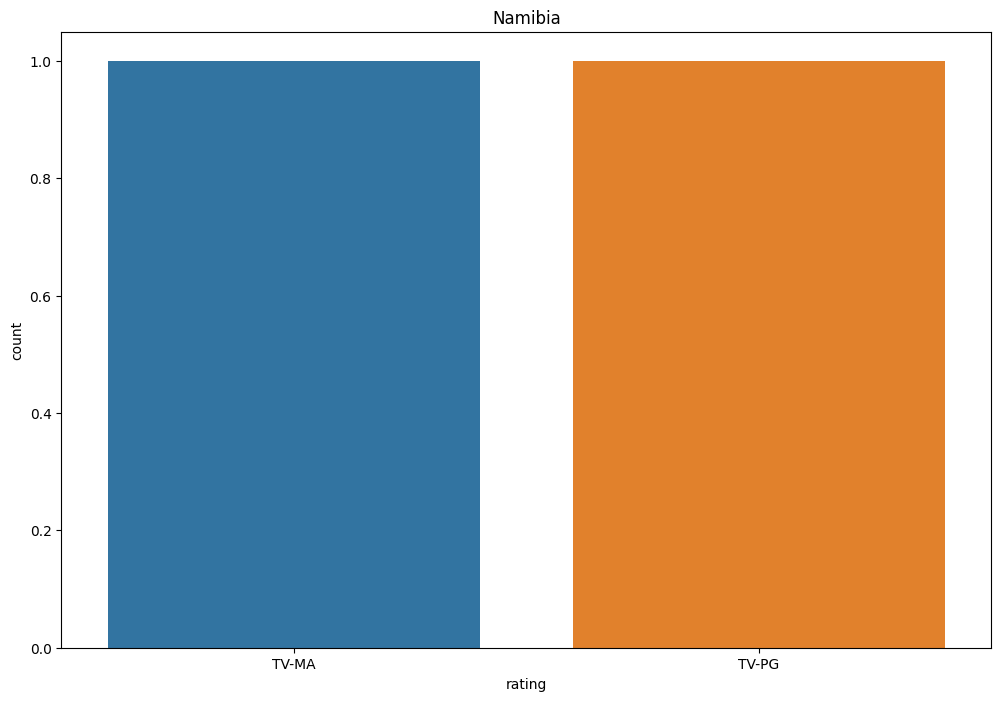

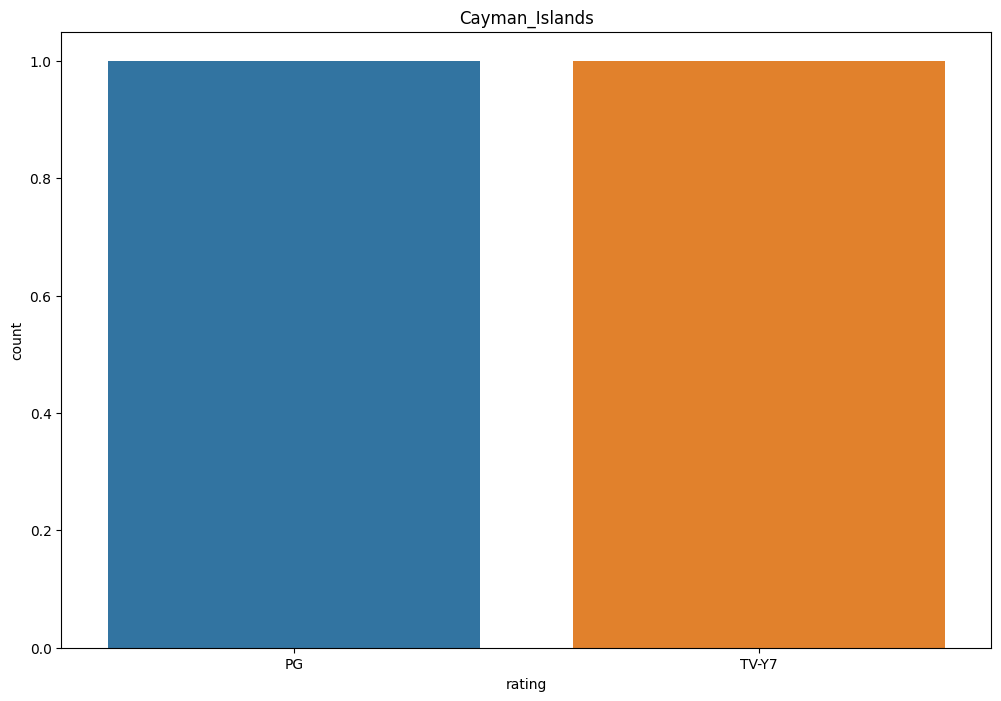

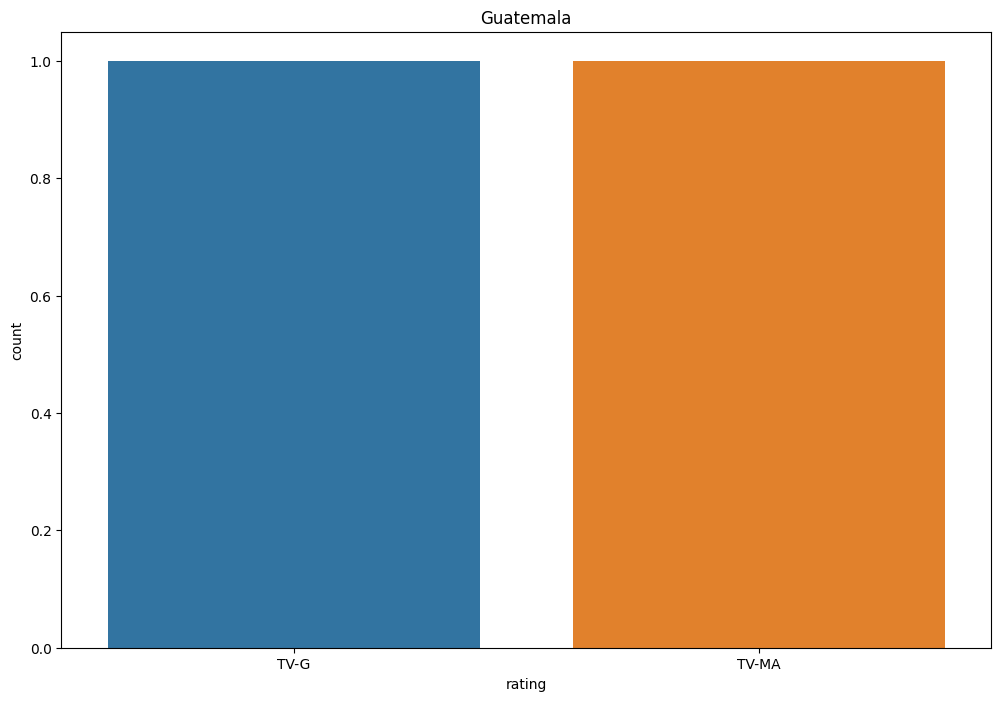

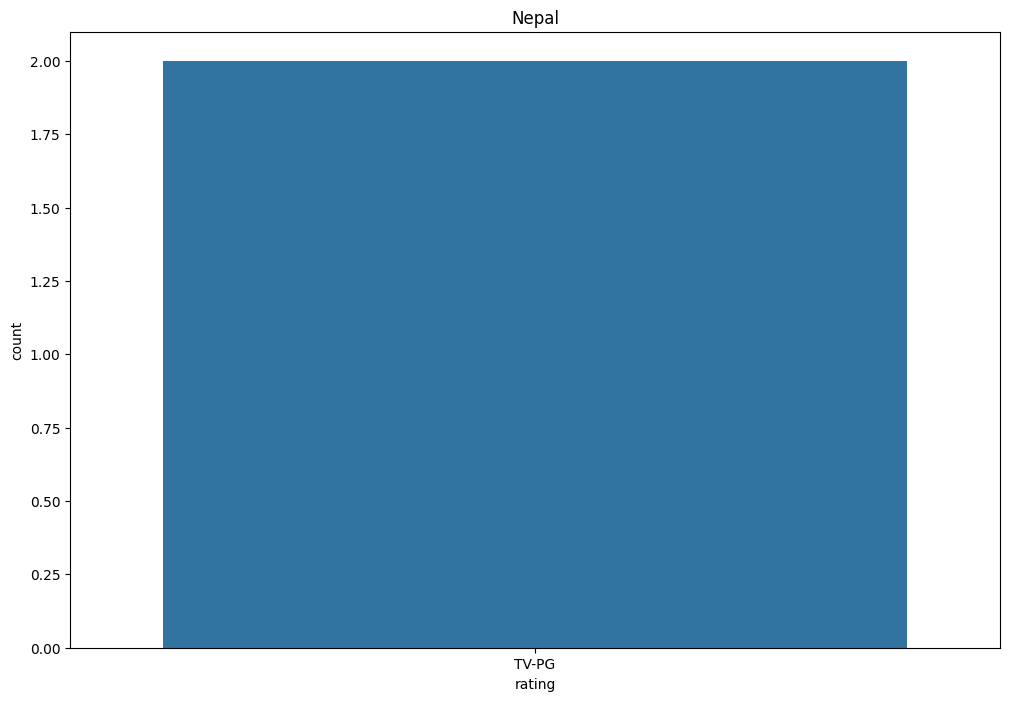

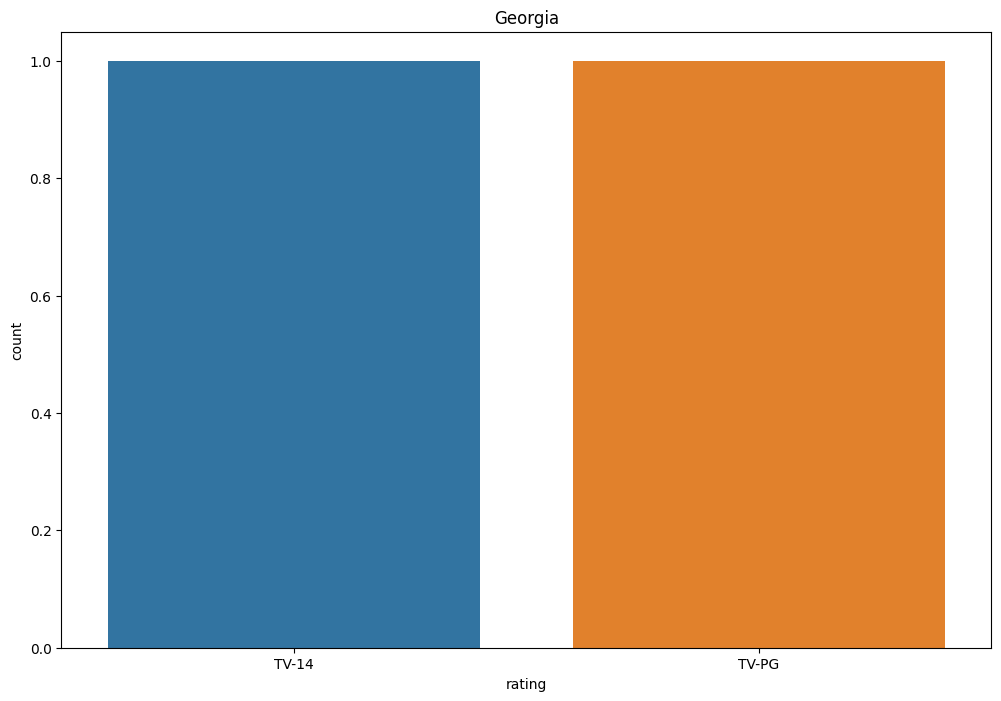

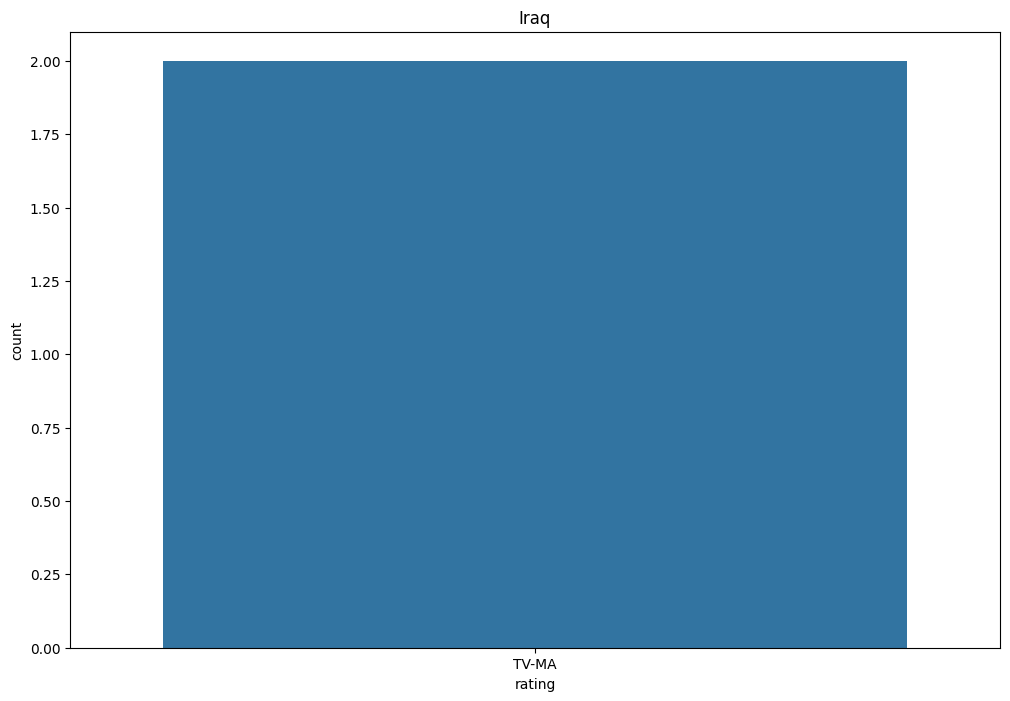

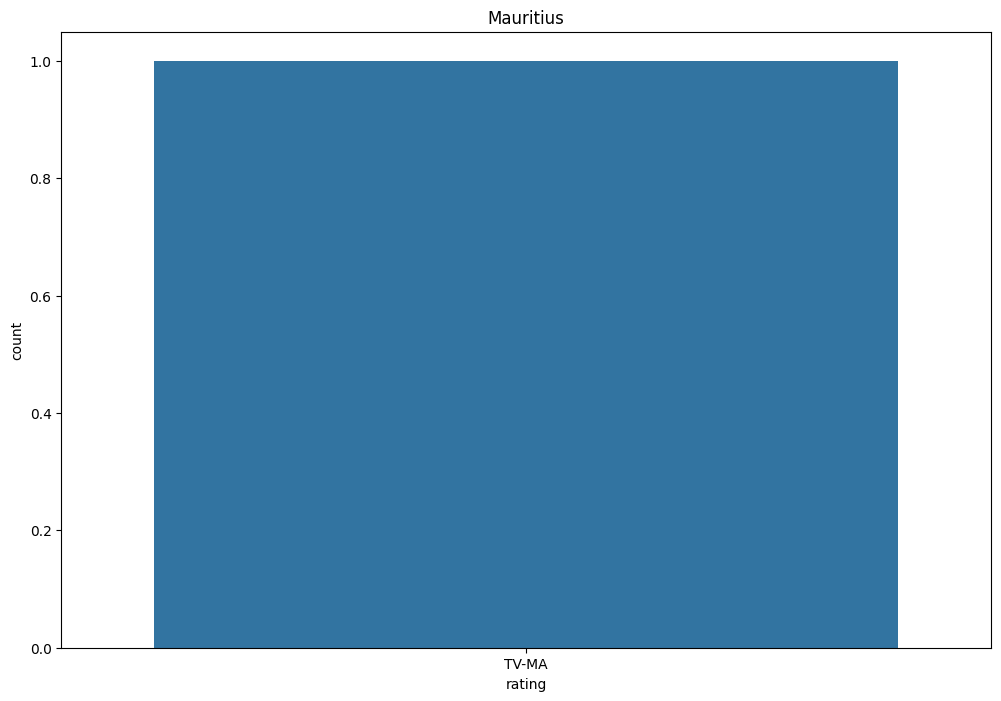

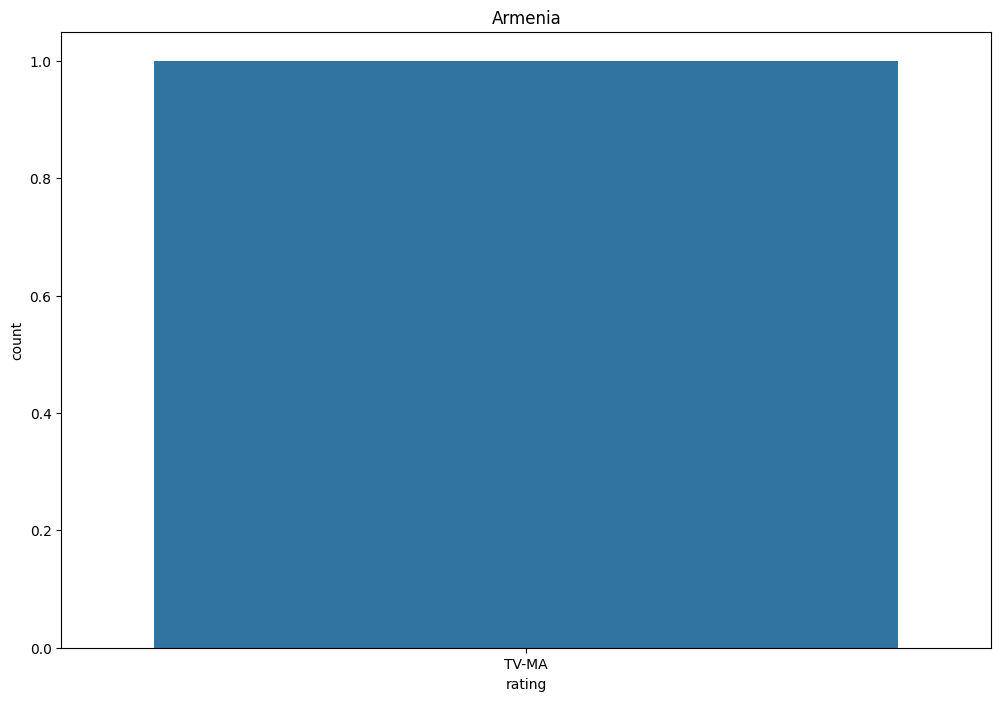

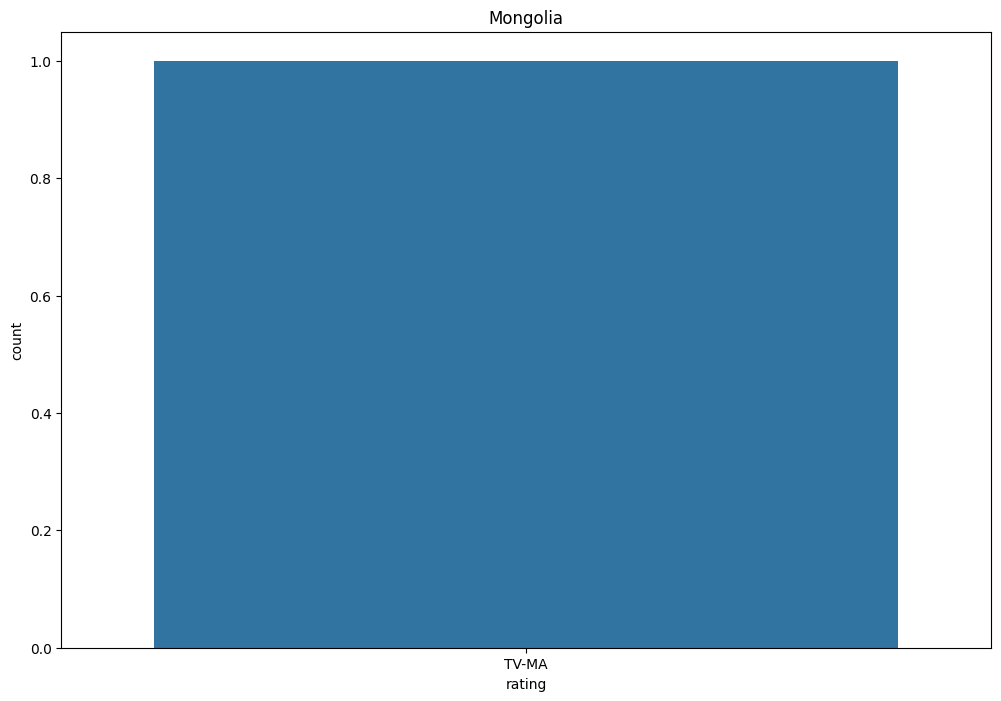

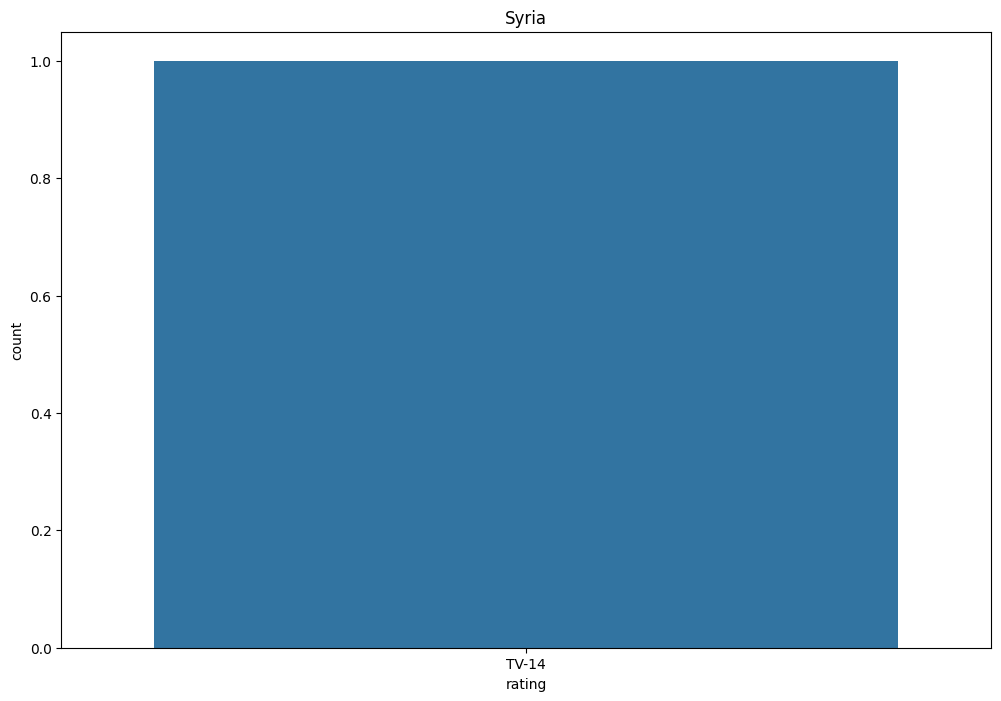

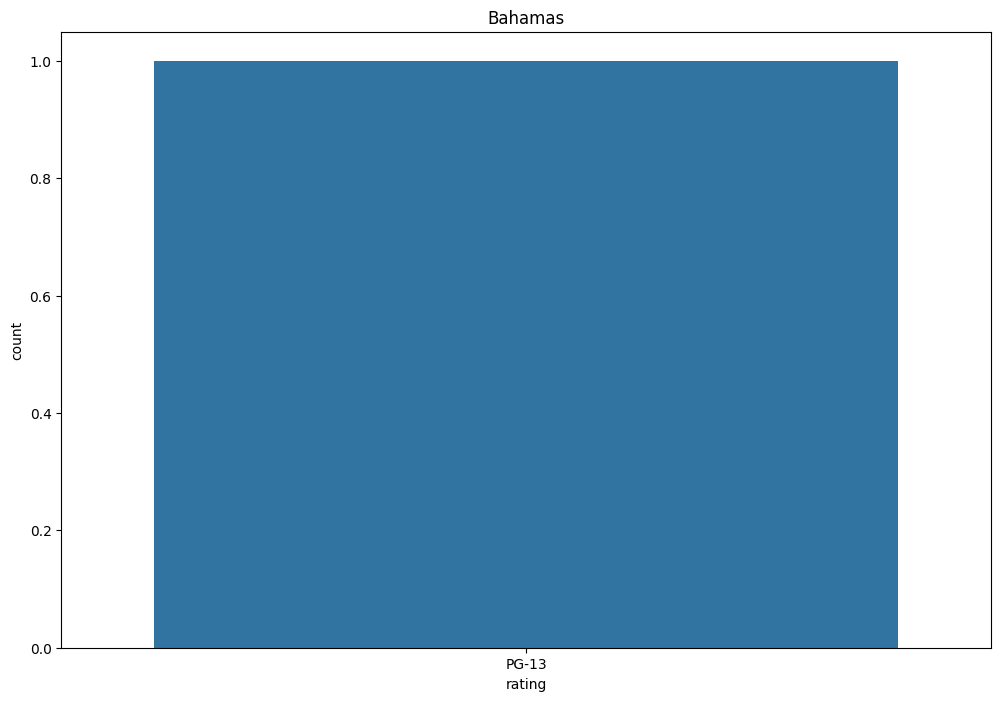

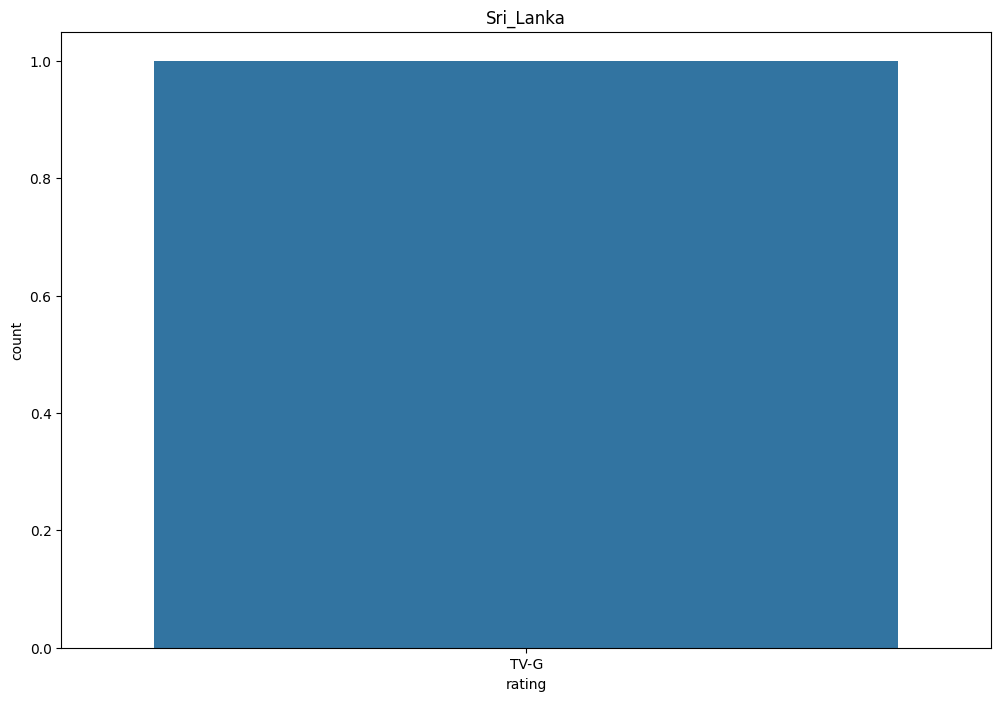

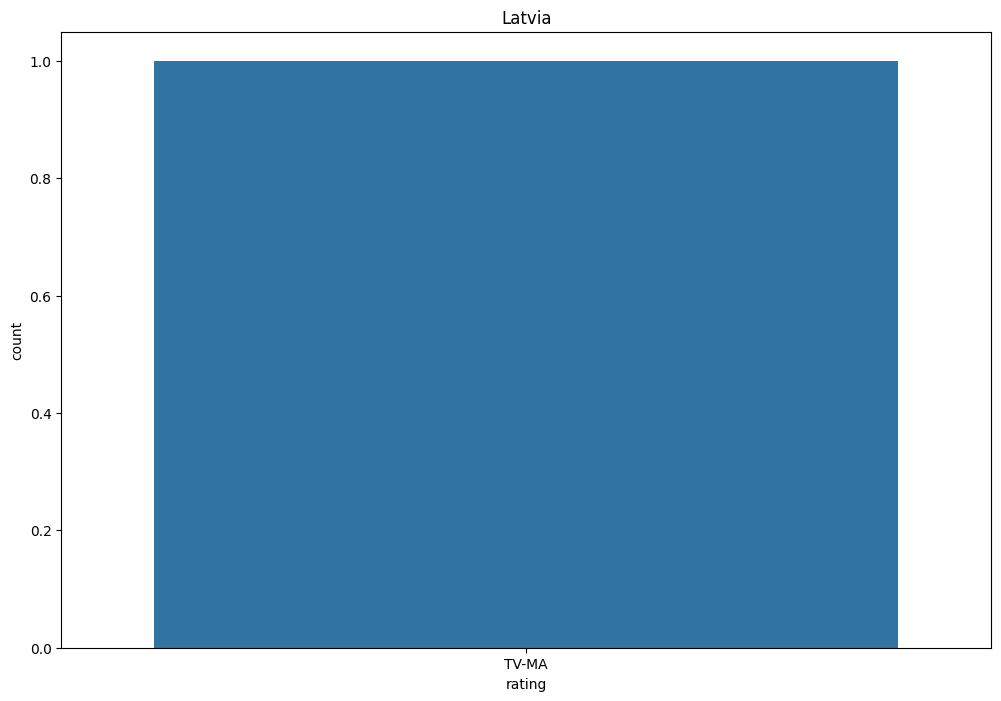

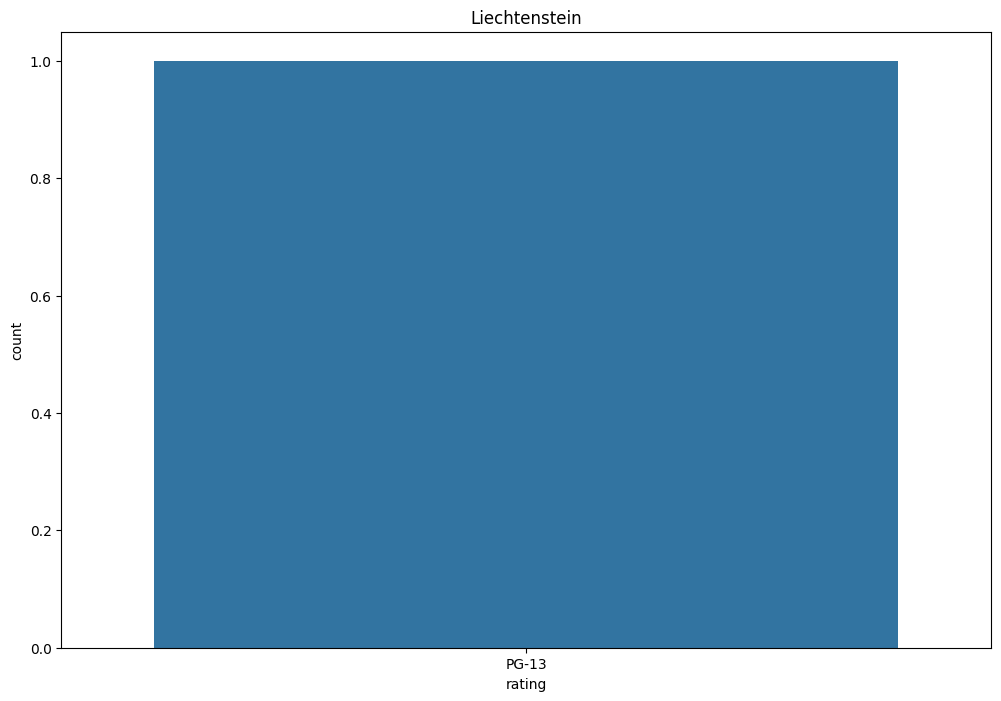

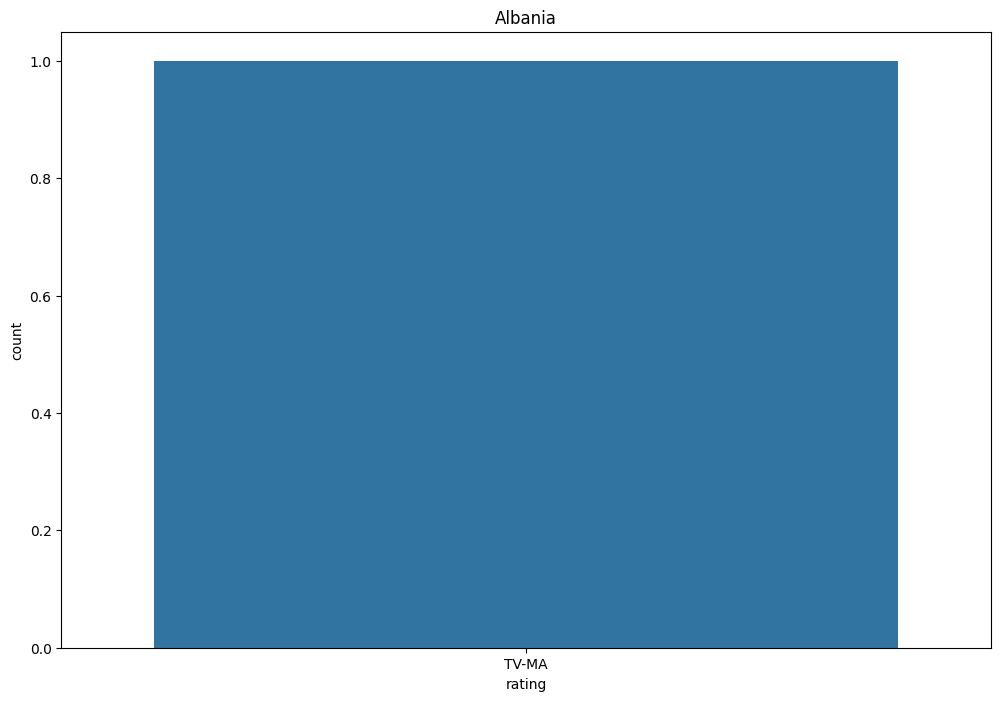

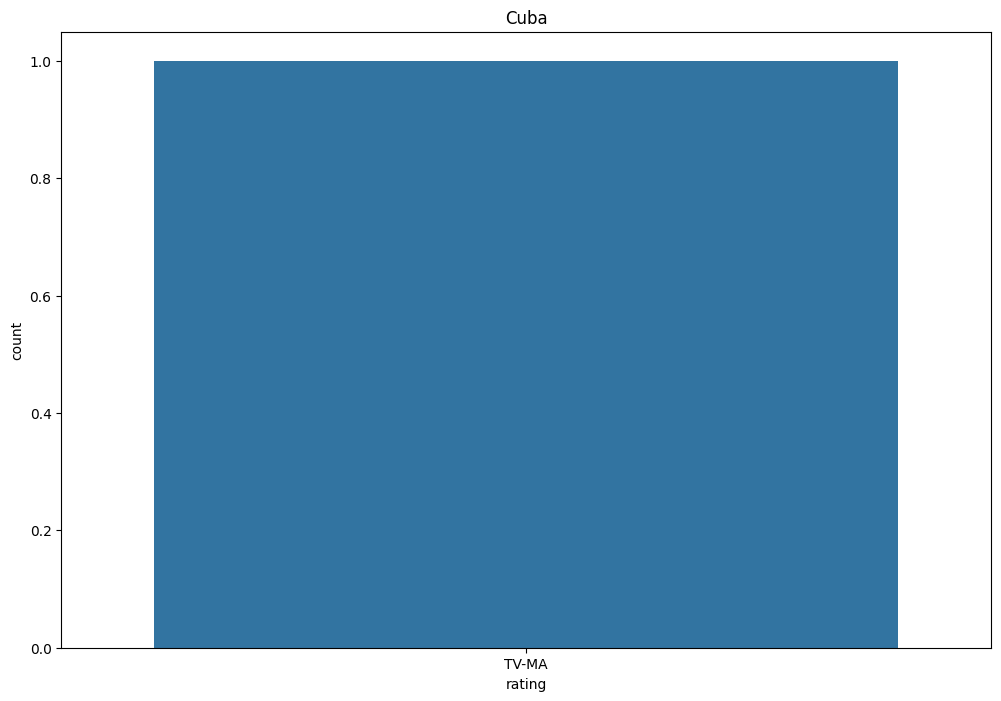

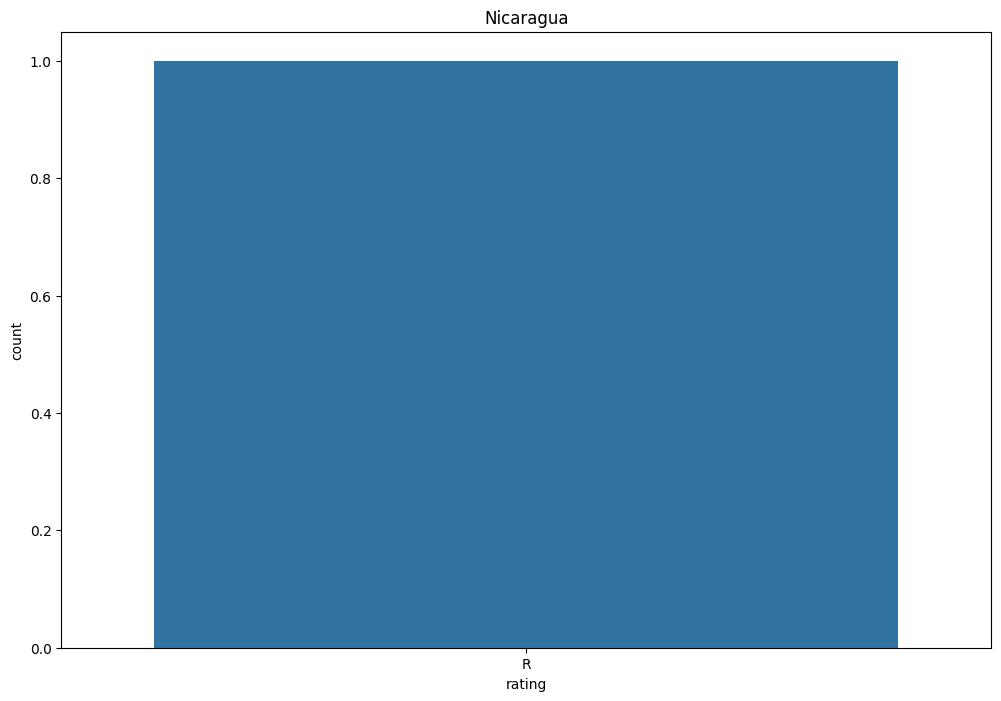

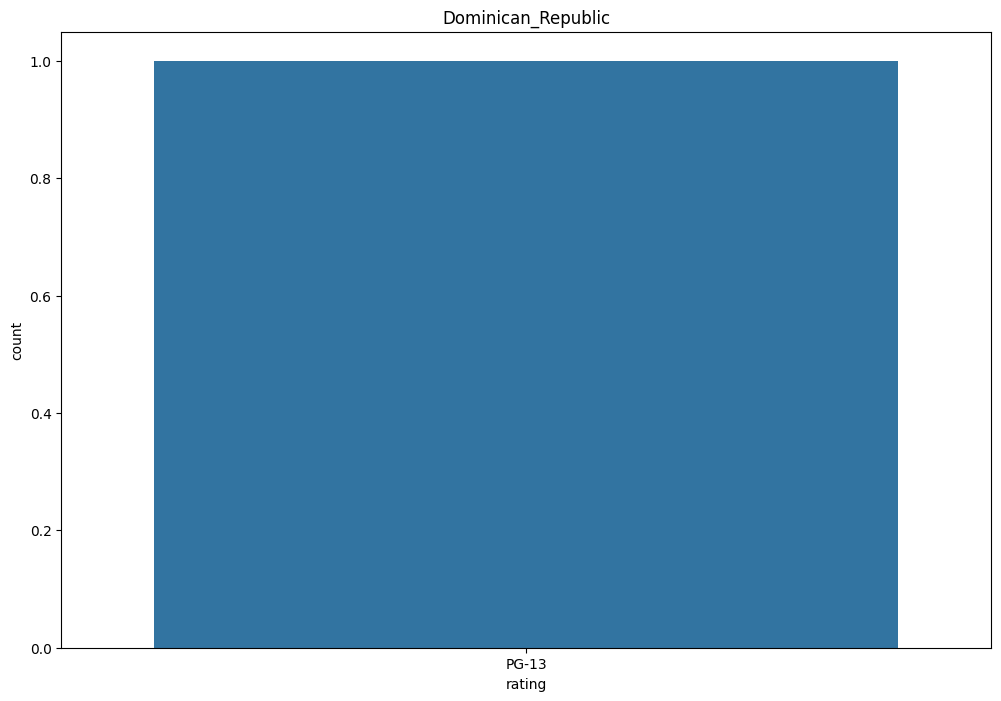

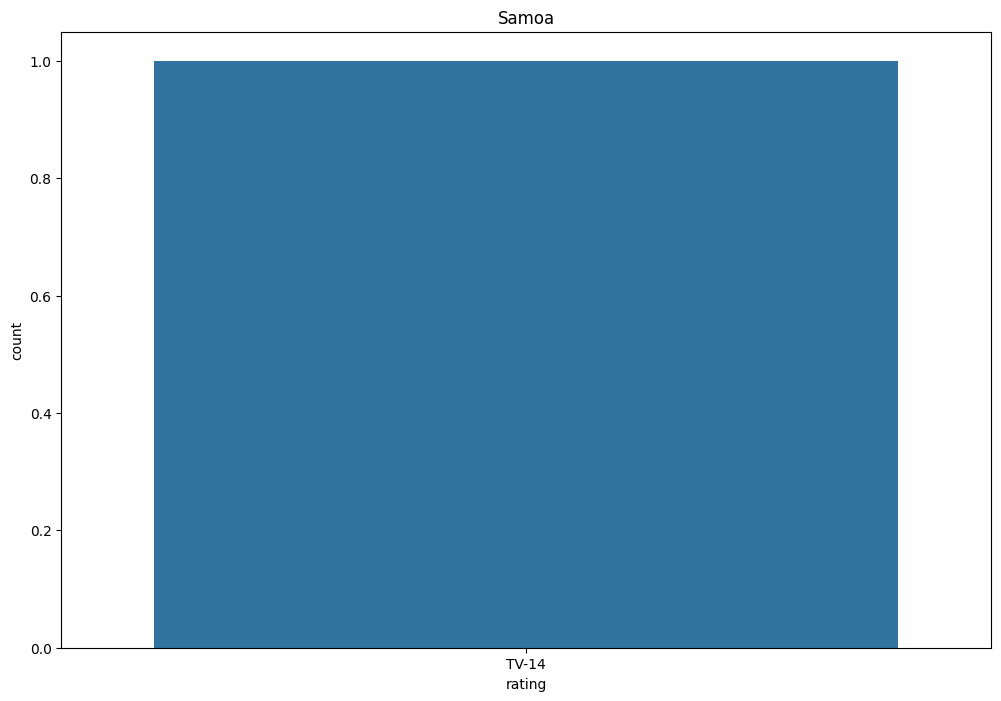

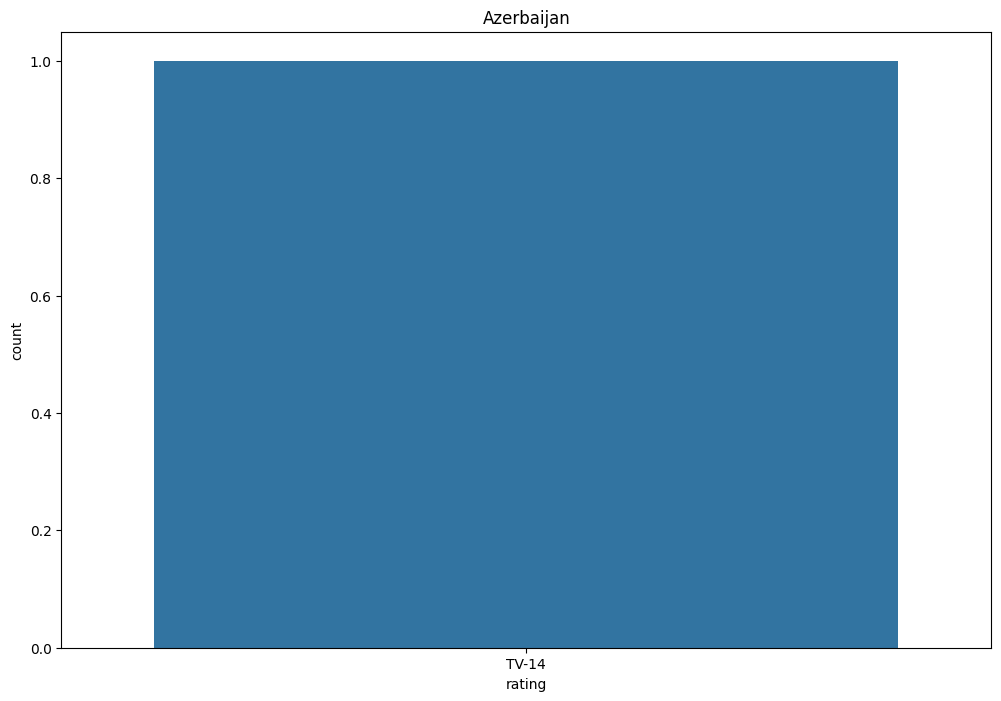

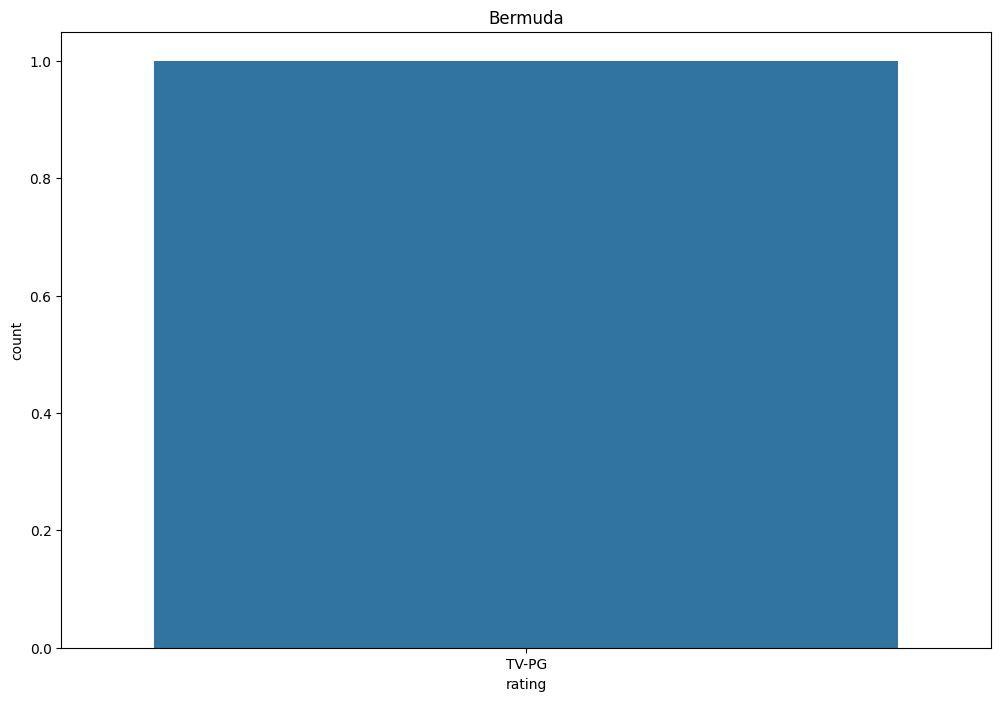

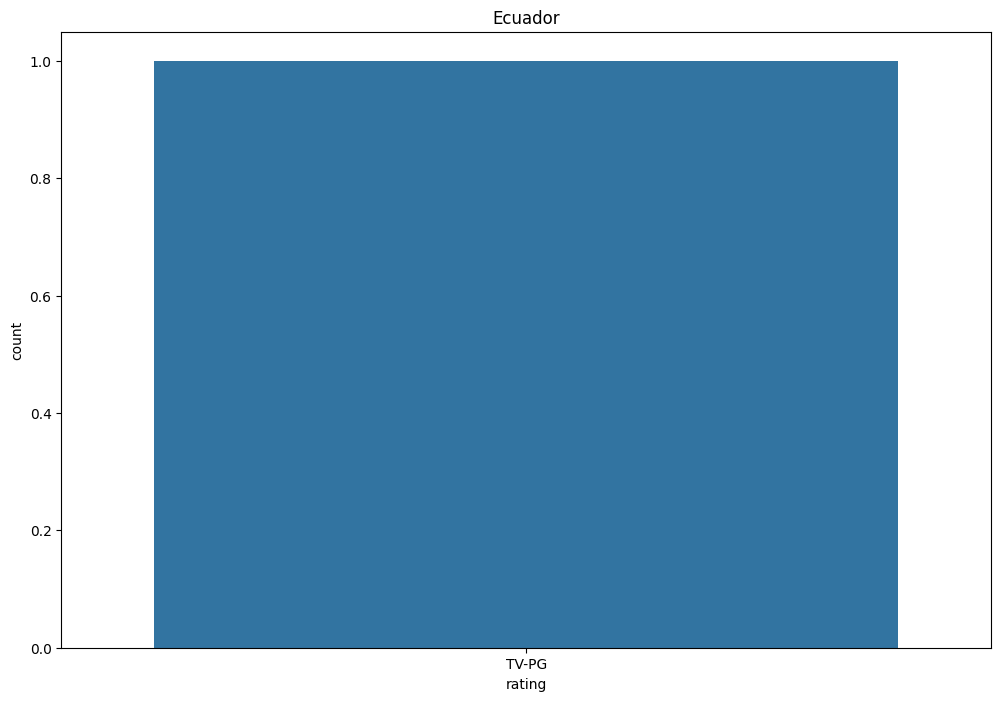

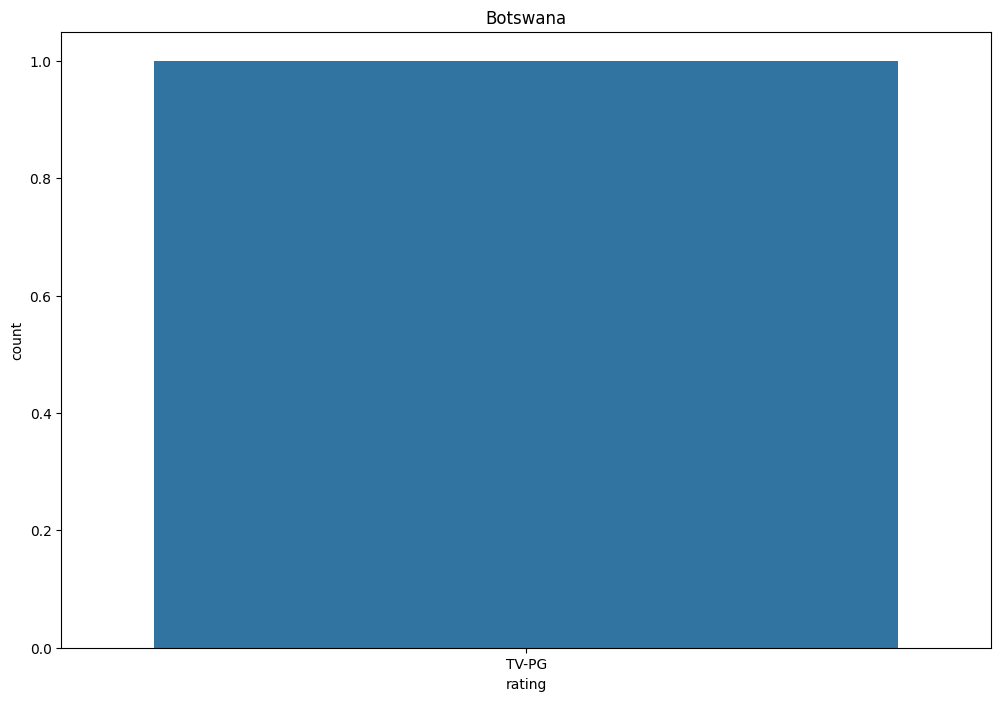

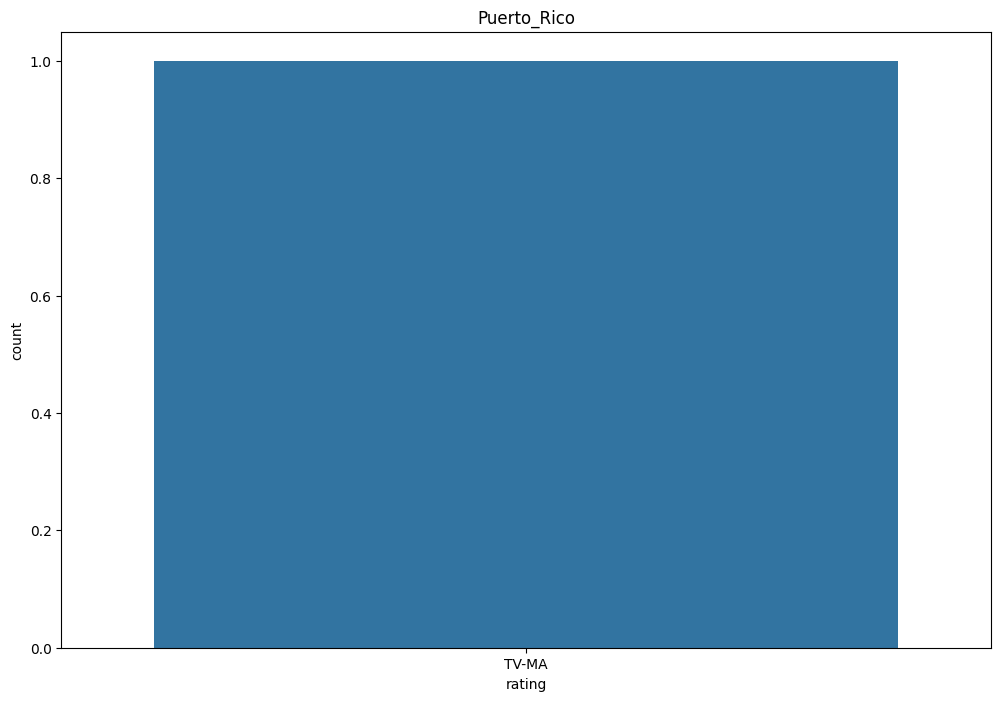

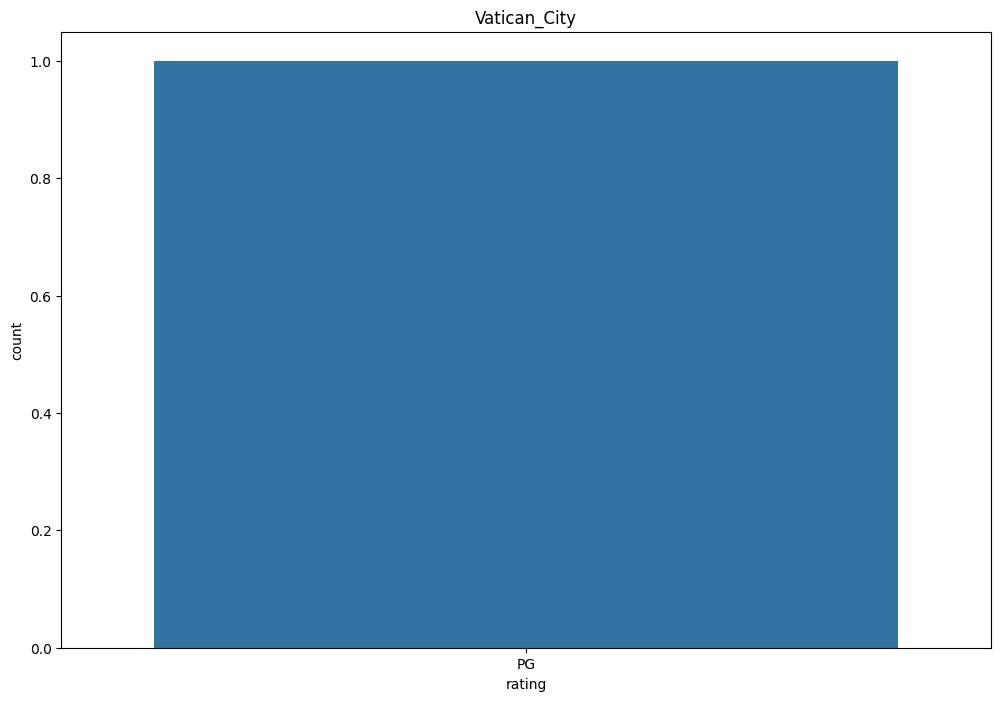

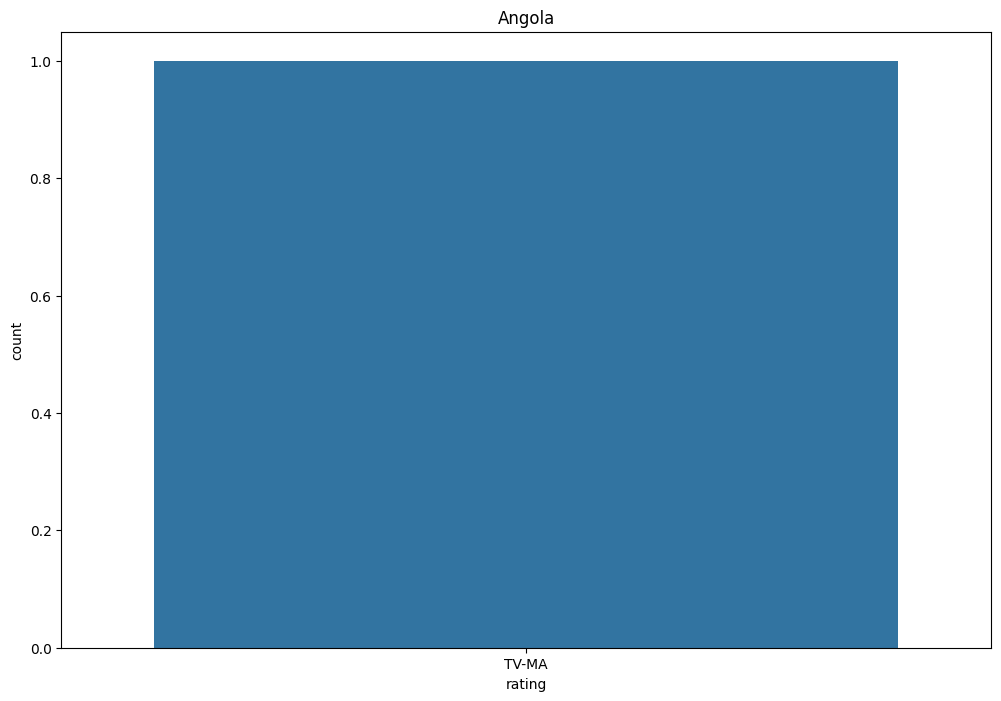

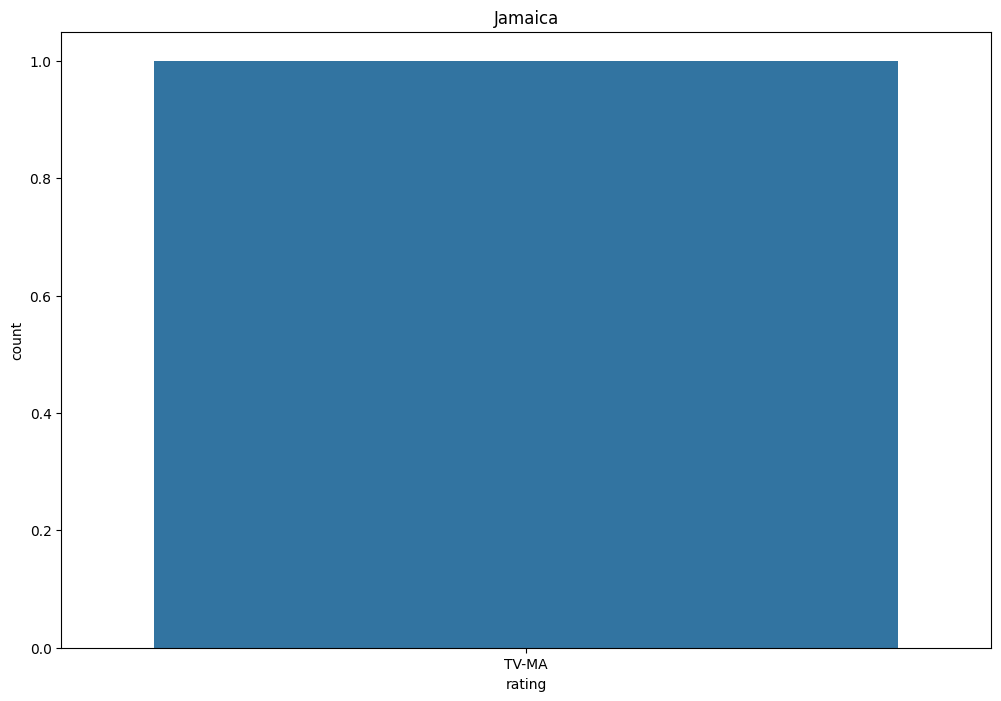

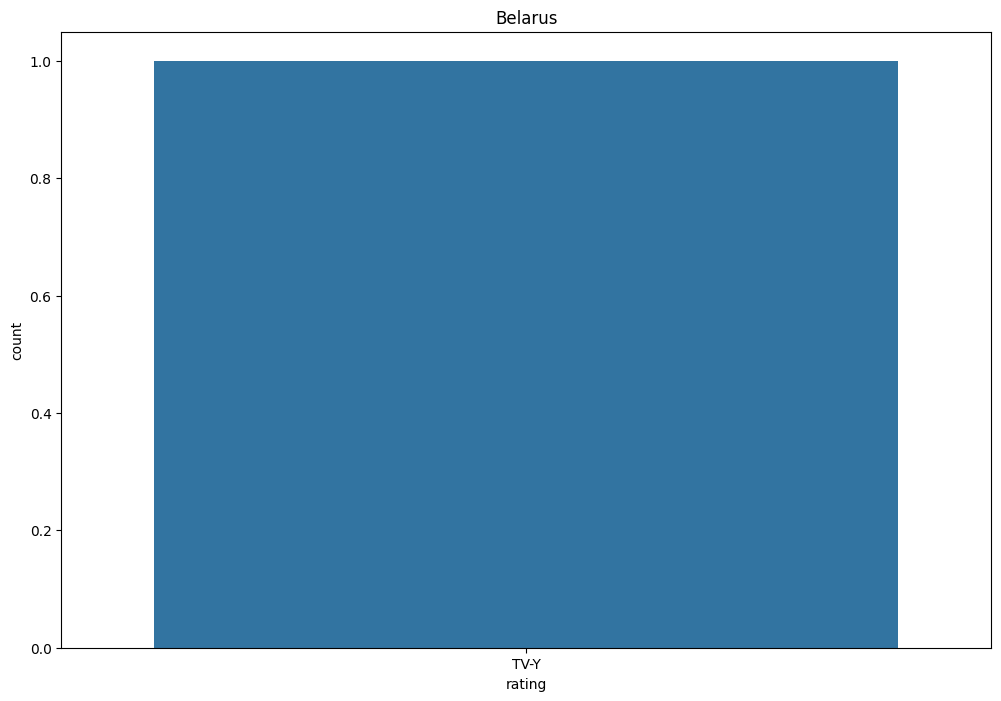

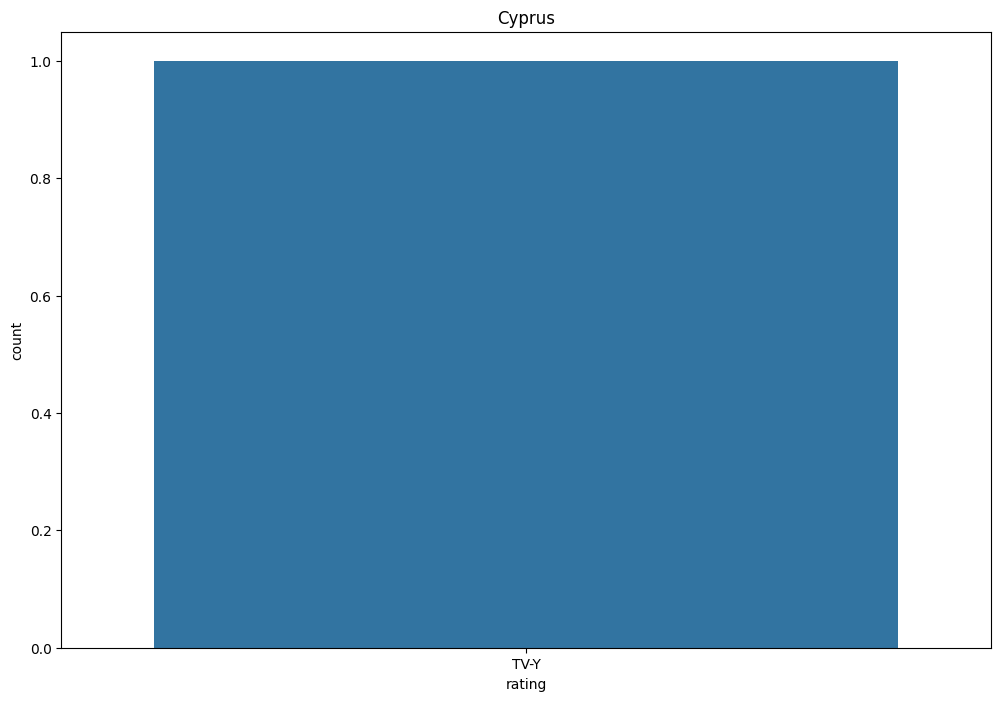

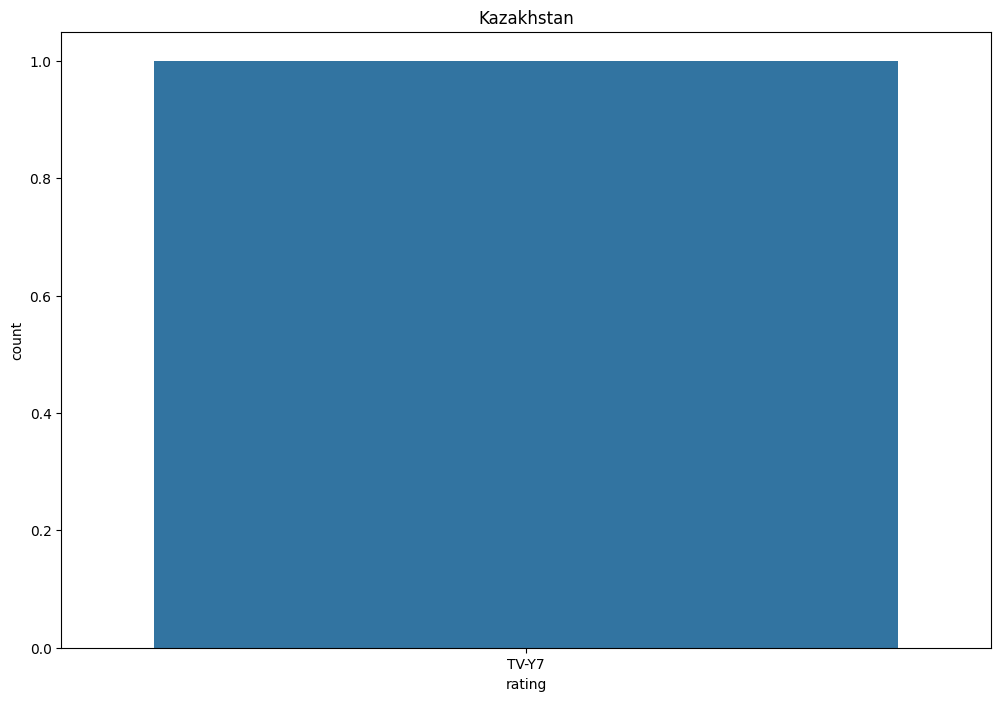

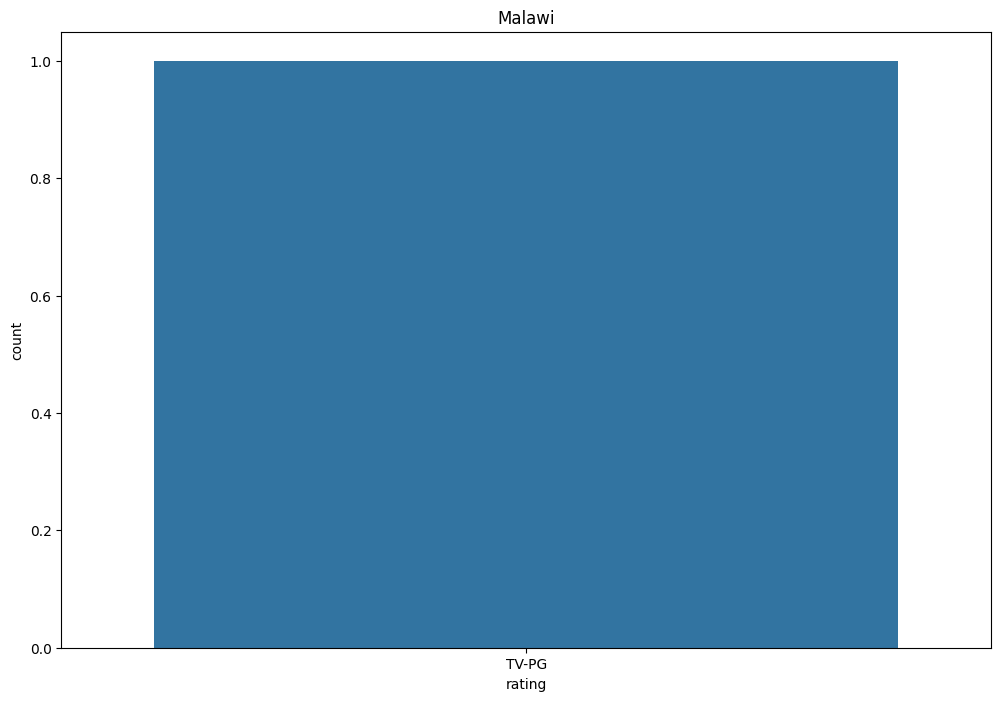

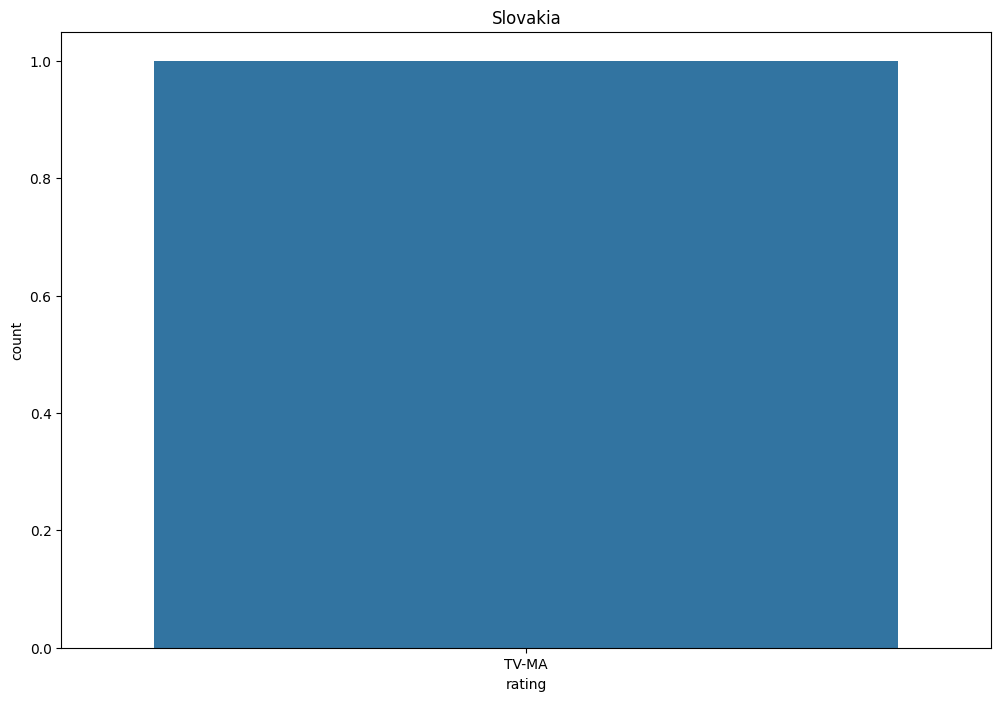

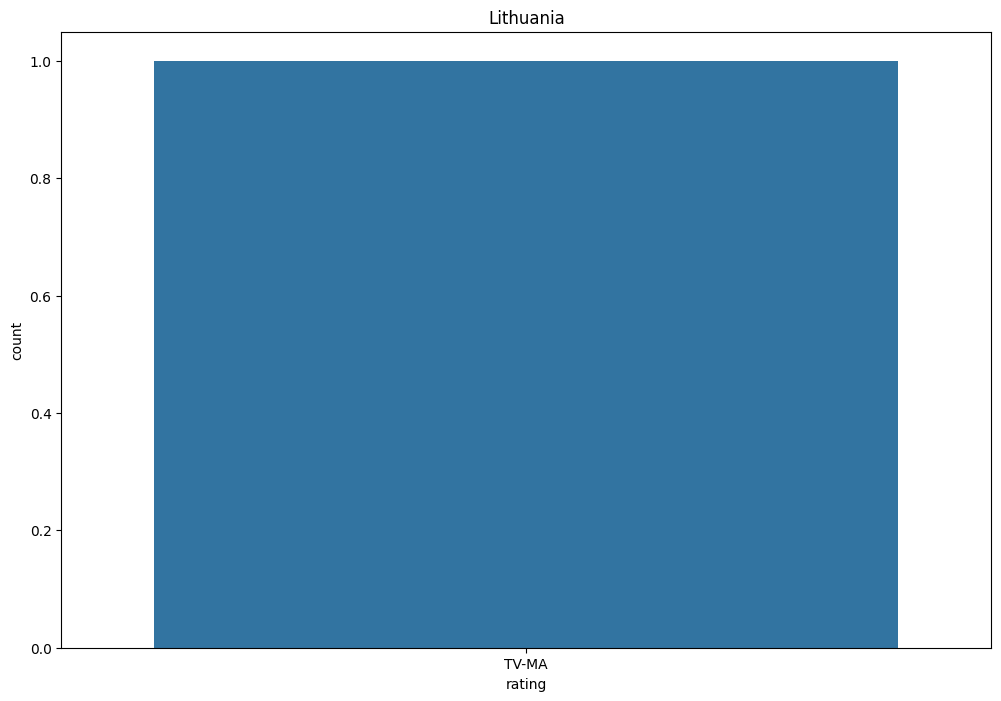

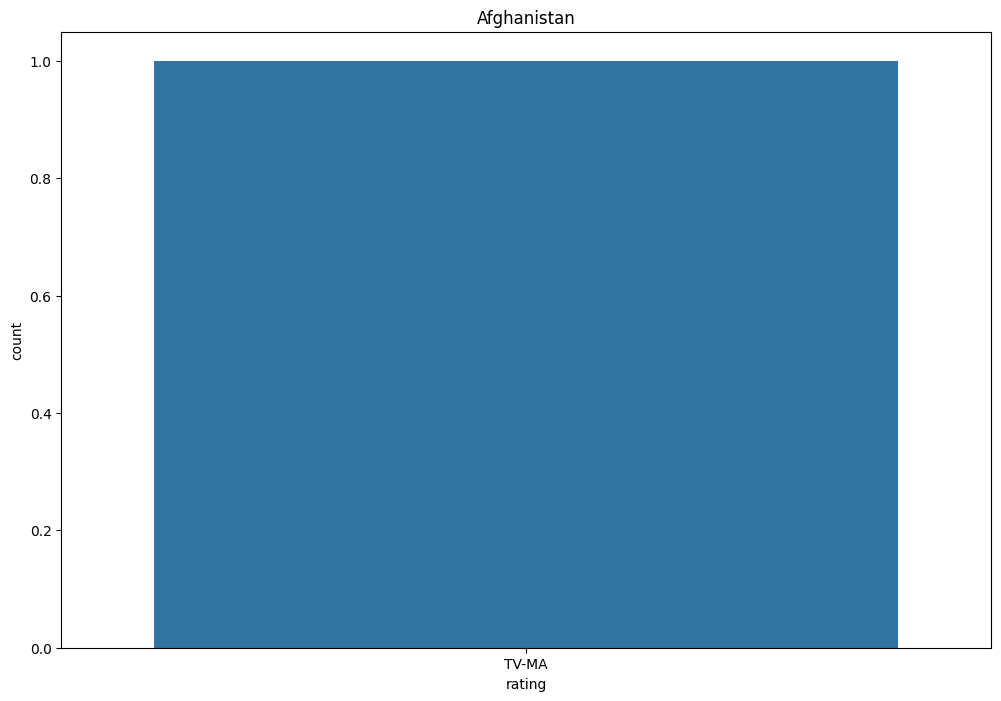

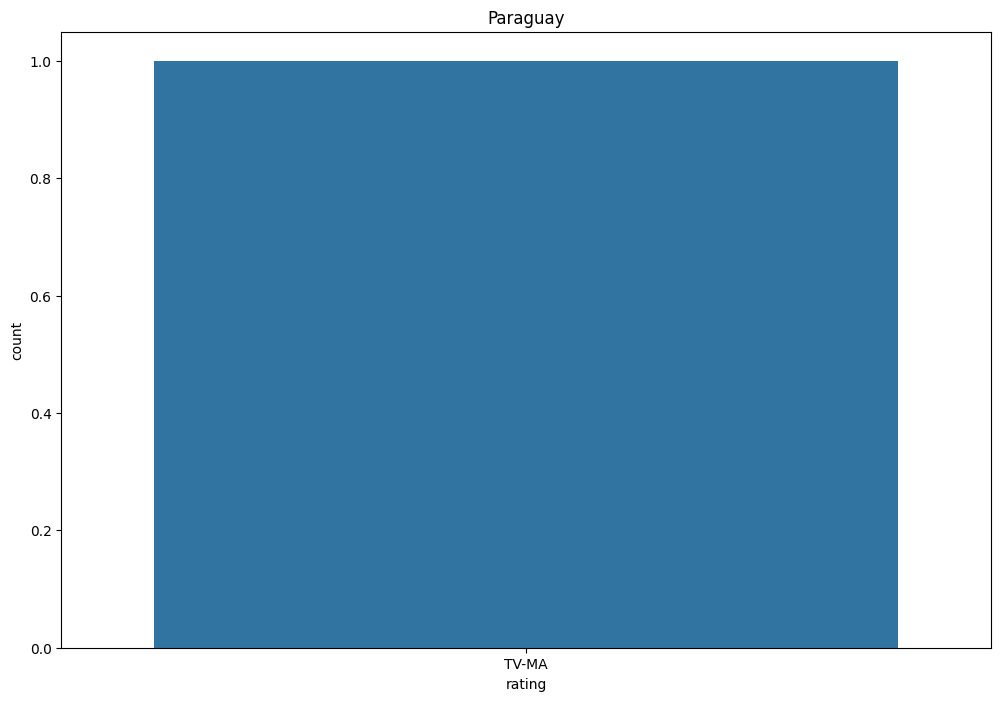

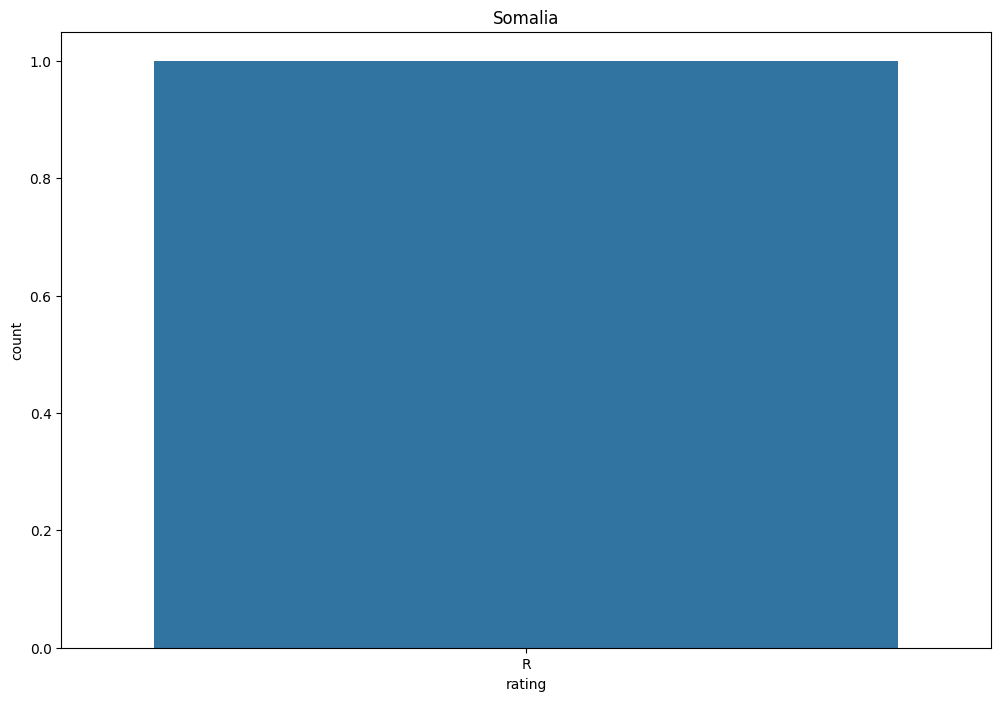

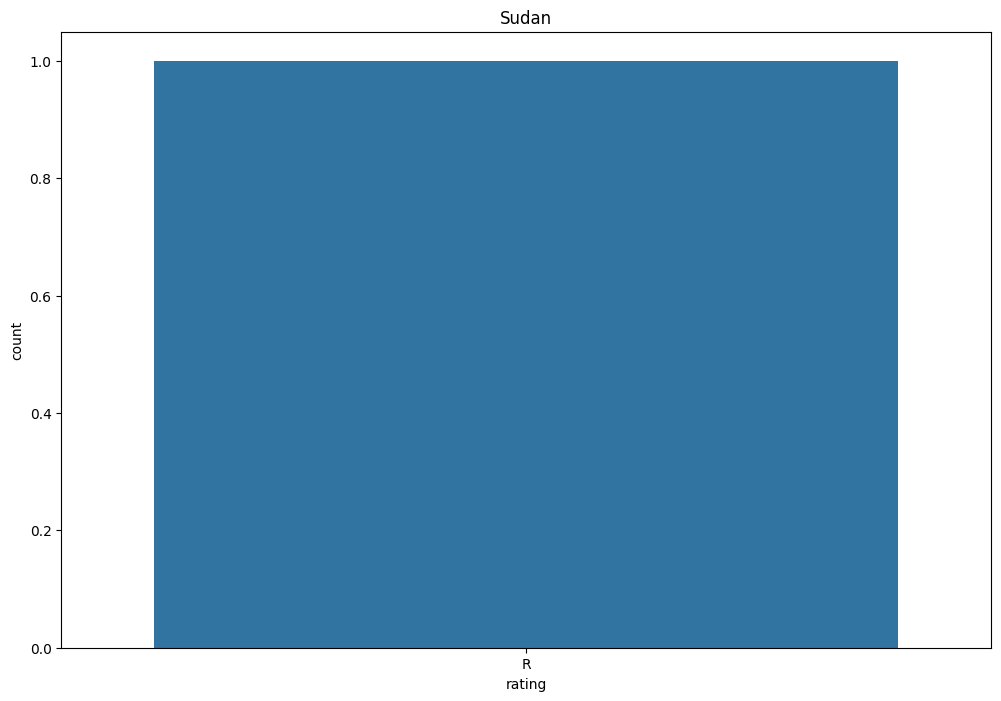

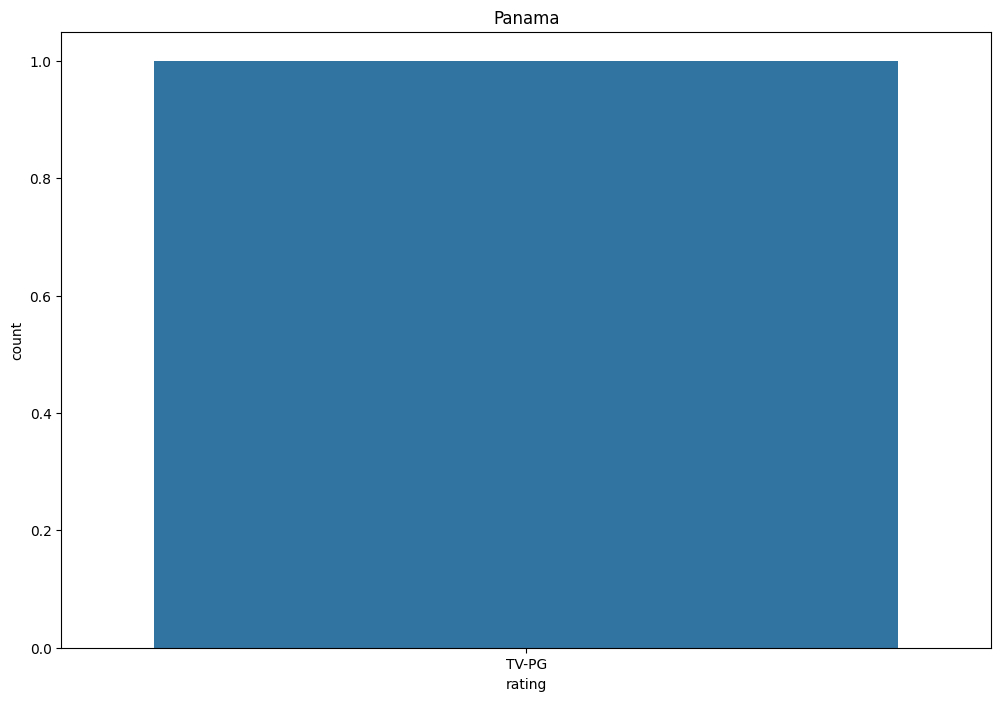

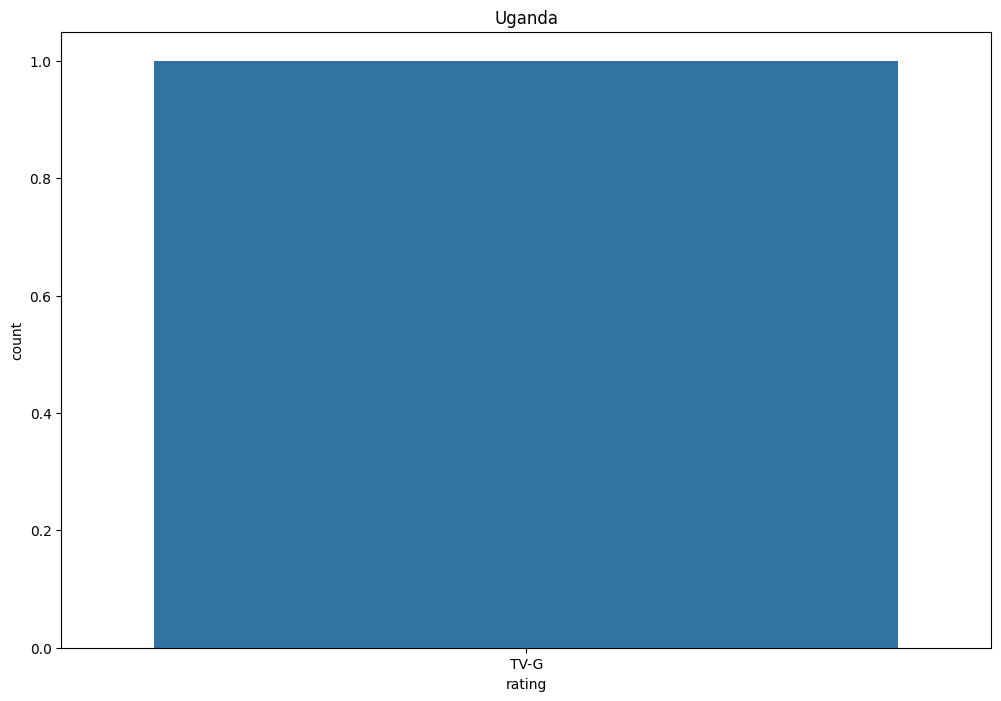

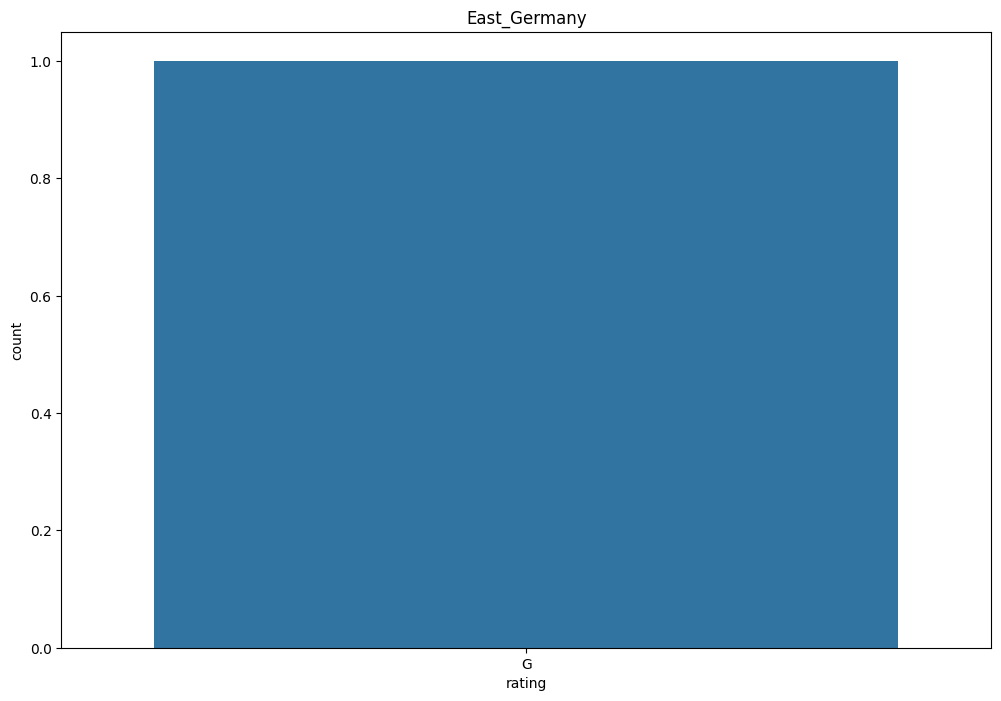

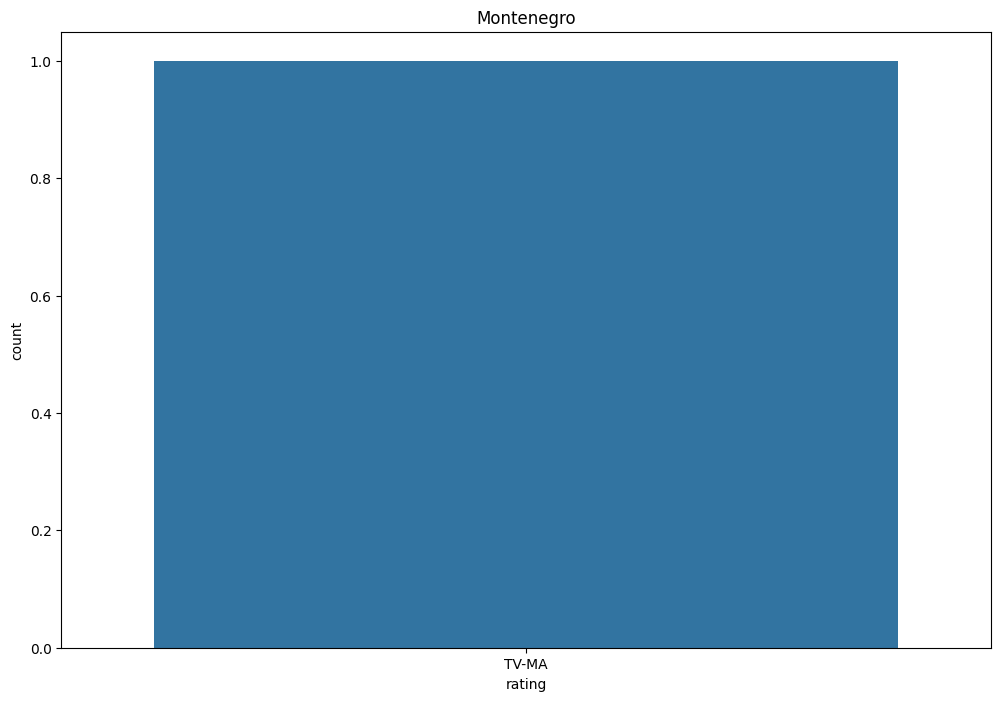

In [488]:
idx = 1
for country in countries:
    if country != 'NO_DATA':
        # plt.subplot(10,5,idx)
        plt.figure(figsize=(12,8))
        sns.barplot(data = countries_rating_df.loc[countries_rating_df['countries'] == country,['rating','count']], x = 'rating', y = 'count')
        plt.title(country)
        idx+=1
        plt.show()
        # print(country)
        # print(countries_rating_df.loc[countries_rating_df['countries'] == country,['rating','count']])
# plt.tight_layout(pad = 0.5, h_pad = 0.5, w_pad = 0.5)
# plt.show()

In [484]:
# for country in countries[:2]:
#     if country != 'NO_DATA':
#         print(country)
#         print(countries_rating_df.loc[countries_rating_df['countries'] == country,['rating','count']])
#         print('\n')

United_Stated, United_kingdom, and India have a larger variety of content available whereas Portugal, Morocco, Soviet_Union,  Afganistan, Ghana and Taiwan and few others have least content variations associated.

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# description wordcloud

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***